In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.chdir('..')

In [14]:
import torch, random
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)
random.seed(0)

dataset_params = {
    'dataset': 'dsprites',
    'batch_size': 32,
    'cuda': False,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading dsprites dataset...
Done!



# ConvVSC

In [3]:
%%time
from src.models.conv_vsc import ConvolutionalVariationalSparseCoding

model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 100,
    'learning_rate': 3e-4,
    
    'alpha': 0.01,
    'beta': 2,
    'beta_delta': 0,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cpu',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)

CPU times: user 844 ms, sys: 104 ms, total: 948 ms
Wall time: 3.9 s


In [5]:
import torch
convvsc.model.load_state_dict(torch.load(
    'results/checkpoints/ConvVSC_dsprites_31_60_100_0-0003_80.pth', 
    map_location='cpu'))

In [15]:
images, _ = iter(test_loader).next()

In [17]:
sns.reset_orig()

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


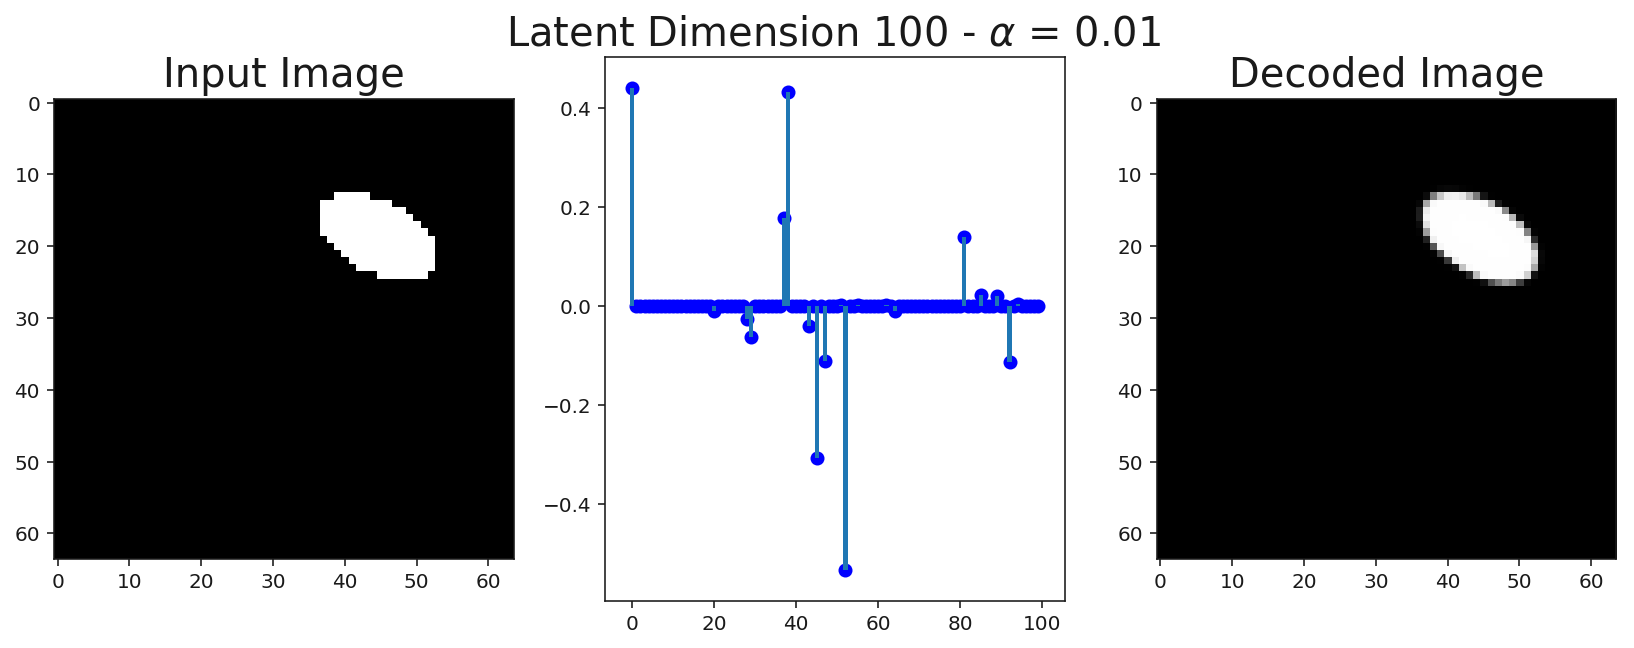

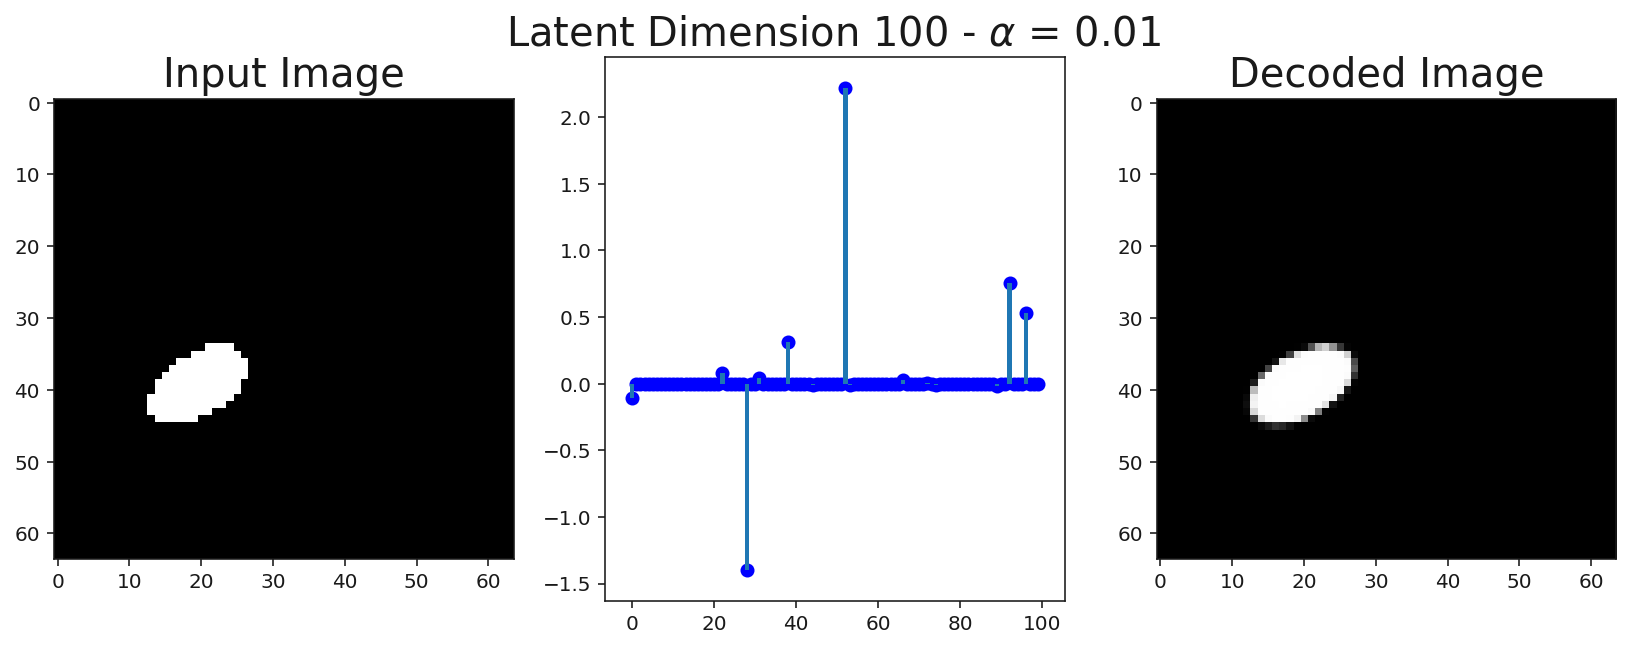

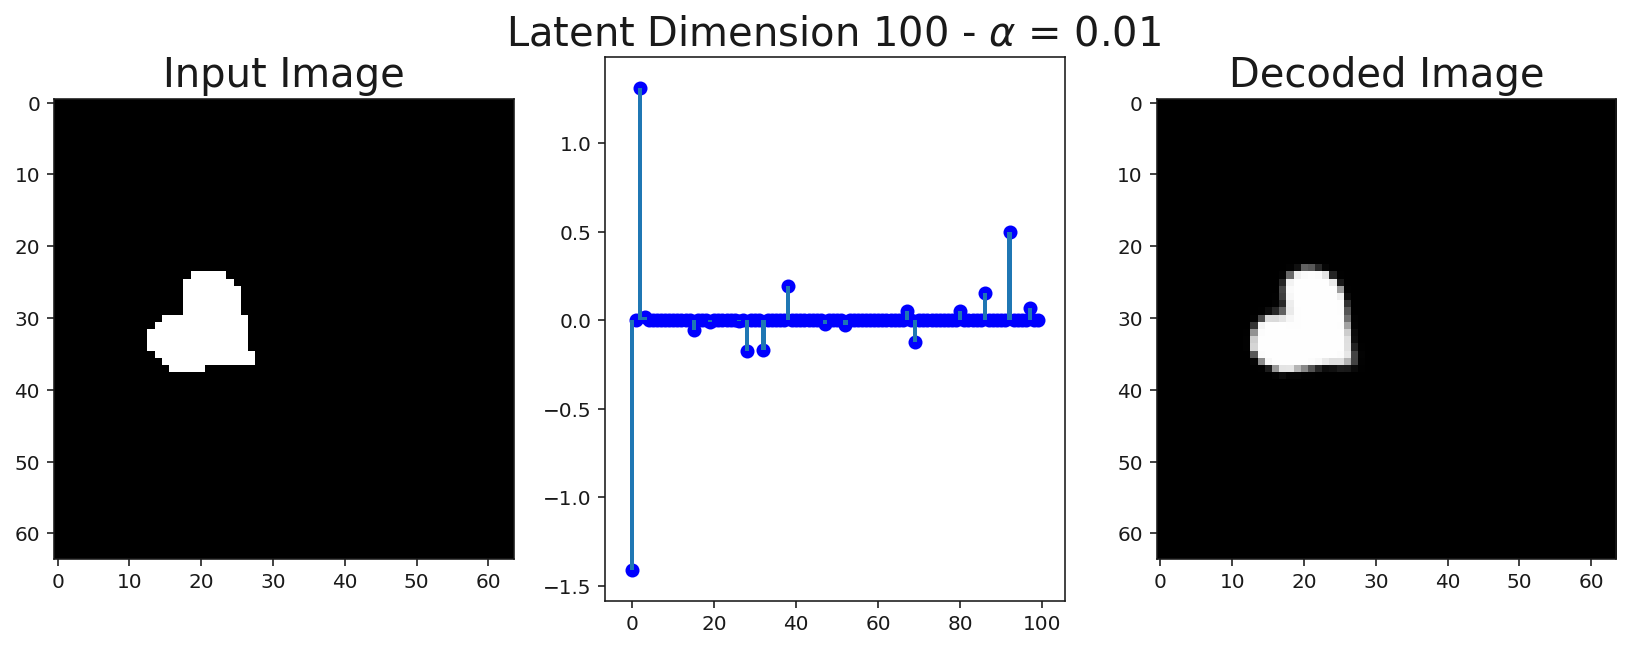

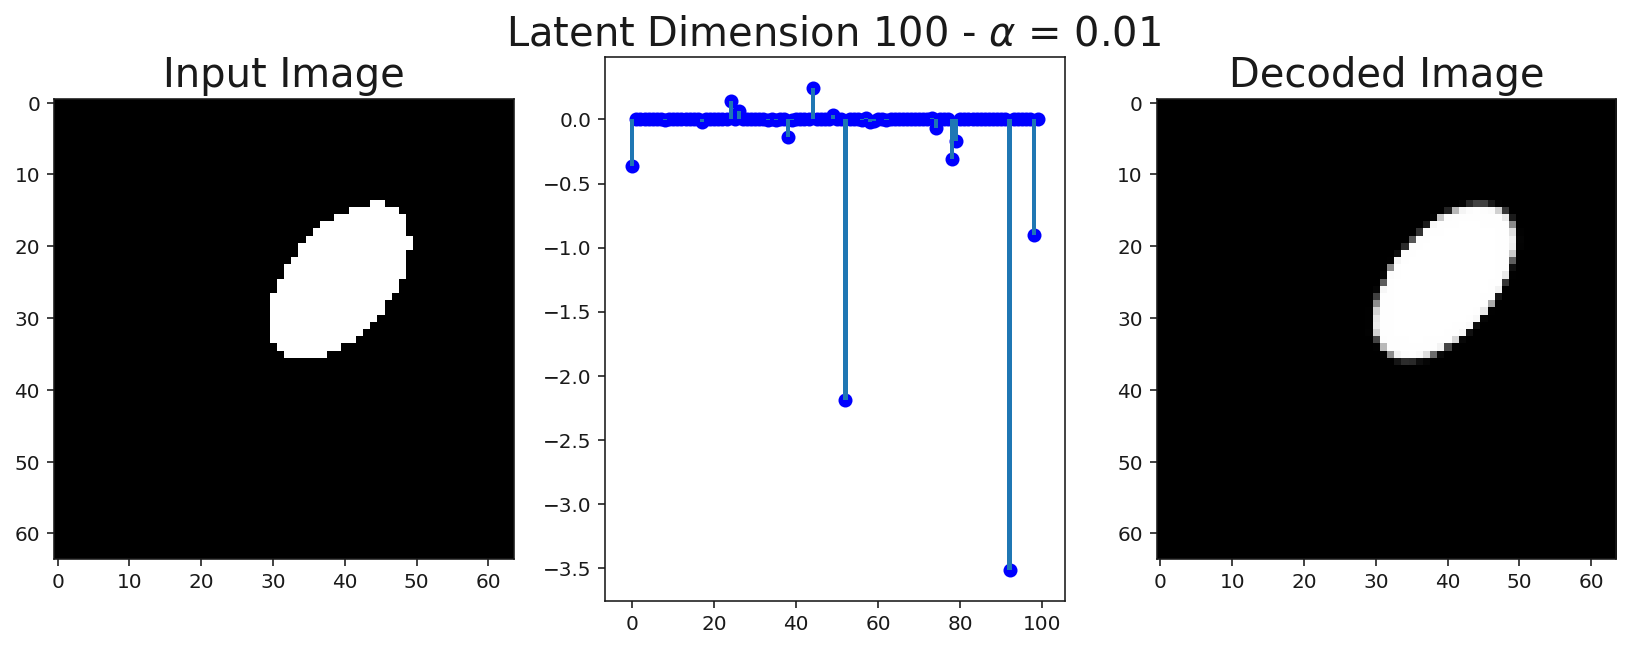

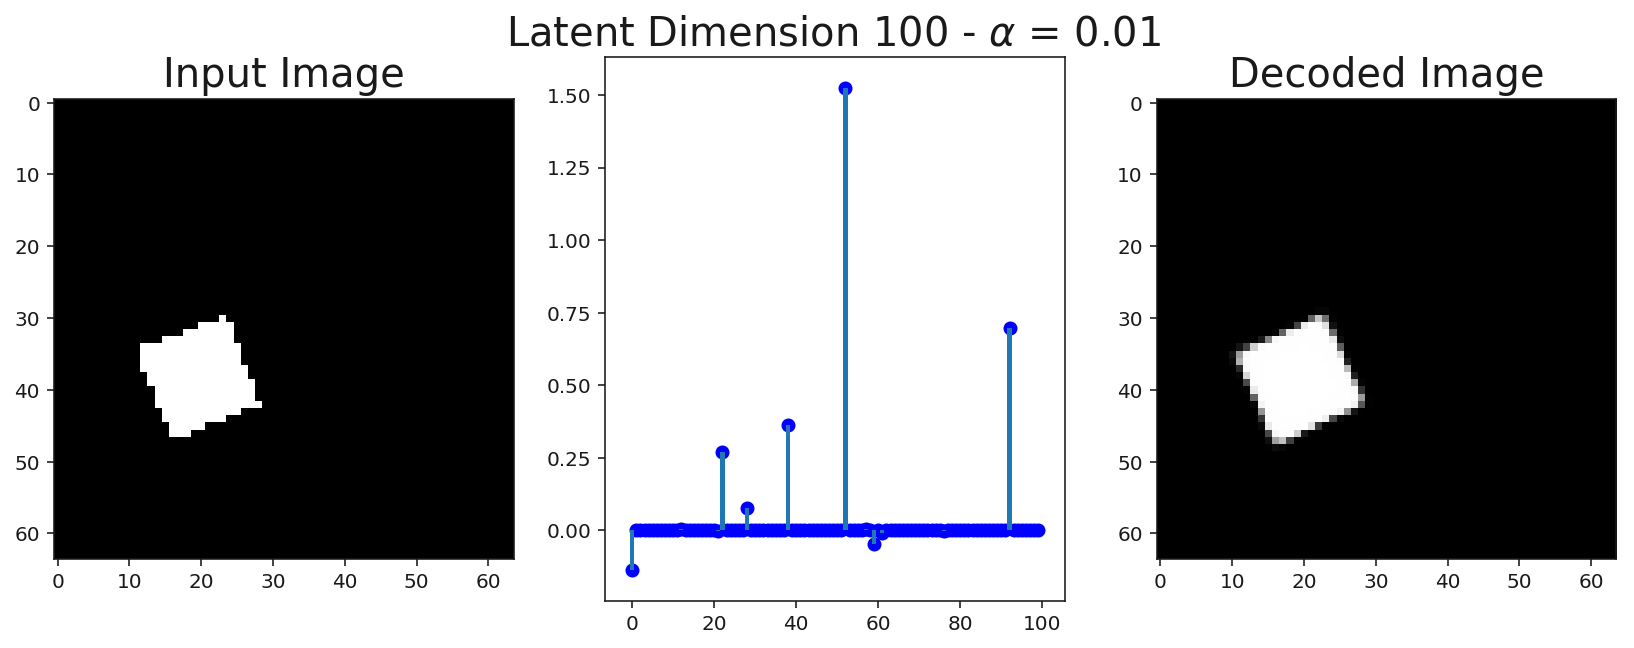

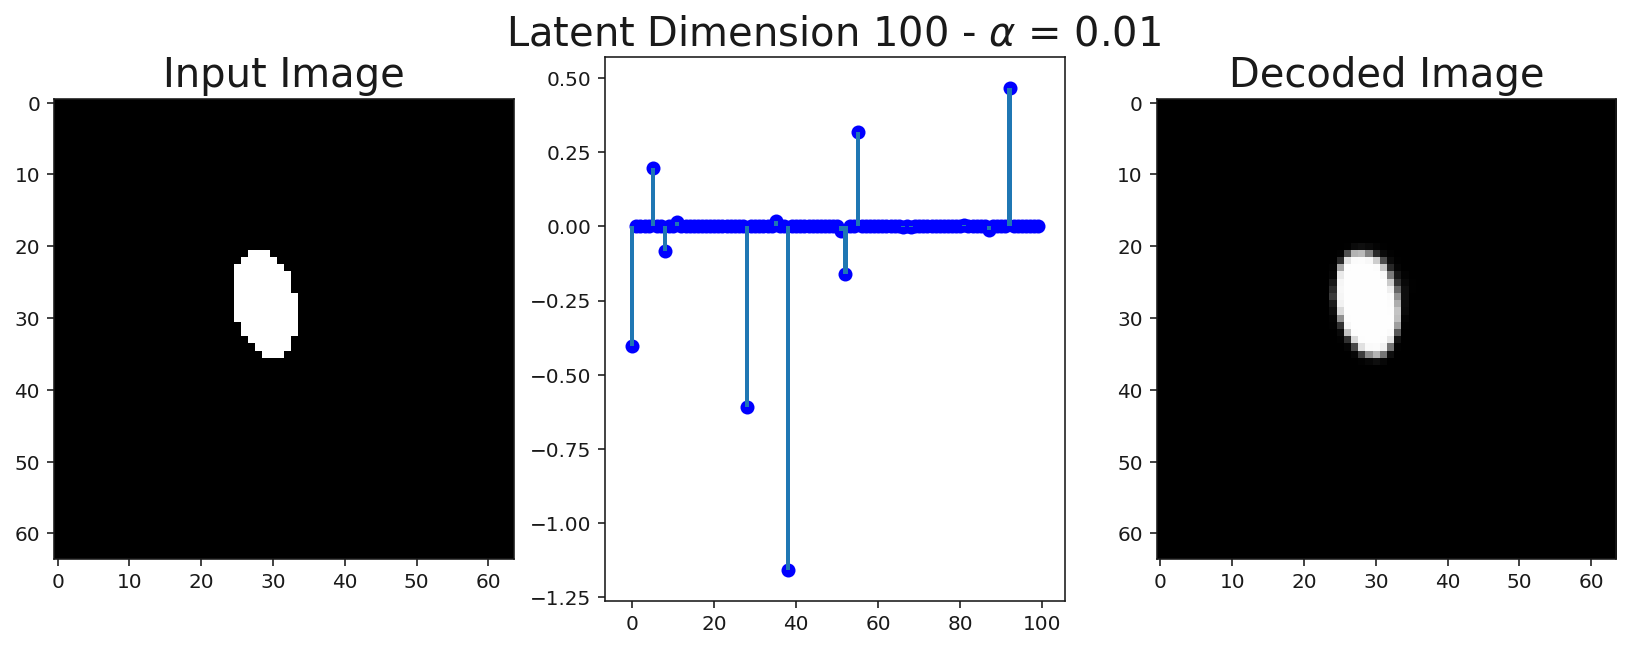

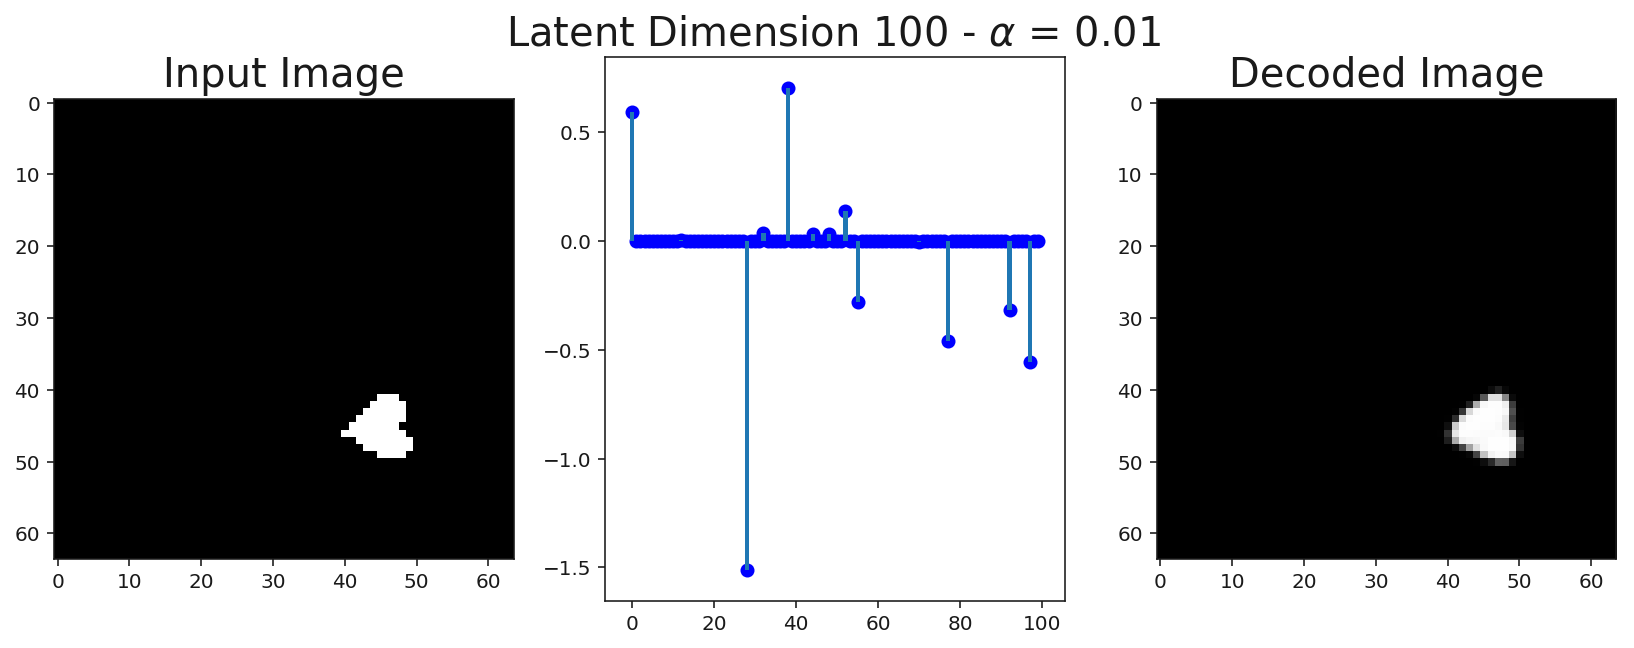

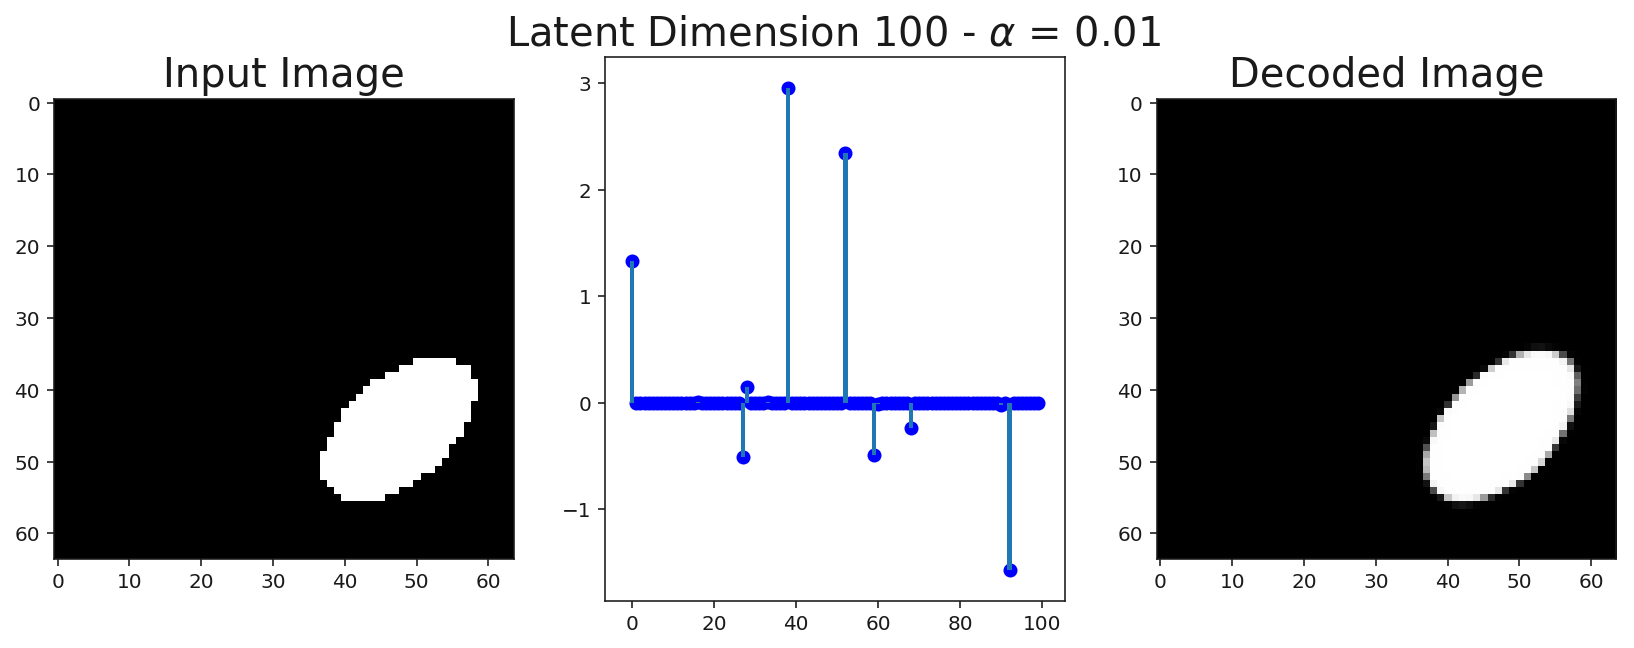

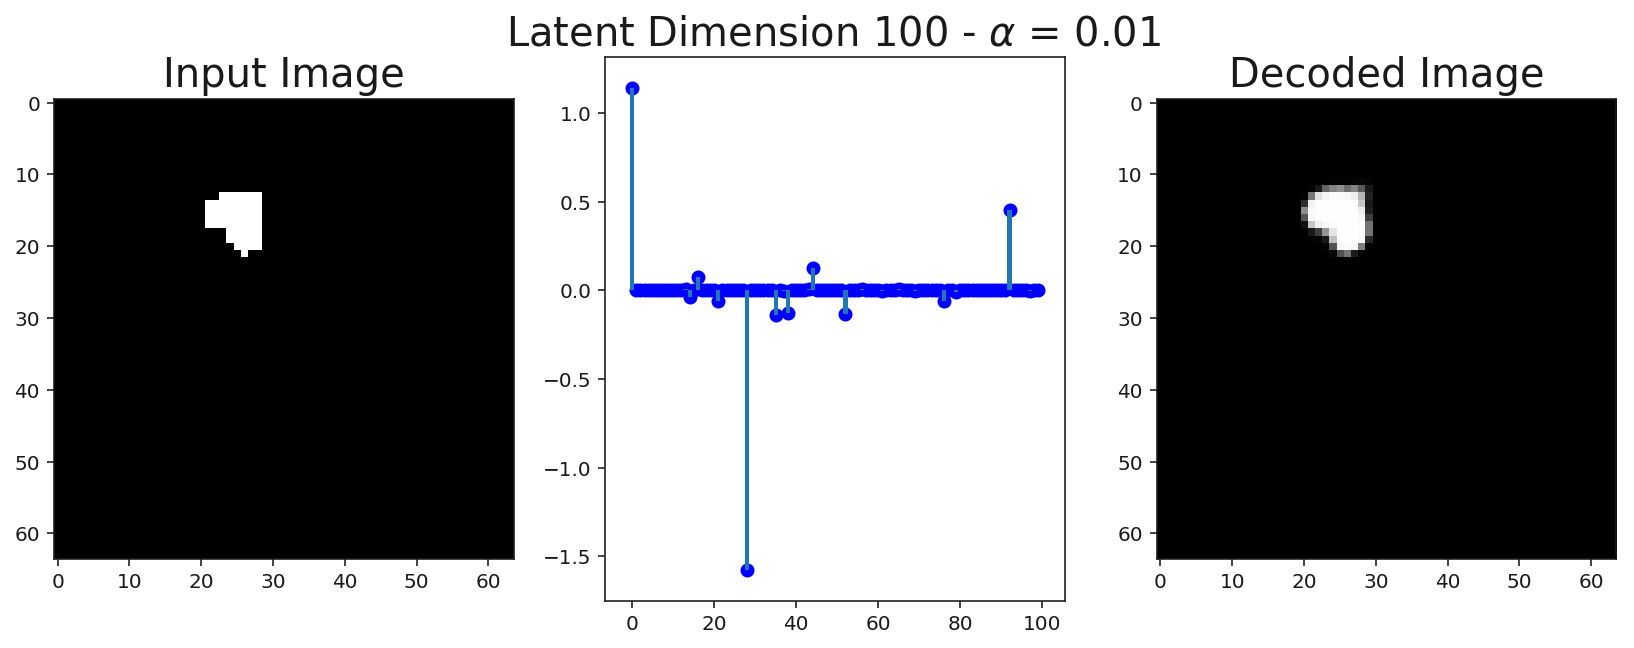

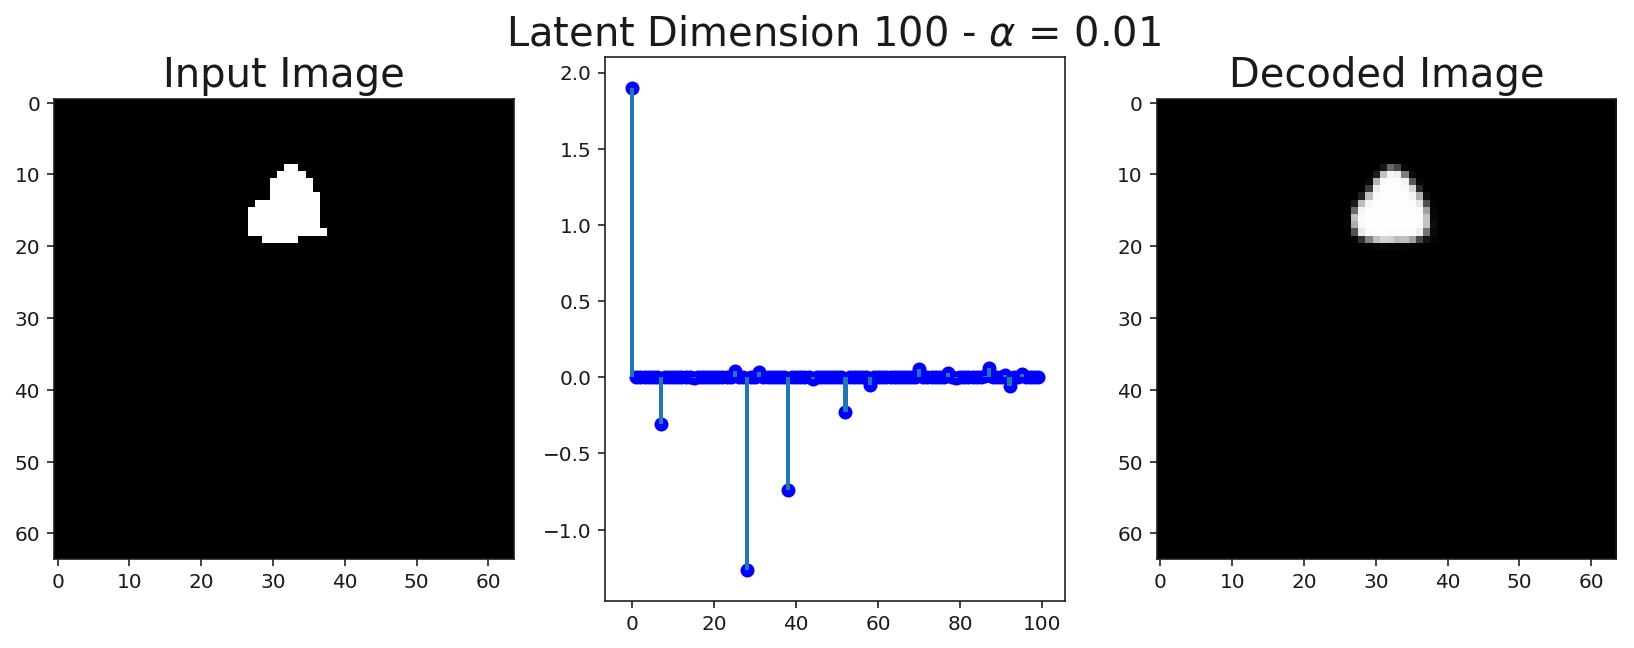

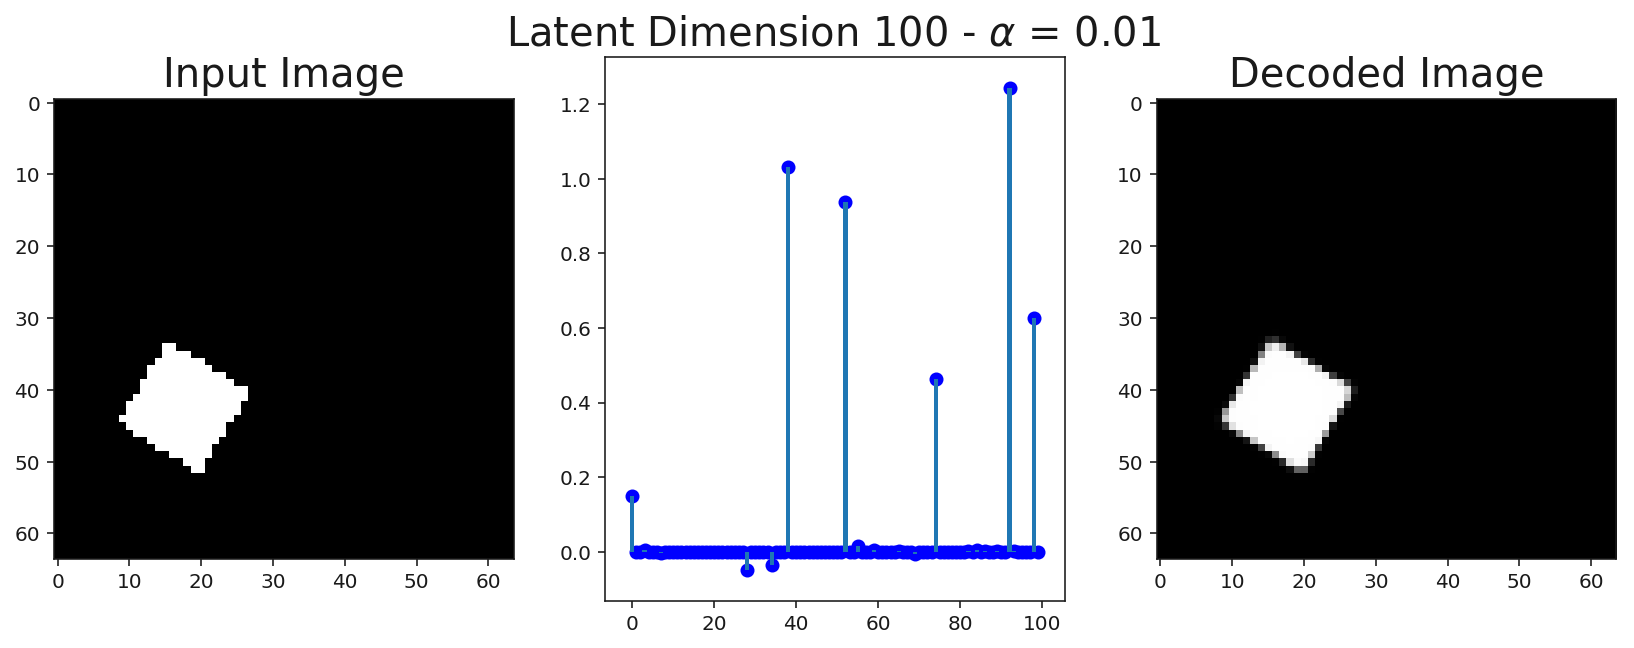

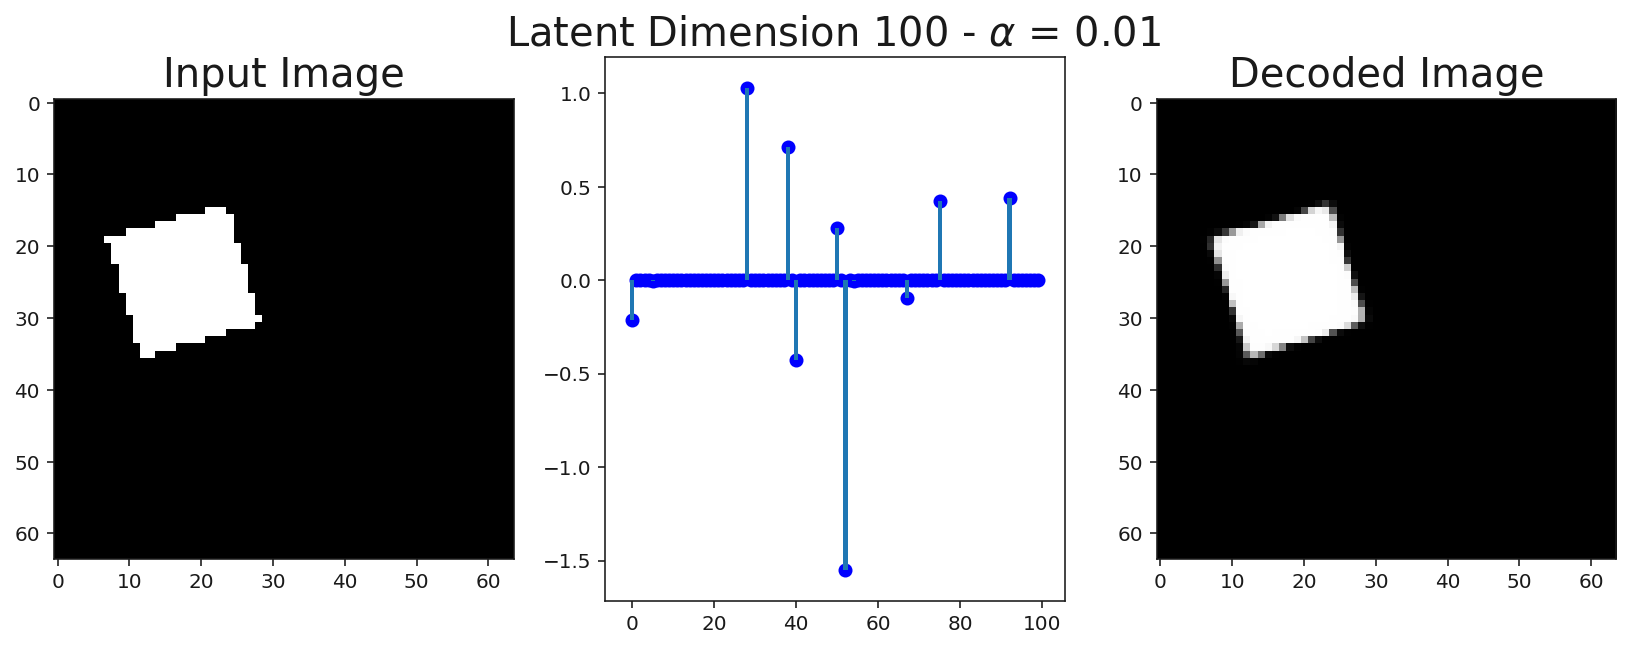

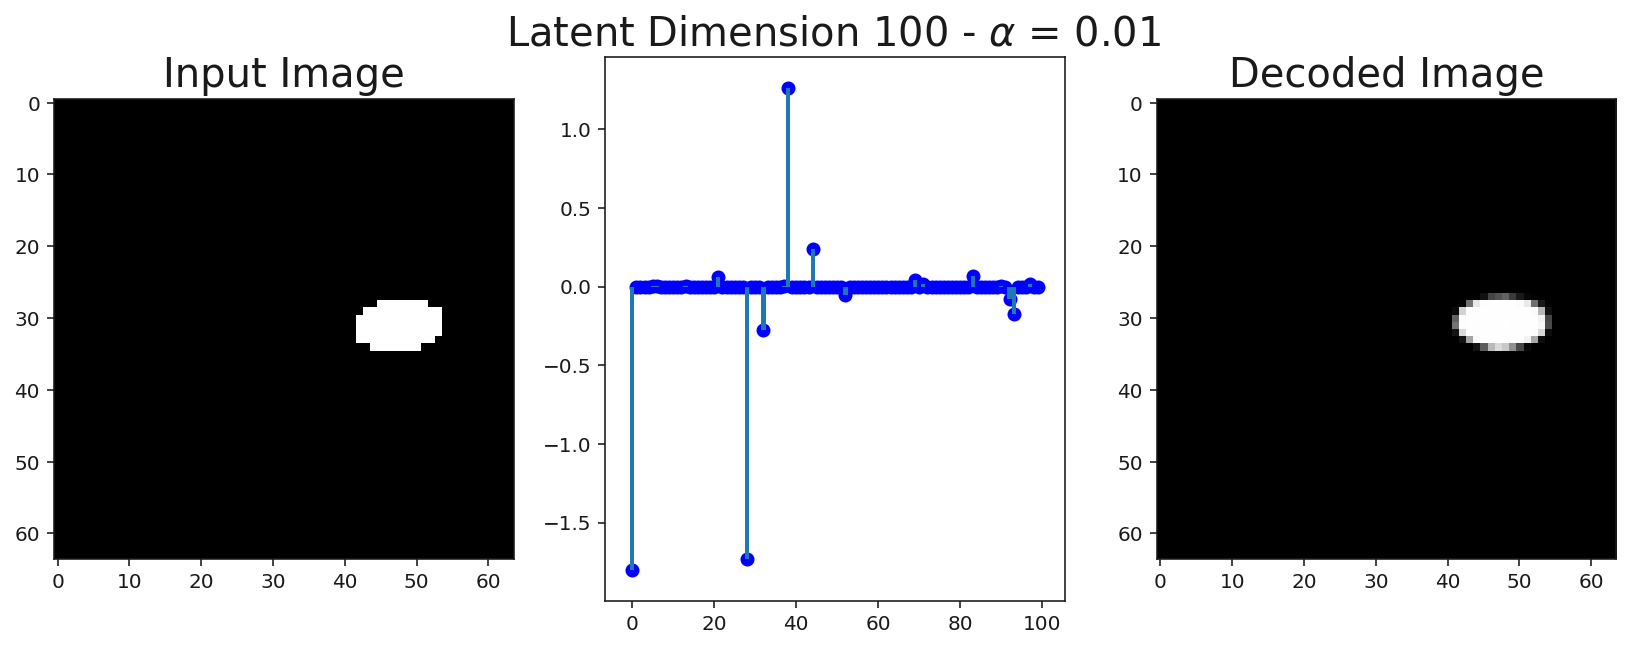

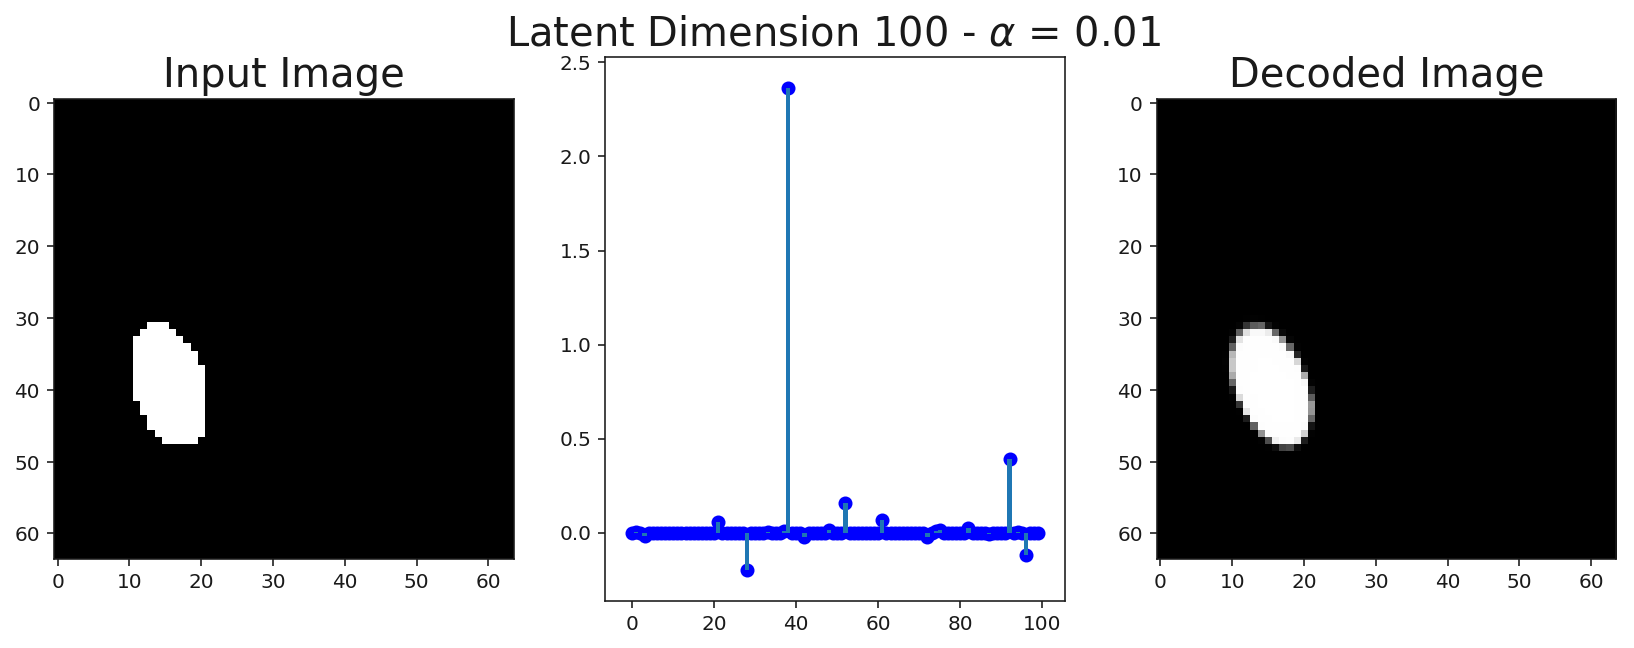

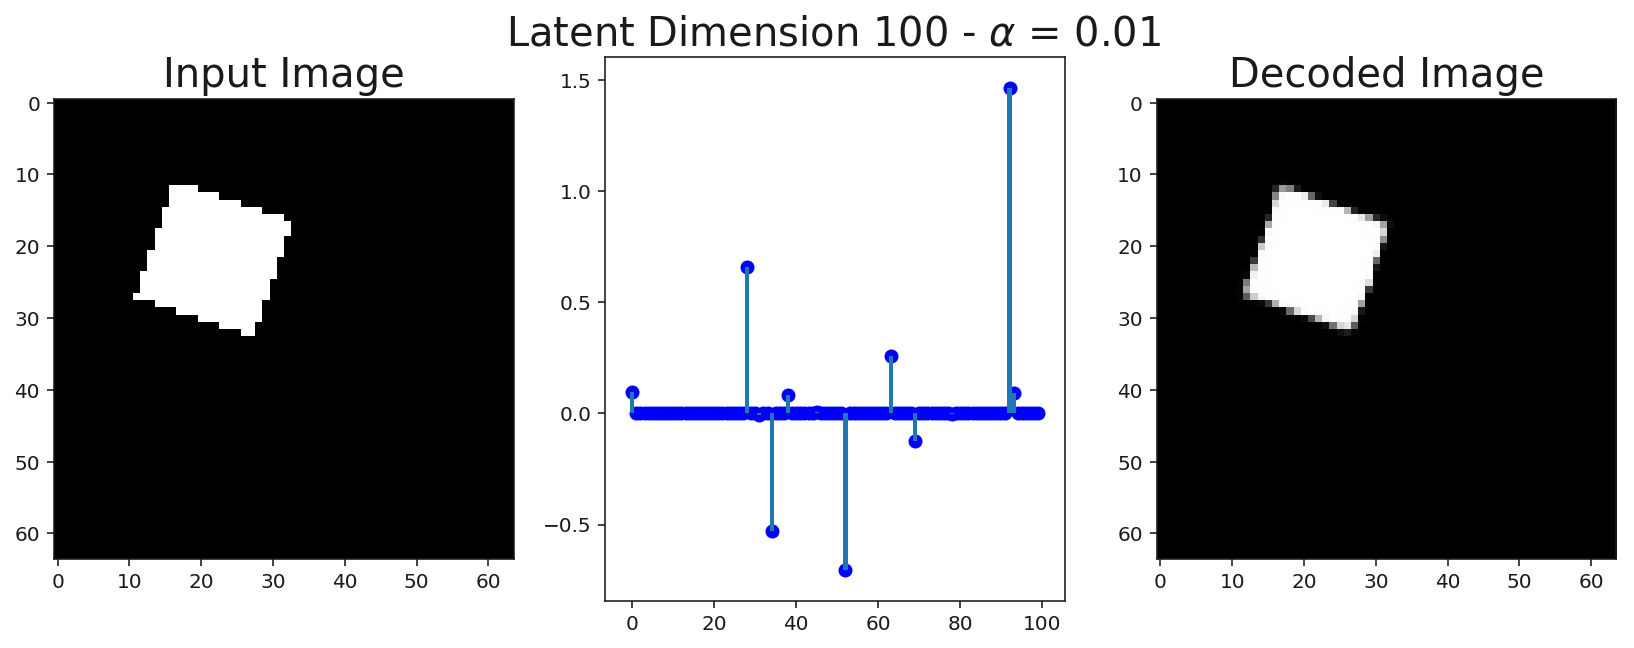

In [161]:
from src.plots import plot_encoding
for i in range(15):
    plot_encoding(images[i][None,:], convvsc, 
                  100, 
                  0.01, width=1)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


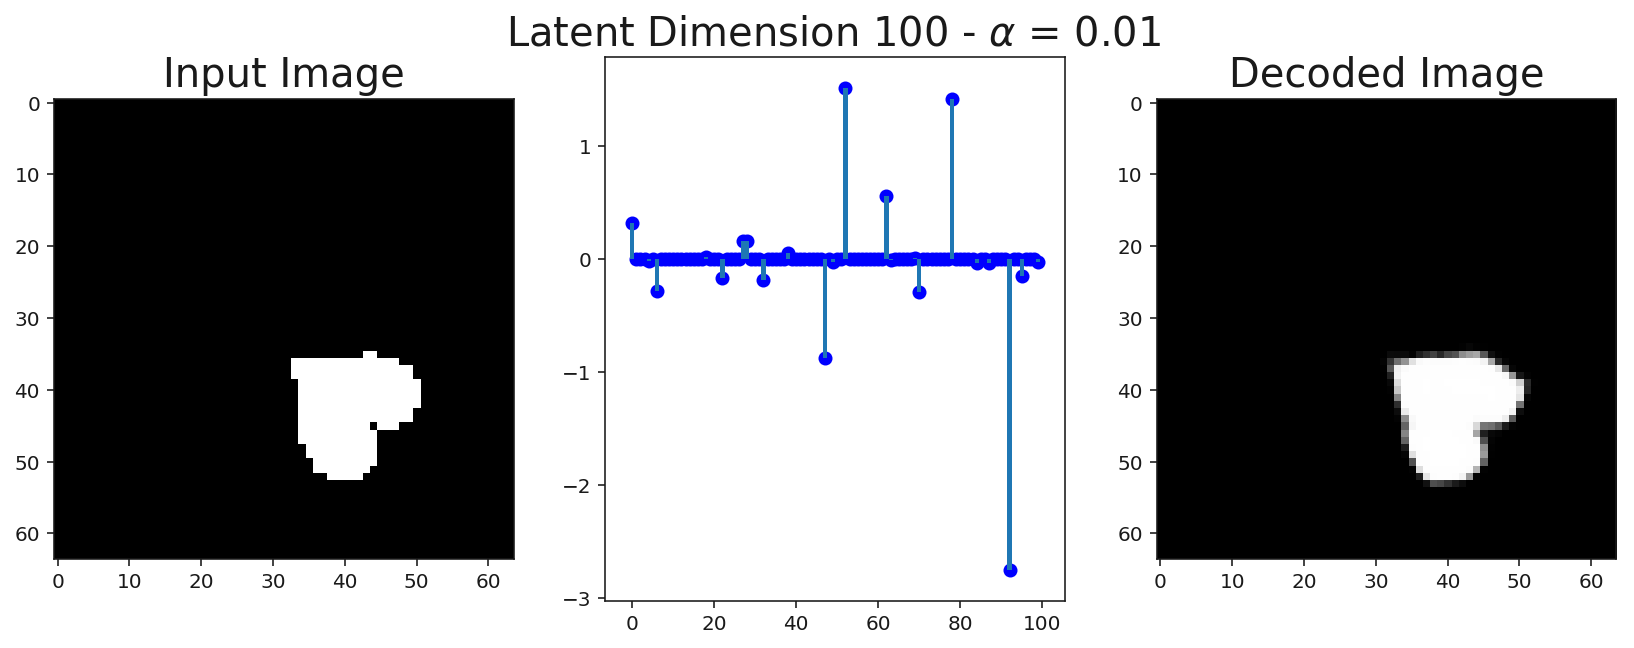

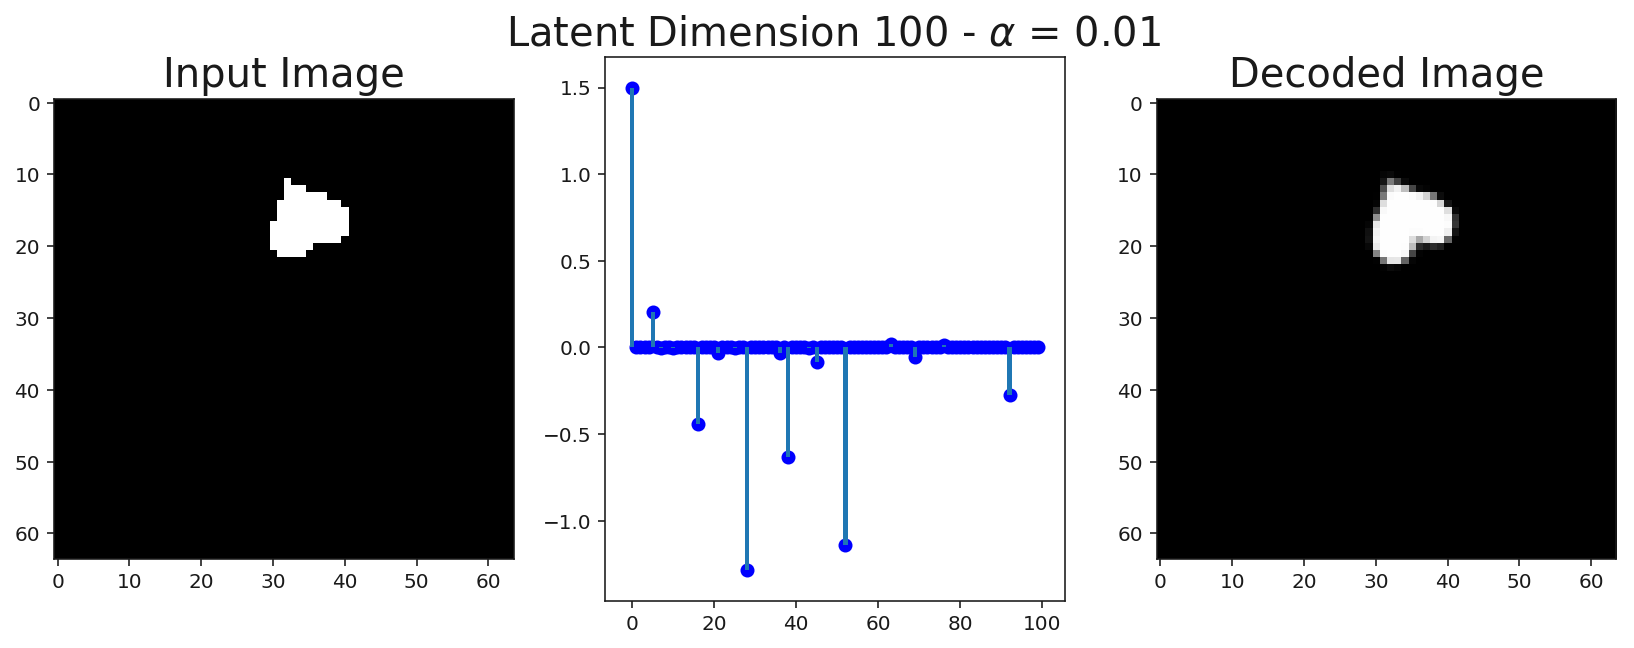

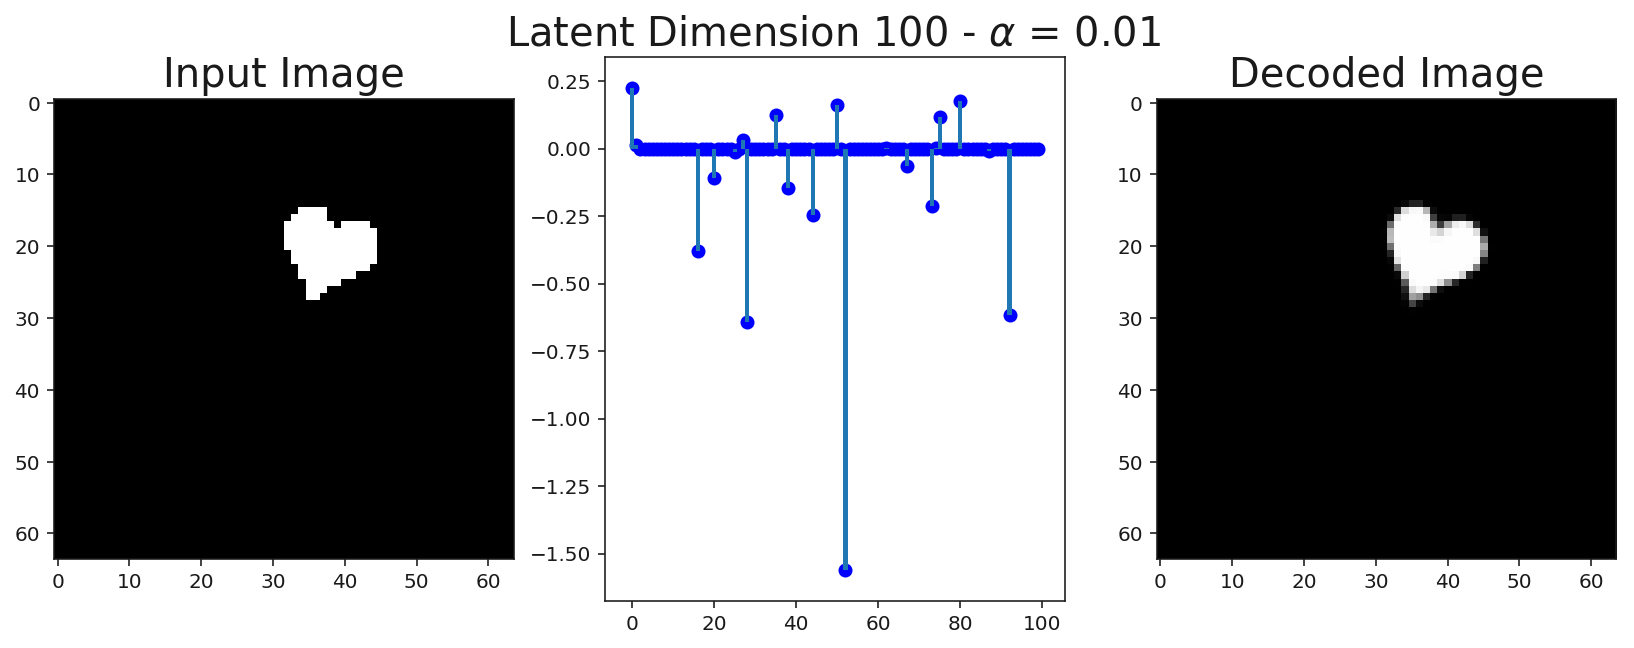

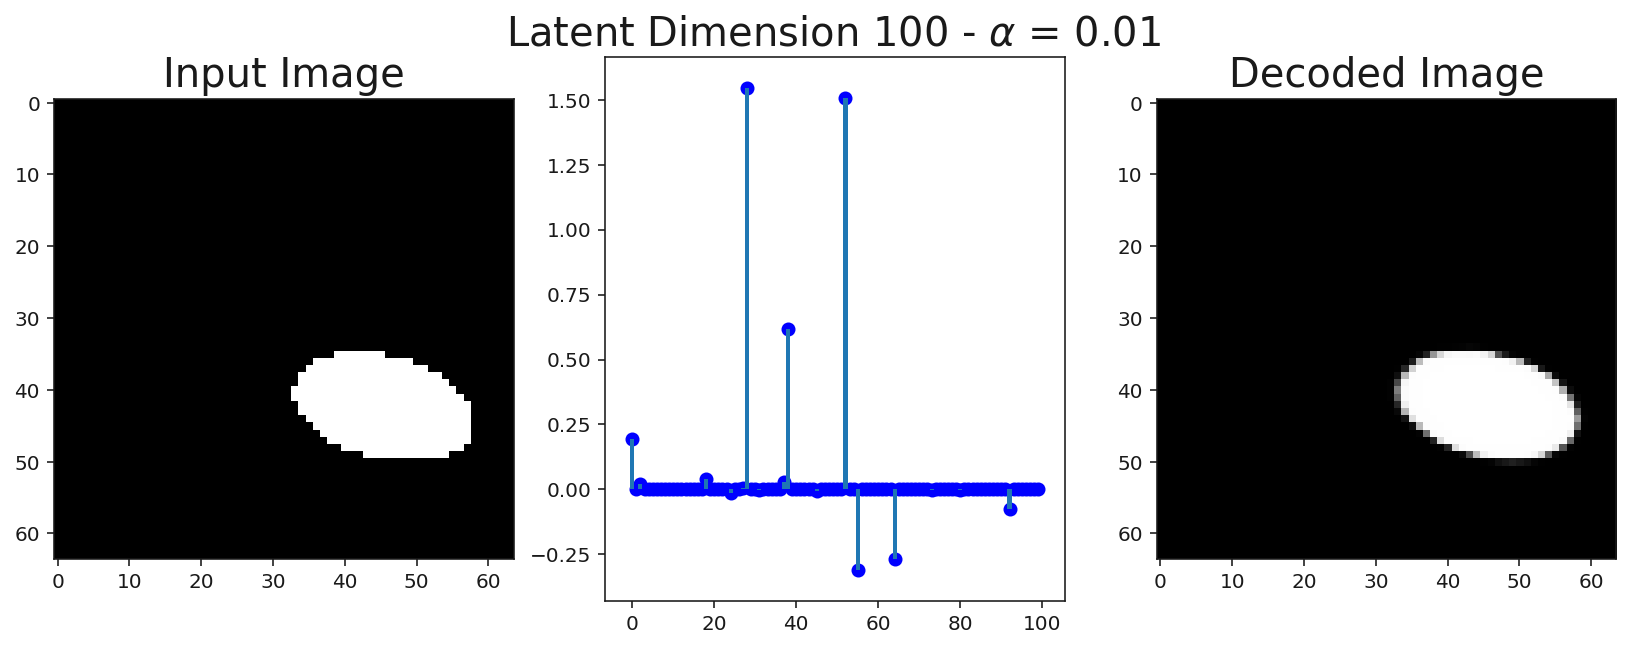

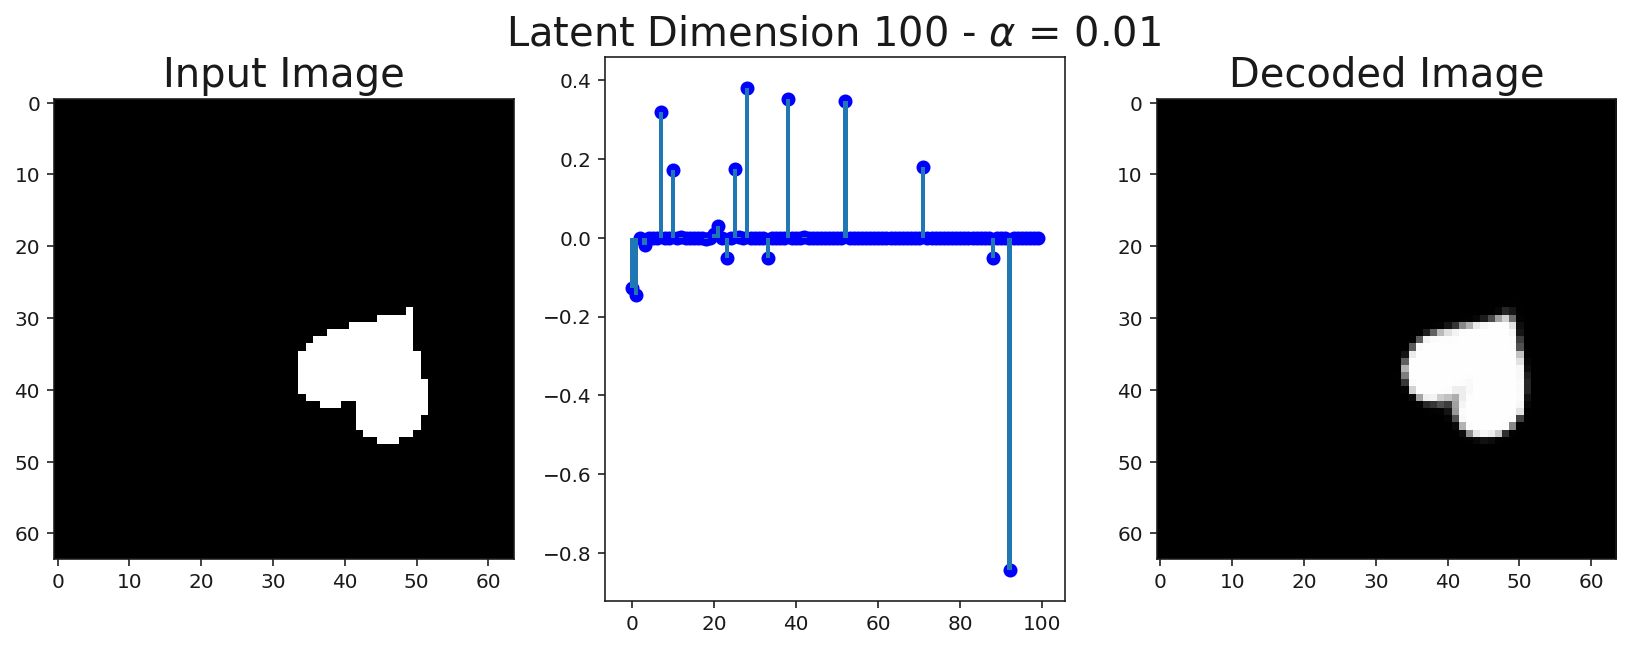

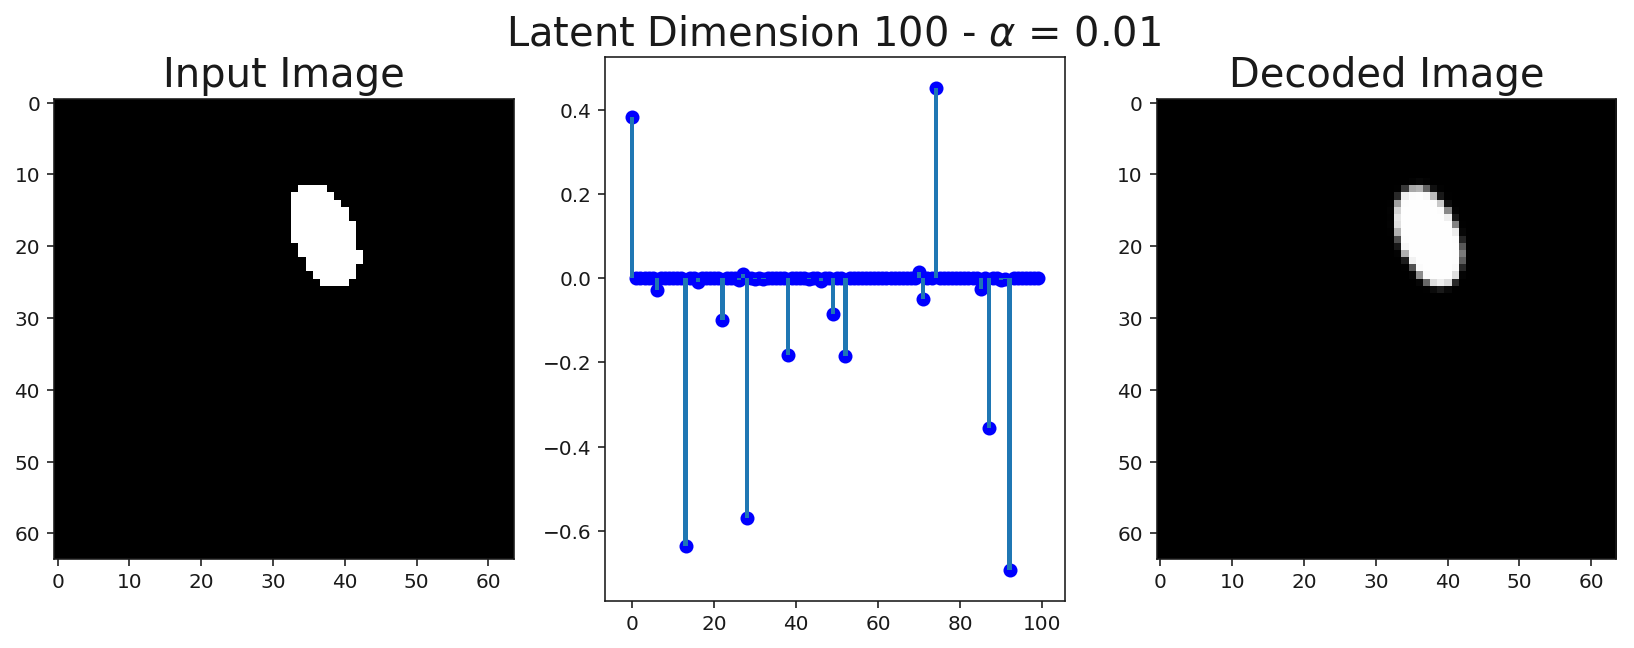

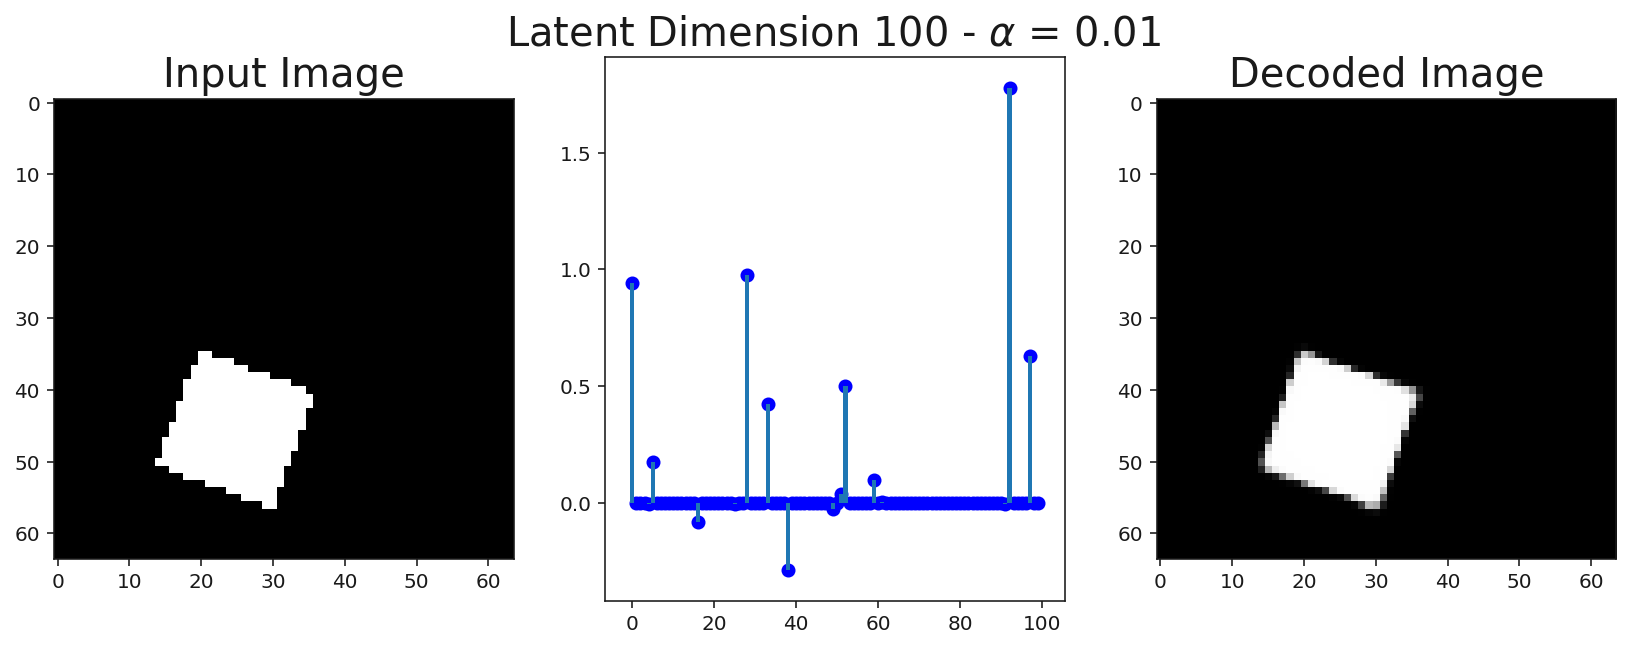

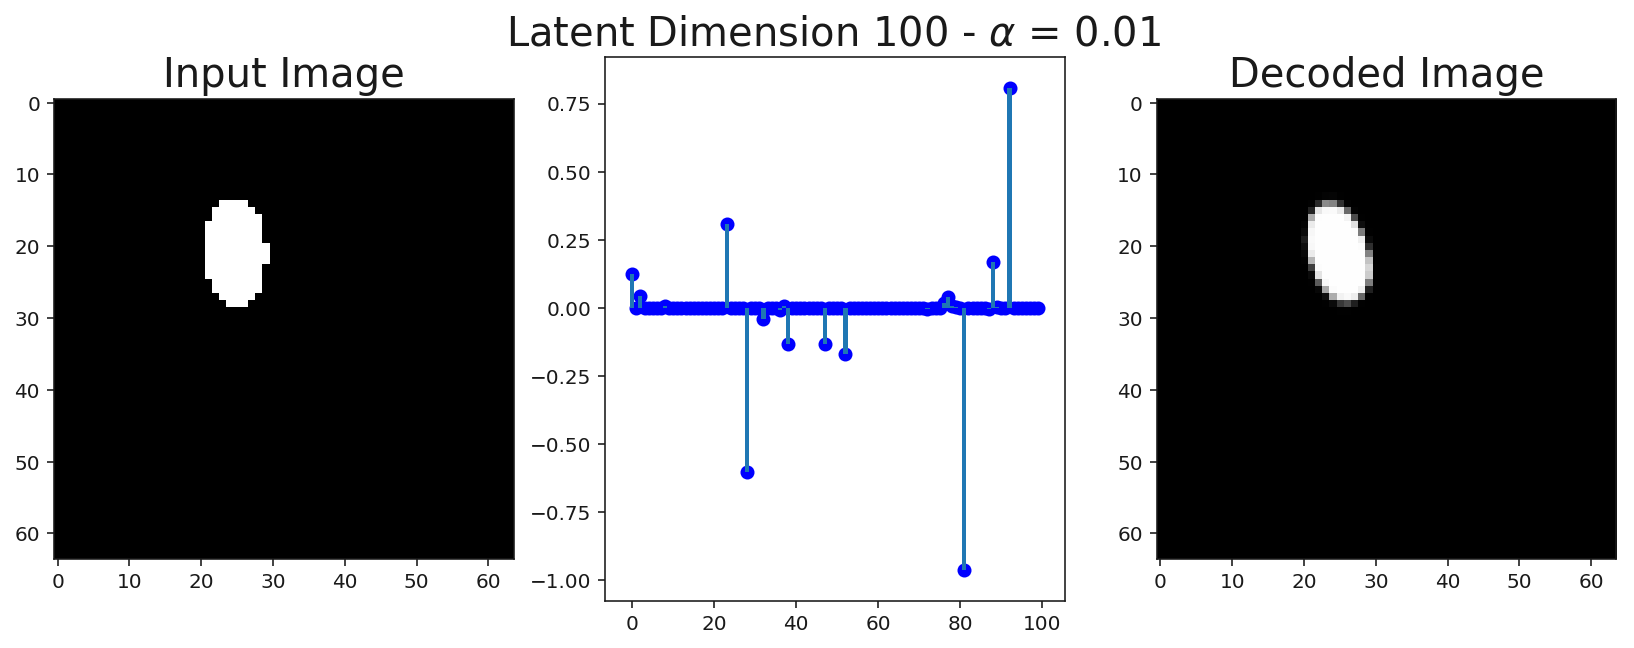

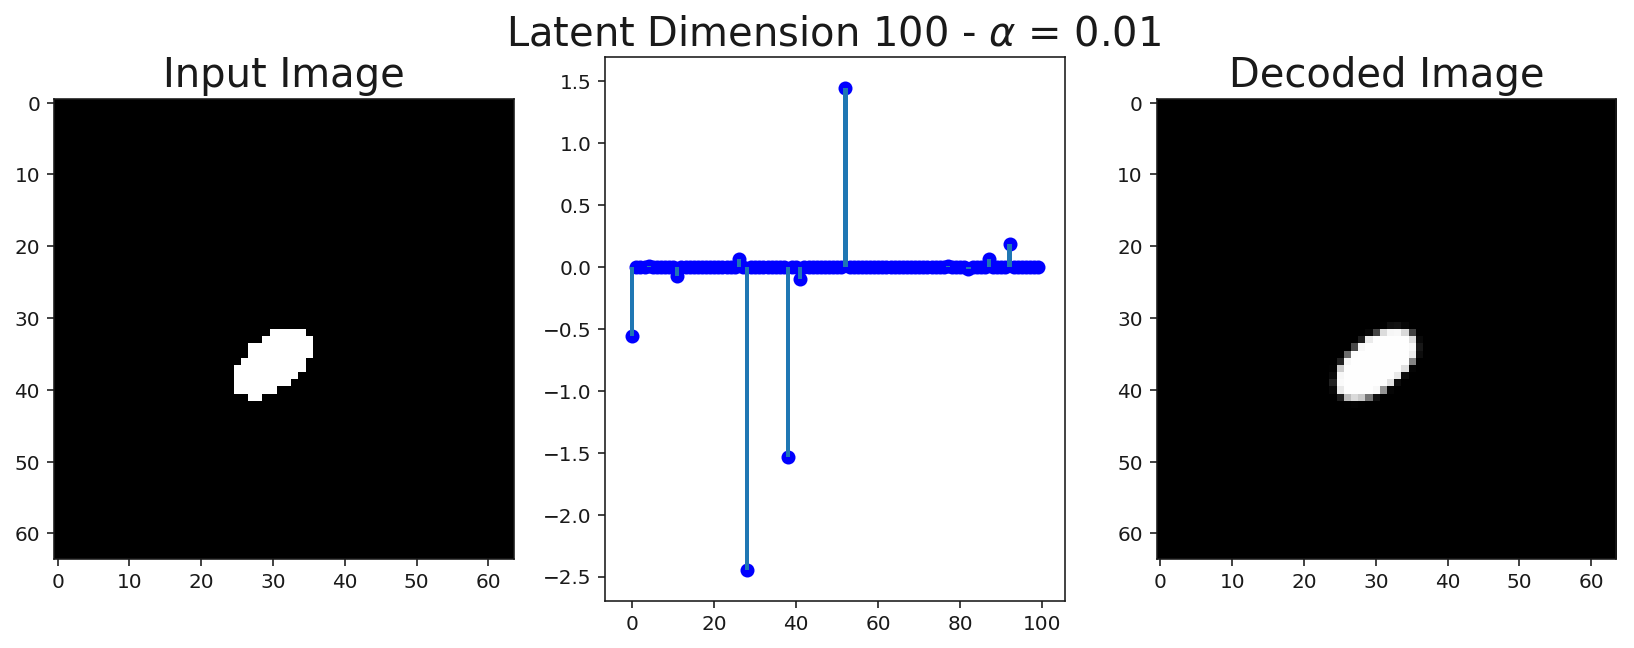

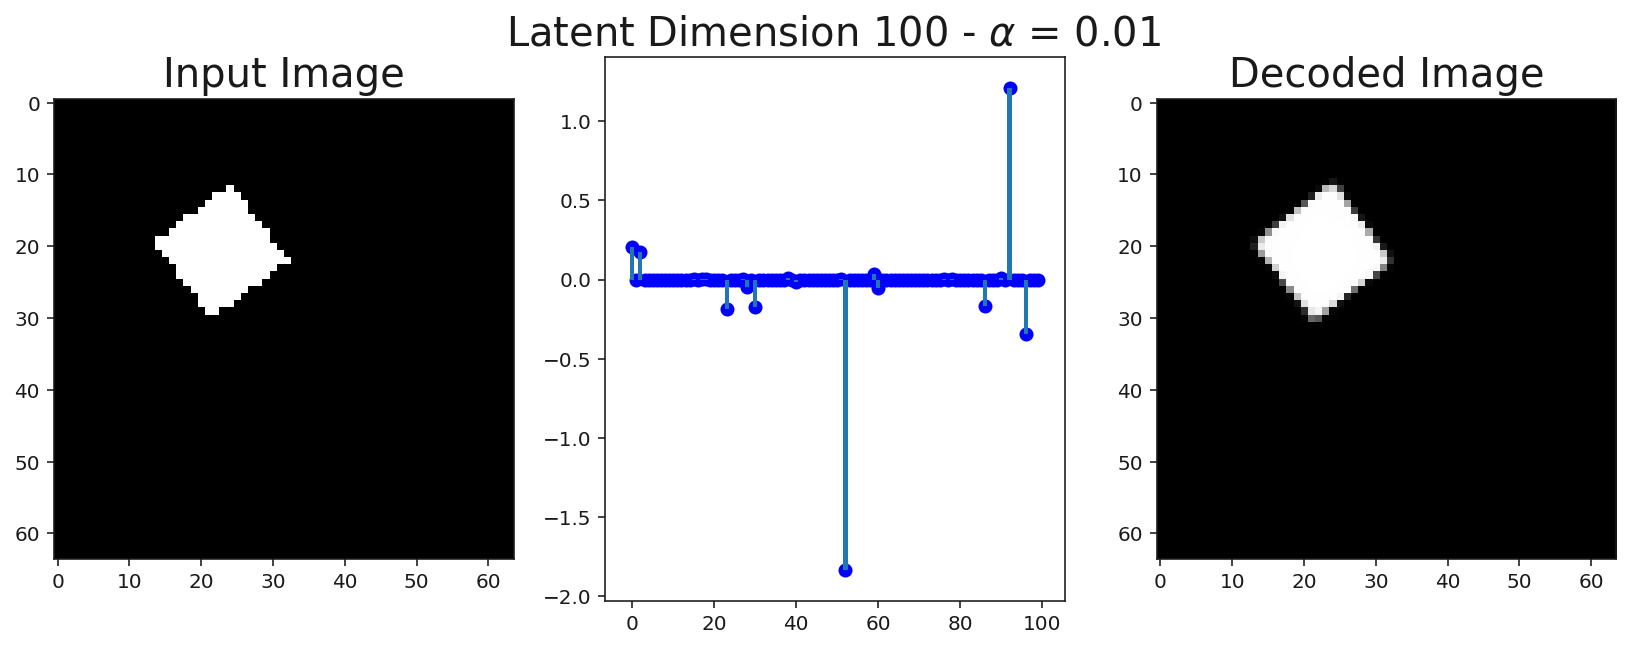

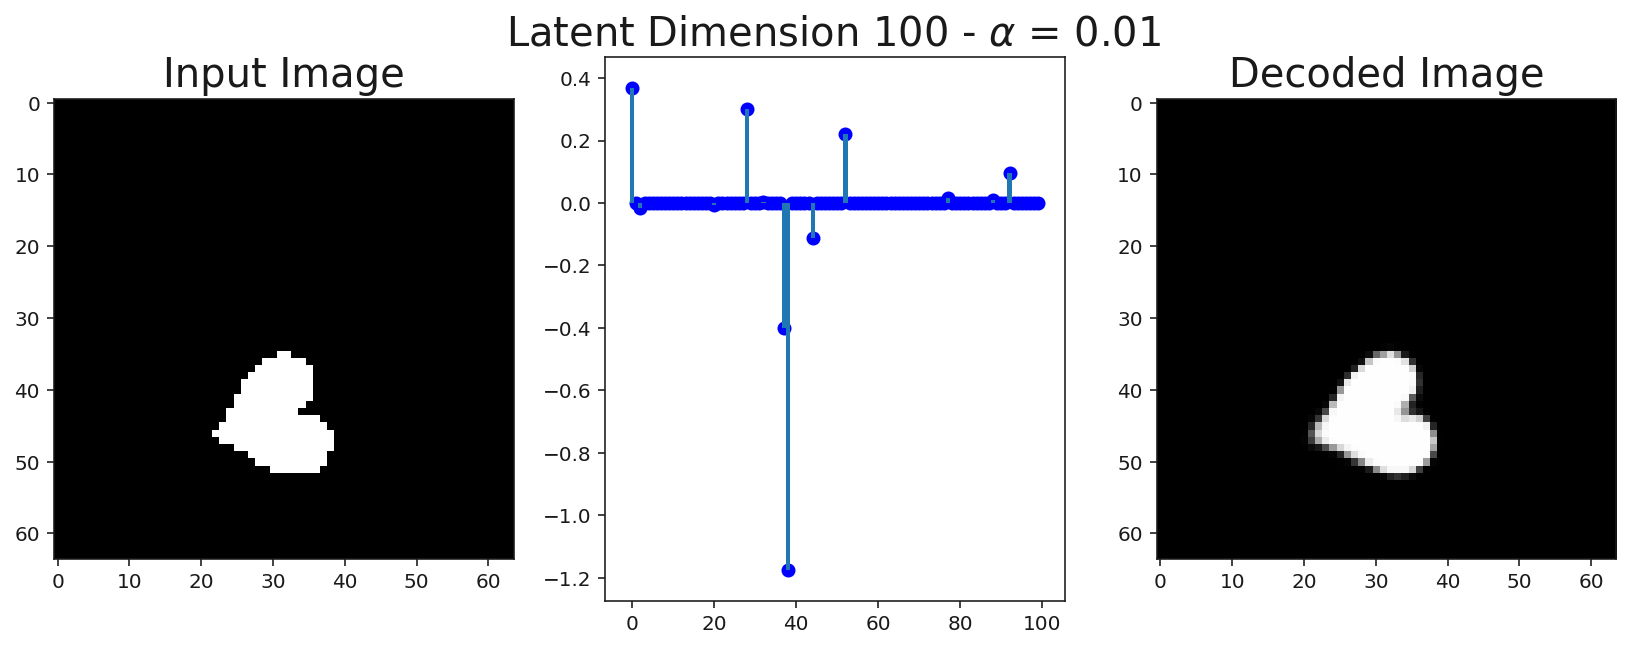

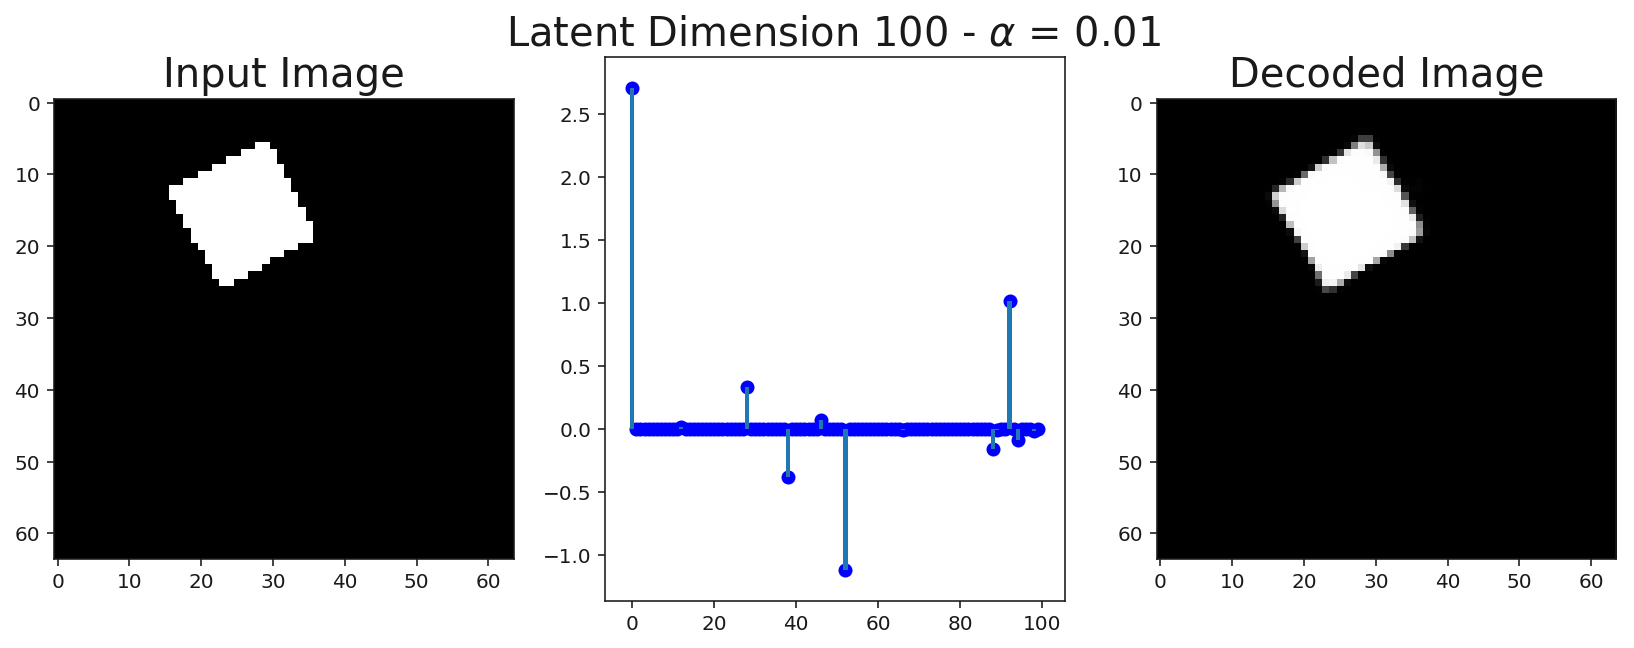

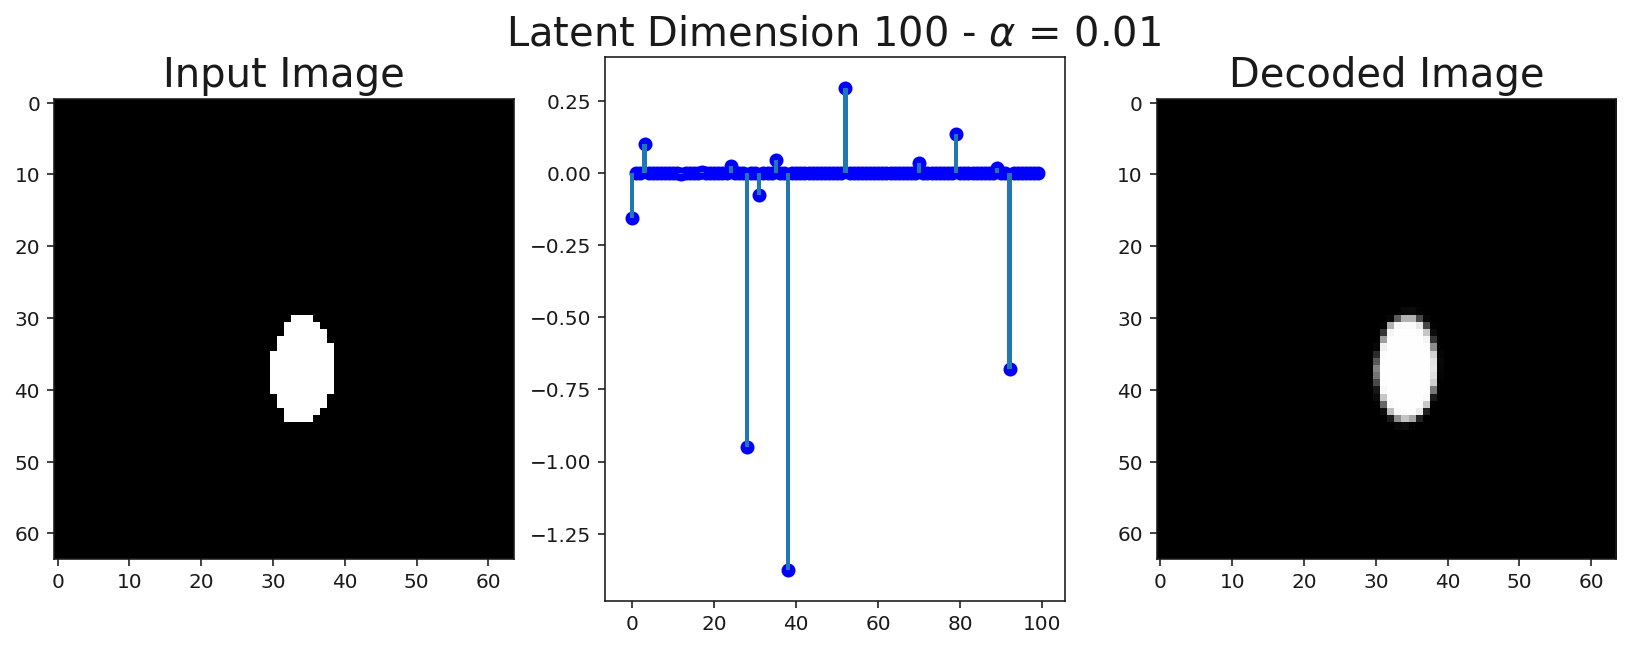

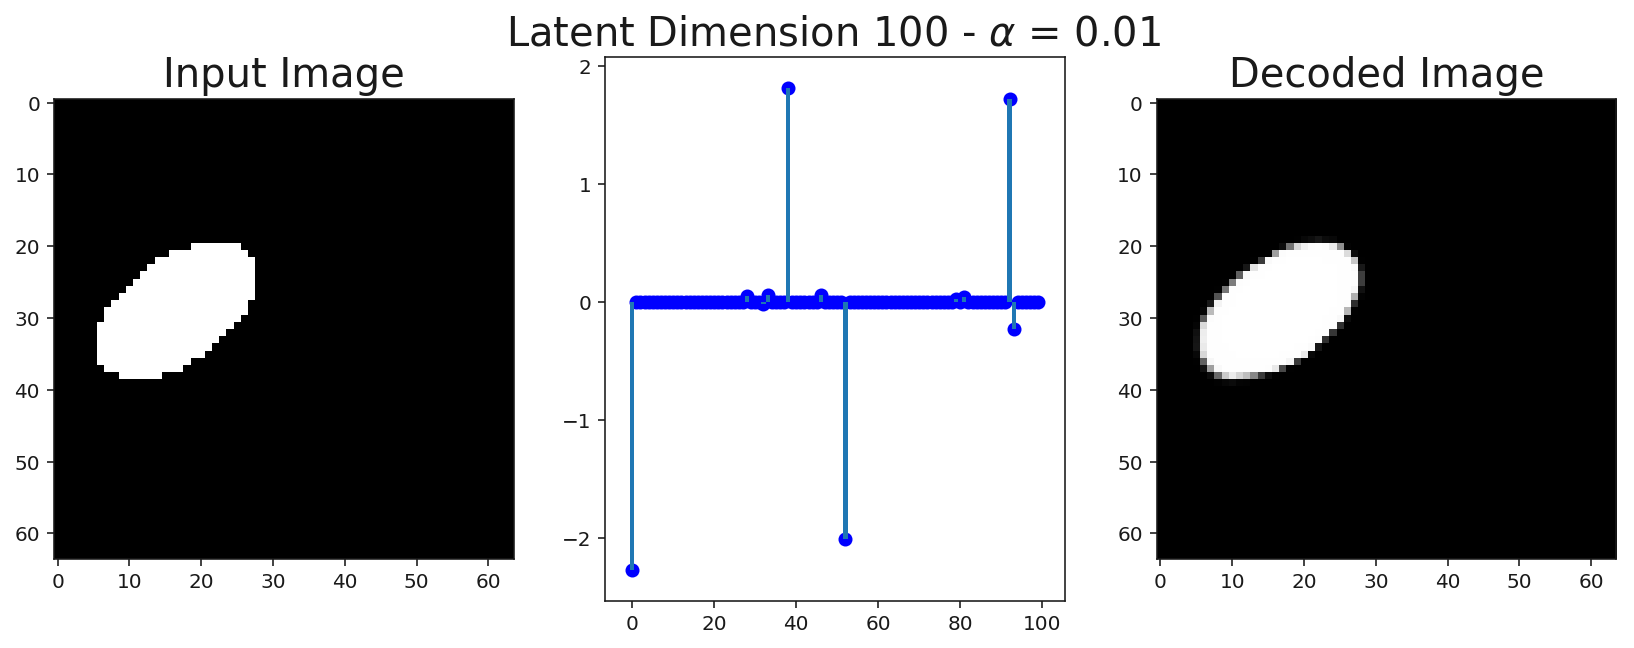

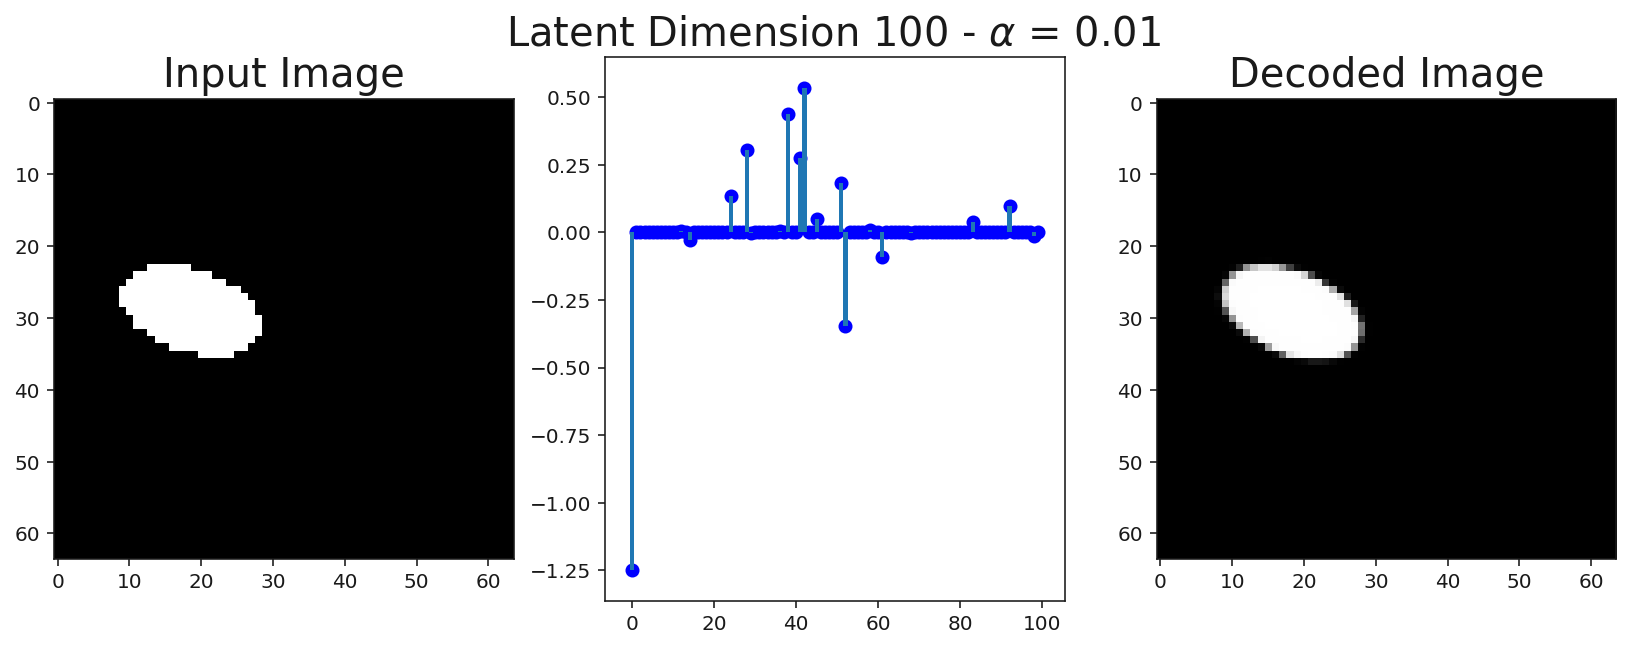

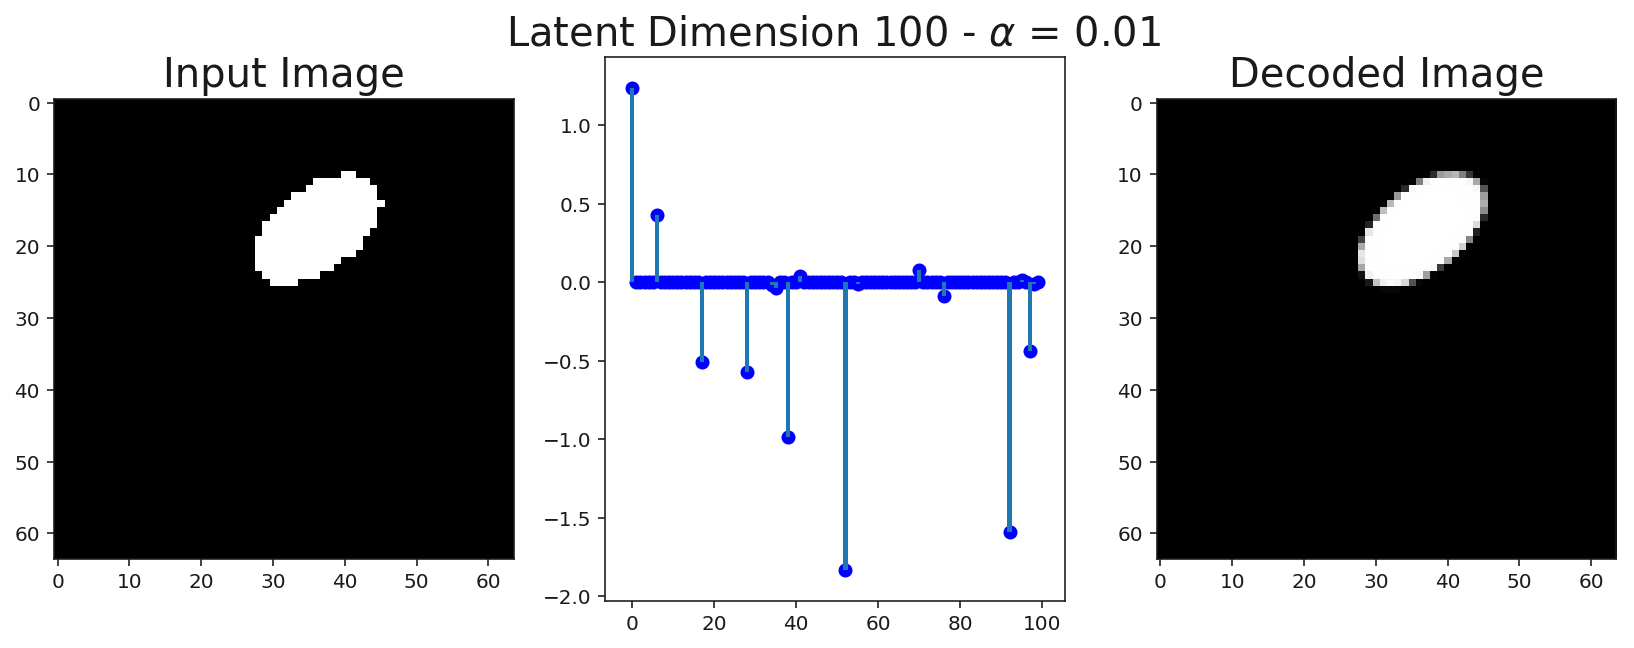

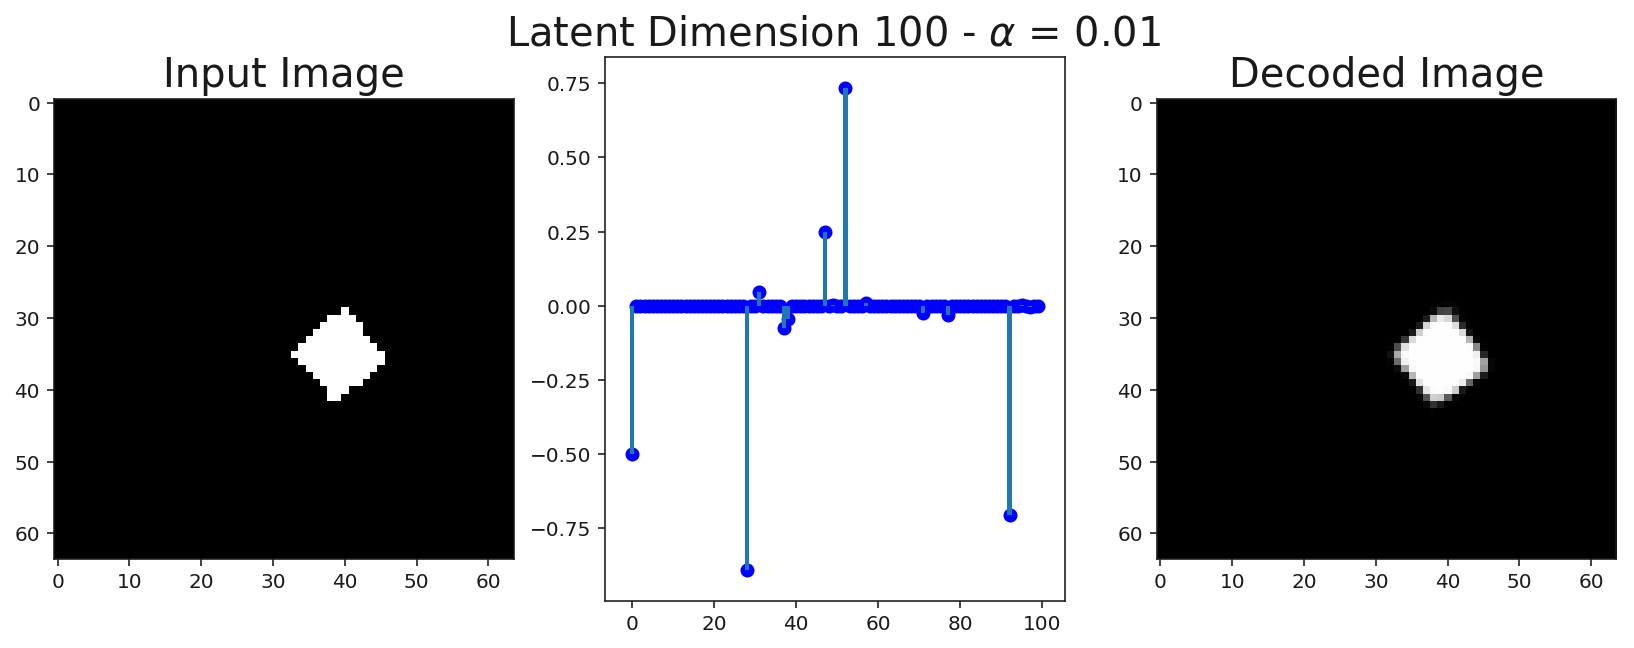

In [162]:
from src.plots import plot_encoding
for i in range(15, len(images)):
    plot_encoding(images[i][None,:], convvsc, 
                  100, 
                  0.01, width=1)

In [ ]:
# size: 36
# shape: 60


# size: 9

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


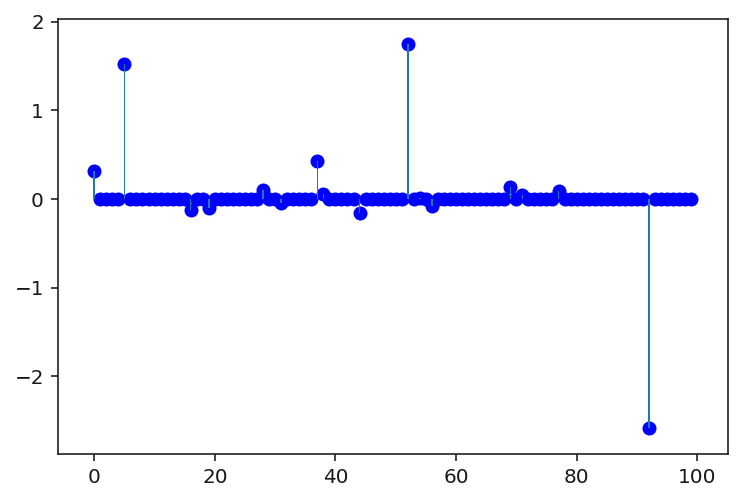

[56 31 16  0 31  0 44 77 16 44 56 37 69 56 92 19 38 16 28]
[7, 28]


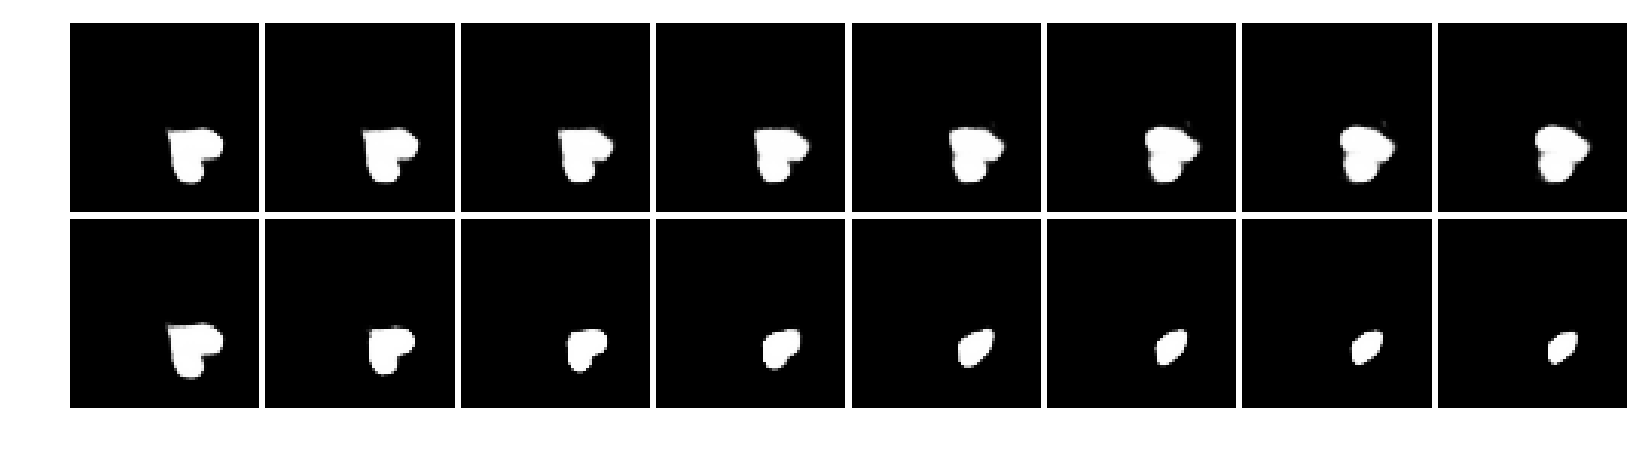

In [186]:
# test
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[15][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.4, threshold=0.01,
                          plot_all=False, 
                          plot_list=[7, 28],
                          n_indices=19)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


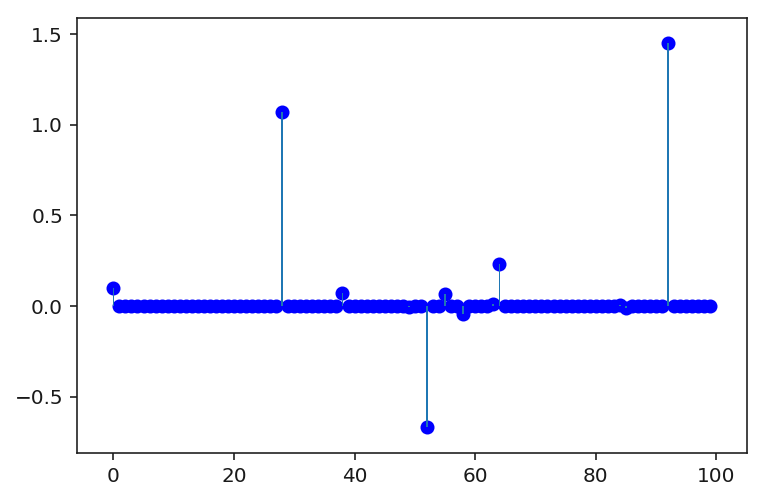

[85 92 58 52 85 38  0 64 38 92 55 28 92 28 64  0 85 85 28]
[34]


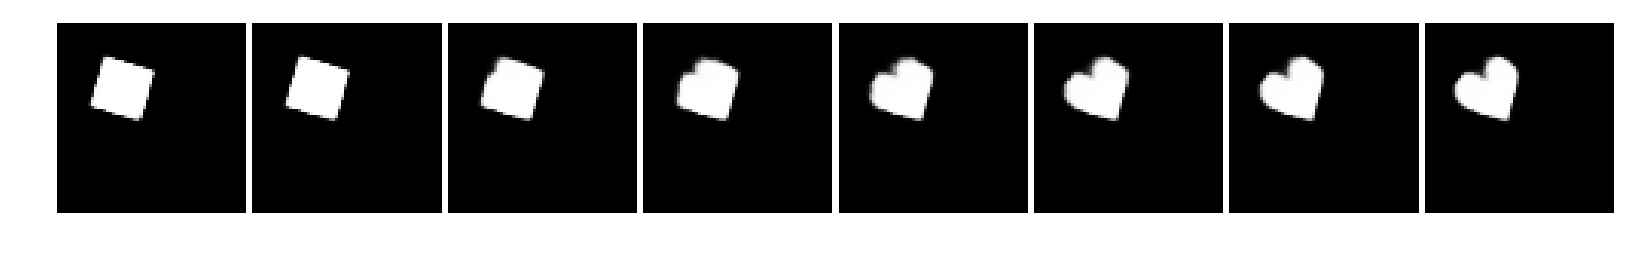

In [189]:
# test #1
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[14][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.2, threshold=0.01,
                          plot_all=False, 
                          plot_list=[34],
                          n_indices=19)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


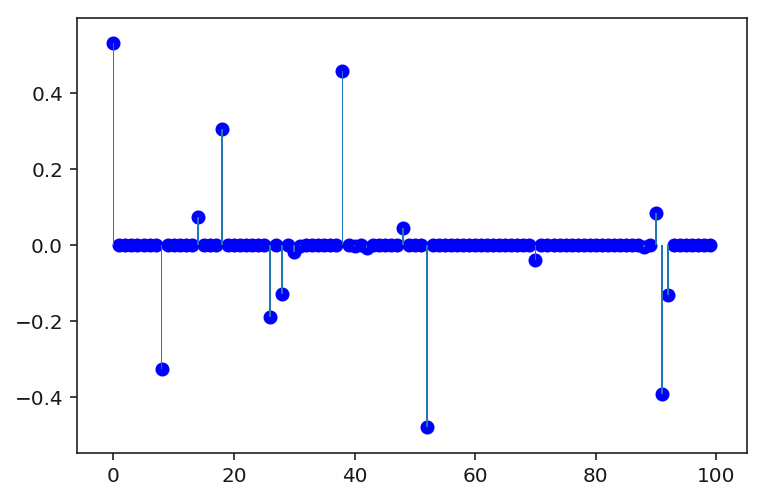

[18 38 90 18  0 92 14  8  8 52 28 18 26 90  0 26 48 52 38]
[28]


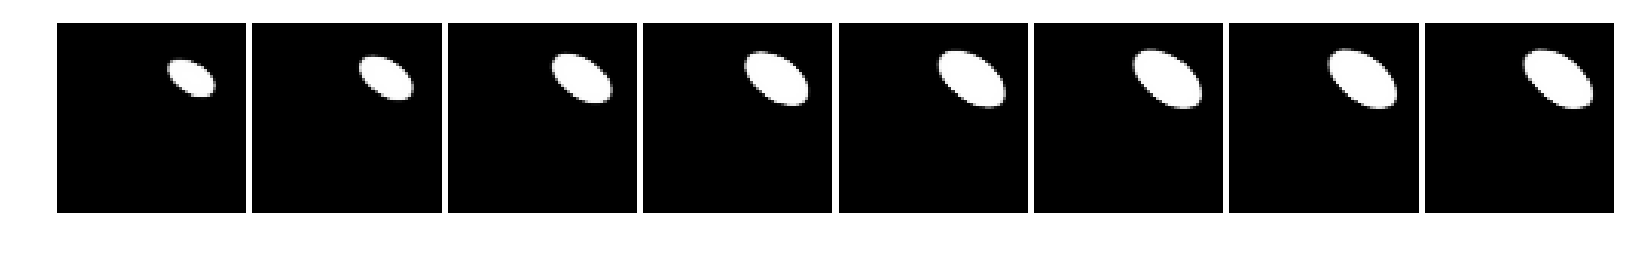

In [197]:
# test #1
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[0][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.4, threshold=0.01,
                          plot_all=False, 
                          plot_list=[28],
                          n_indices=19)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


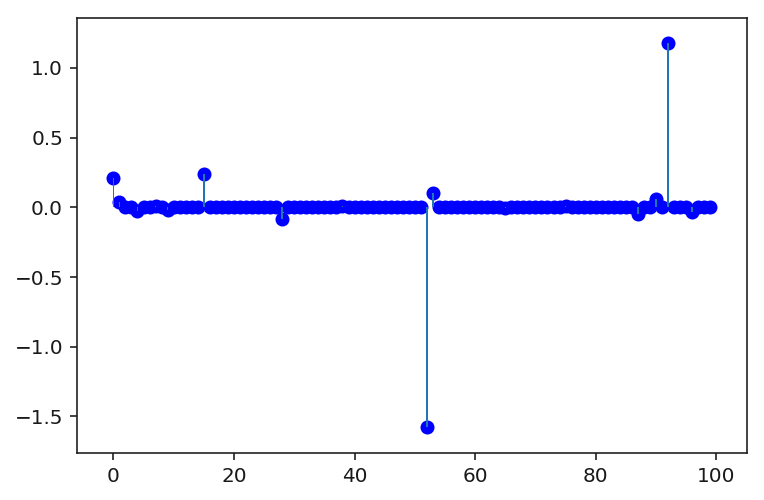

[52  0 28 92  0 92  0 28 28 52 90 53 52 90 53 28 52 92 90]
[28]


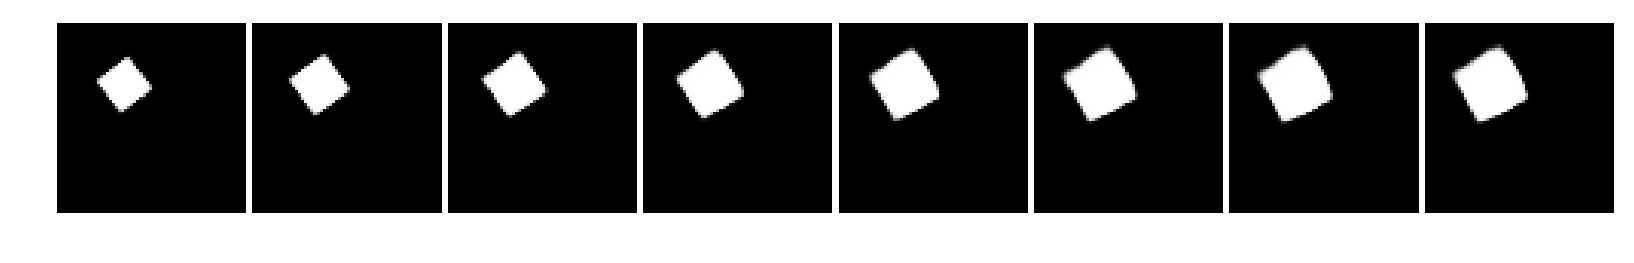

In [215]:
# test
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[24][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.3, threshold=0.05,
                          plot_all=False, 
                          plot_list=[28],
                          n_indices=19)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


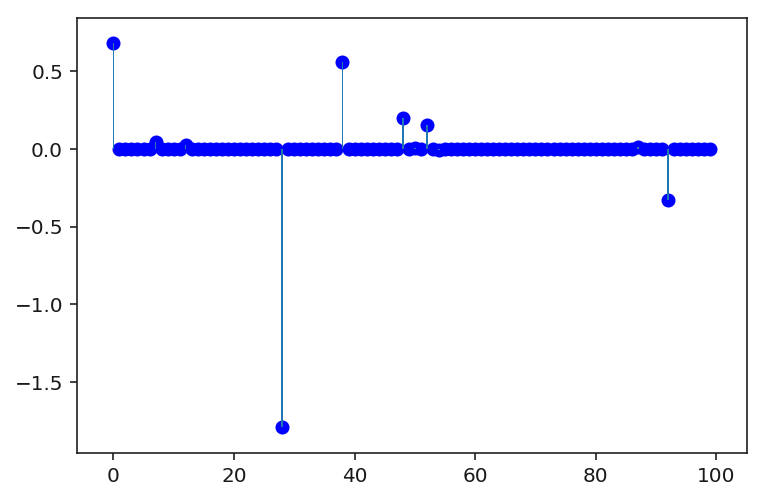

[38 48 52 52  0 52 28 48 92 48 38 38 52  0 92 48  0 48 92]
[0]


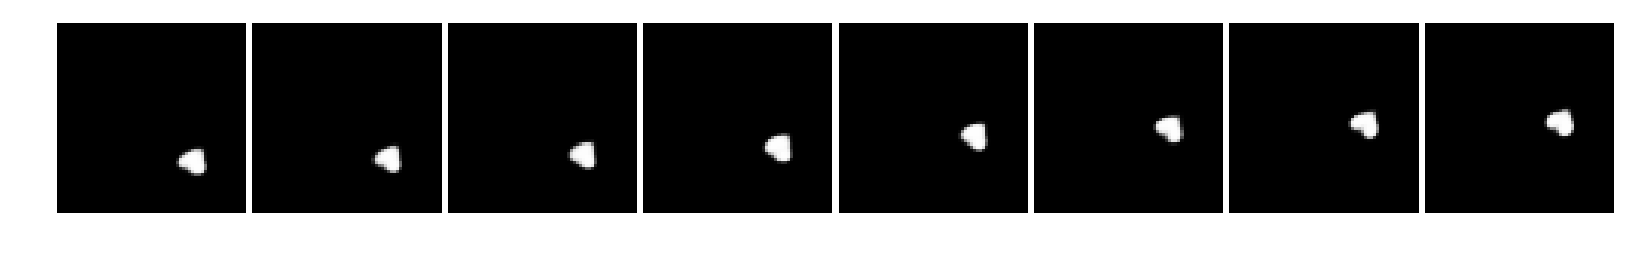

In [223]:
# test
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[6][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.2, threshold=0.05,
                          plot_all=False, 
                          plot_list=[0],
                          n_indices=19)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


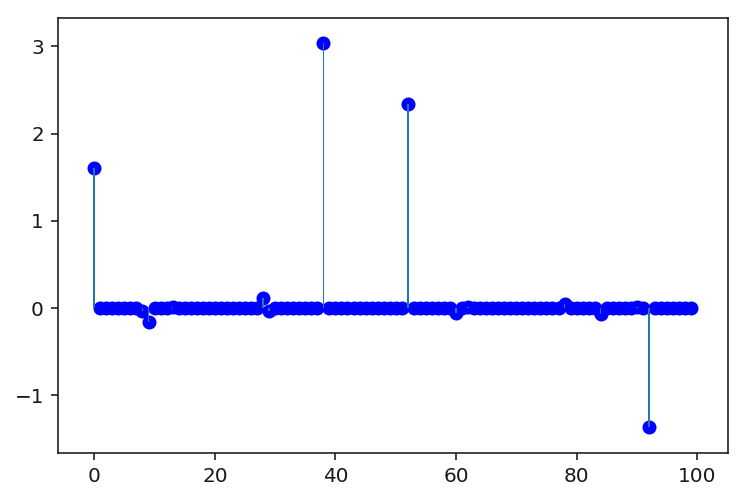

[84 52  9 60  0  0  0 28 84 84 38 28 28 52 60 28 84 38  9]
[0]


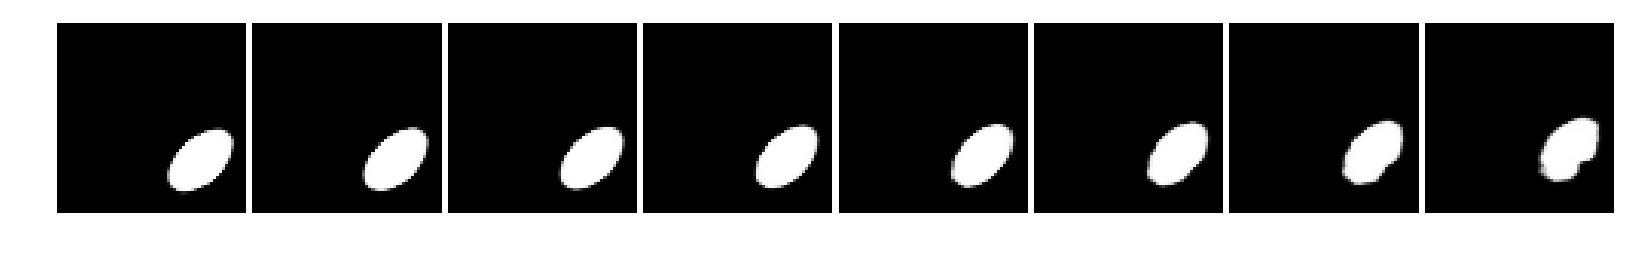

In [229]:
# test
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[7][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.2, threshold=0.05,
                          plot_all=False, 
                          plot_list=[0],
                          n_indices=19)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


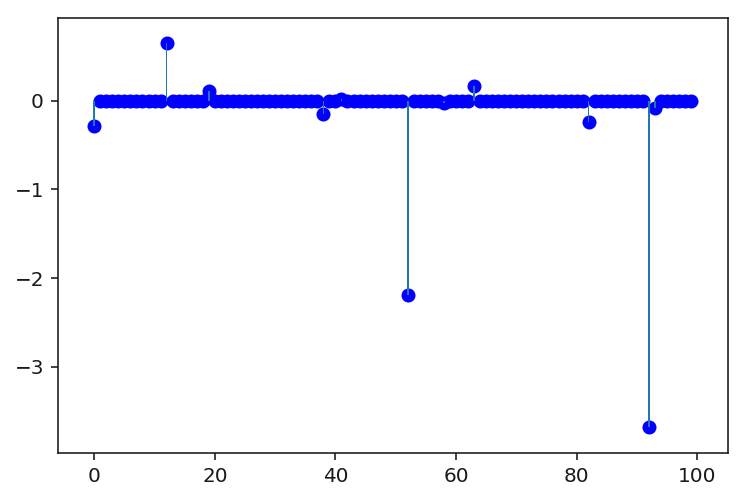

[63  0 93 19 12 63 93 93  0 12 82 93 38 82 12 93 12 12 52]
[52]


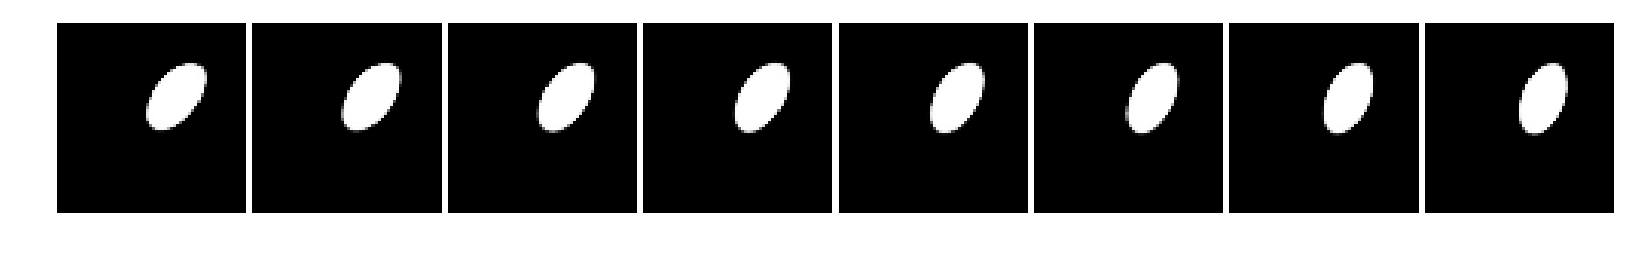

In [248]:
# test
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[3][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.2, threshold=0.05,
                          plot_all=False, 
                          plot_list=[52],
                          n_indices=19);

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


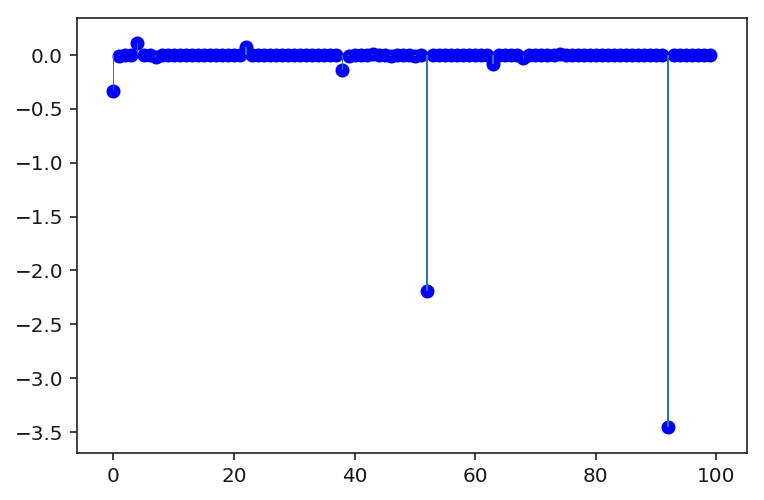

[ 4 52 92  0 63 63  4 38 38 38 92 92 92  4 63 92 52  0 38]
[0, 4, 22, 38, 52, 63, 92]


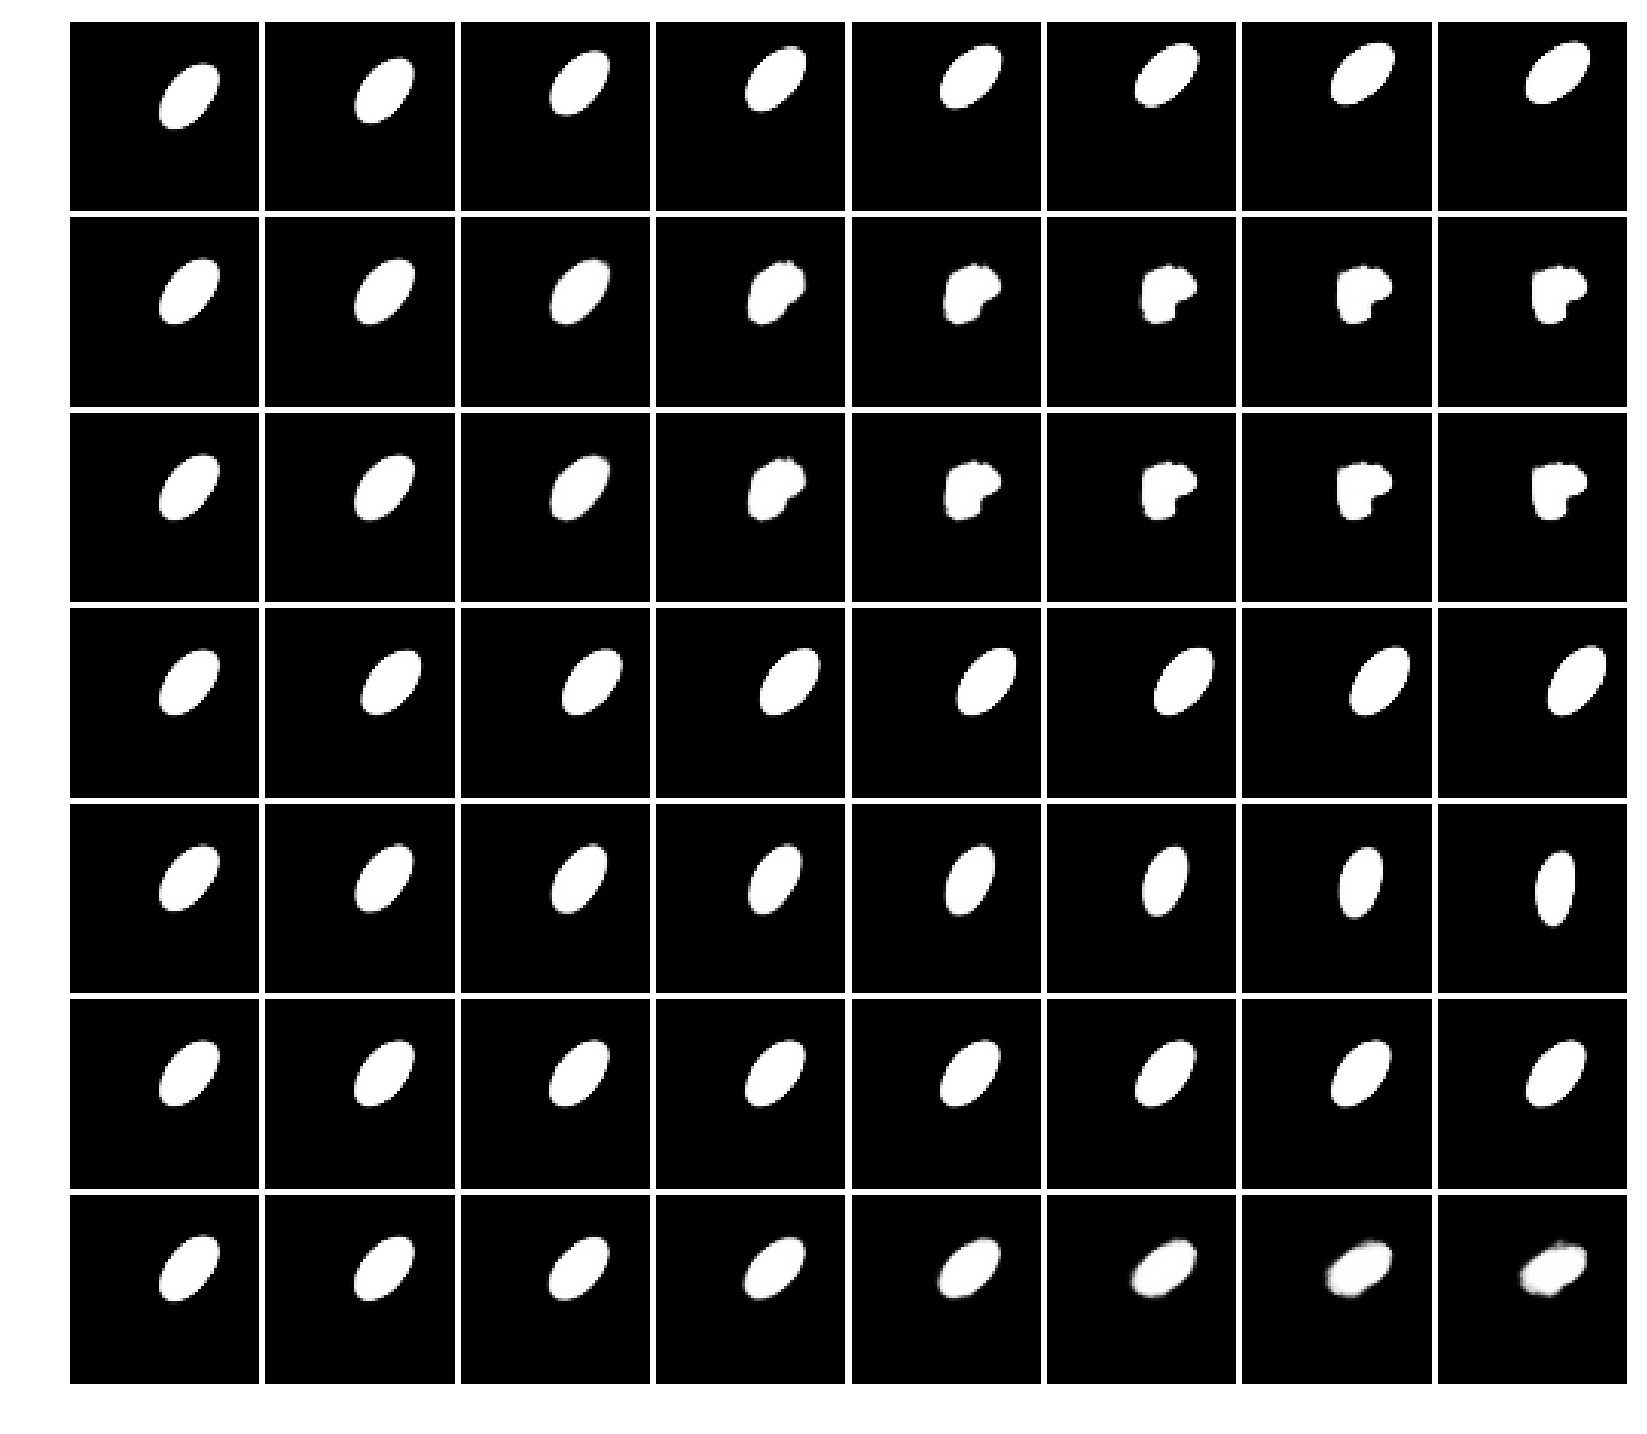

In [247]:
# test
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[3][None,:], convvsc, 
                          latent_sz=100, length=8, 
                          delta=0.3, threshold=0.05,
                          plot_all=True, 
                          plot_list=None,
                          n_indices=19);

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


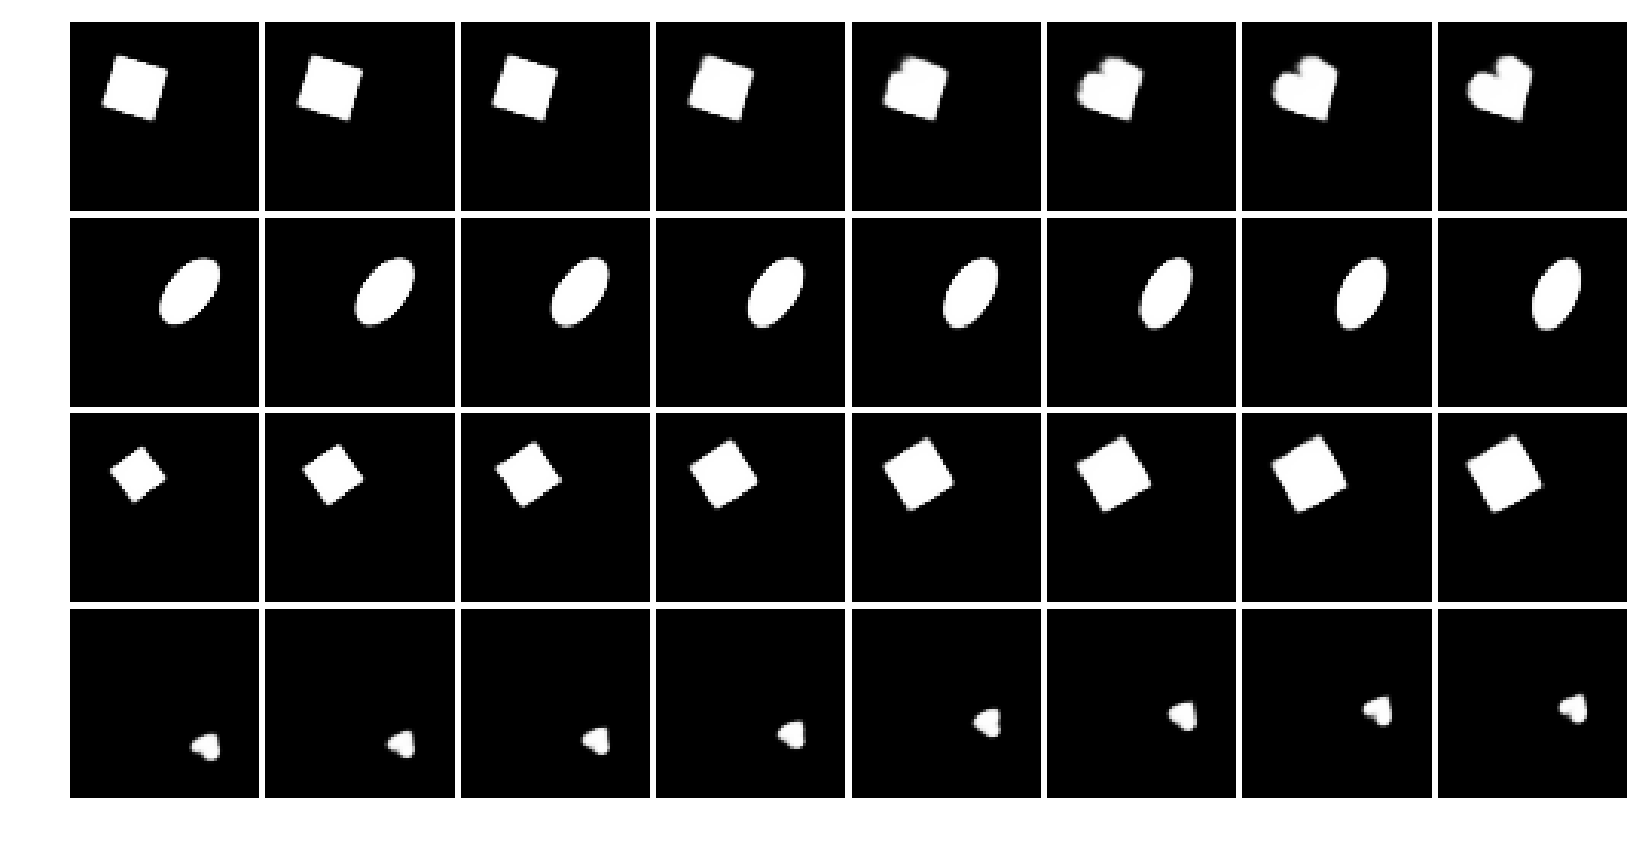

In [249]:
# 9 epochs
traversals = np.concatenate([
    plot_horizontal_traversal(images[img_idx][None,:], convvsc, 
                          100, length=8, 
                          delta=delta, threshold=0.01,
                          plot_all=False, 
                          plot_list=[dim],
                          n_indices=19, plot=False)
    for img_idx, delta, dim in [
        (14, 0.2, 34),
        (3, 0.2, 52),
        (24, 0.3, 28),
        (6, 0.2, 0)
    ]
])

plt.figure(figsize=(14,24))
plt.axis('off')
plt.imshow(traversals)
plt.show()

# ConvVAE

In [29]:
%%time
from src.models.conv_vae import ConvolutionalVariationalAutoEncoder

model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 10,
    'learning_rate': 3e-4,
    
    'beta': 4,
    'beta_delta': 0,
    
    'device': 'cpu',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvae = ConvolutionalVariationalAutoEncoder(**model_params)

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 450 ms


In [34]:
import torch
convvae.model.load_state_dict(torch.load(
    'results/checkpoints/ConvVAE_dsprites_1_90_10_0-0003_90.pth', 
    map_location='cpu'))

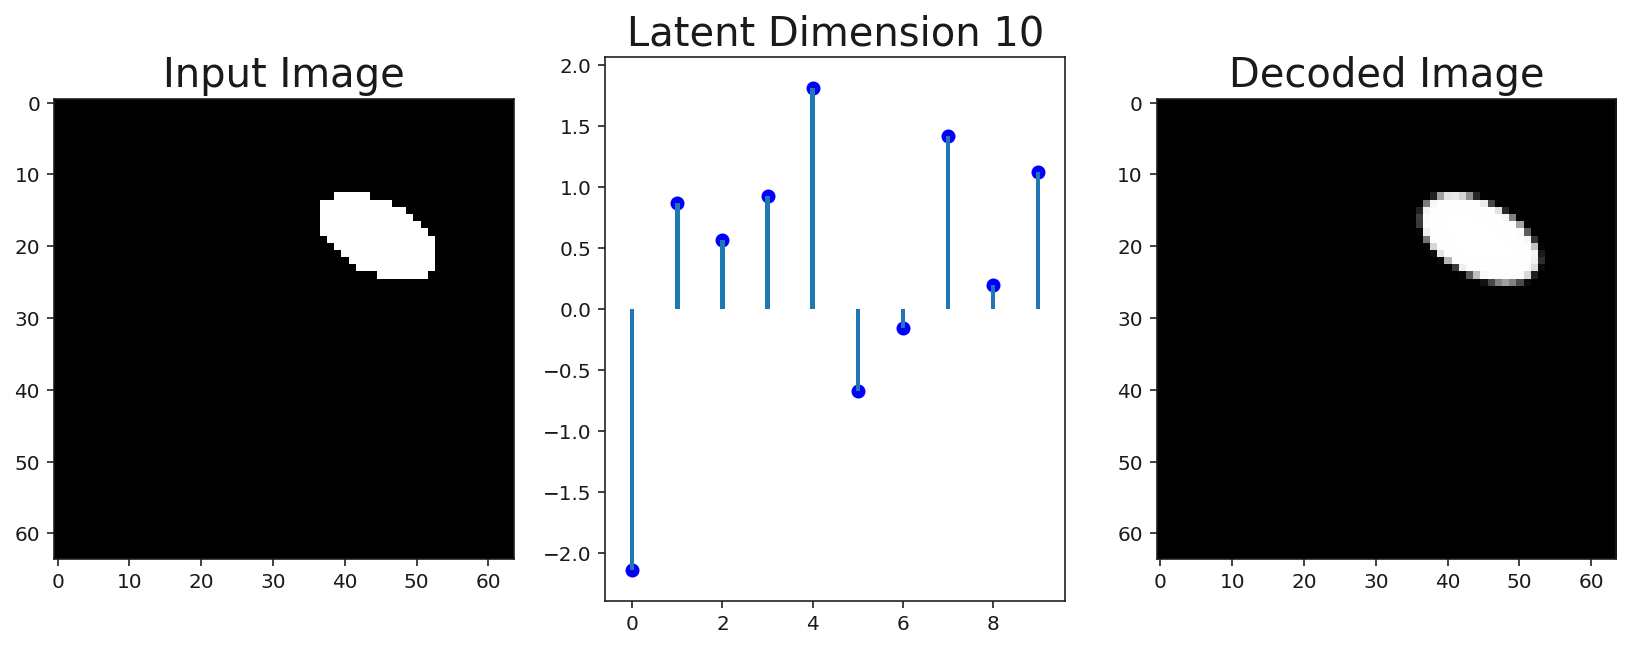

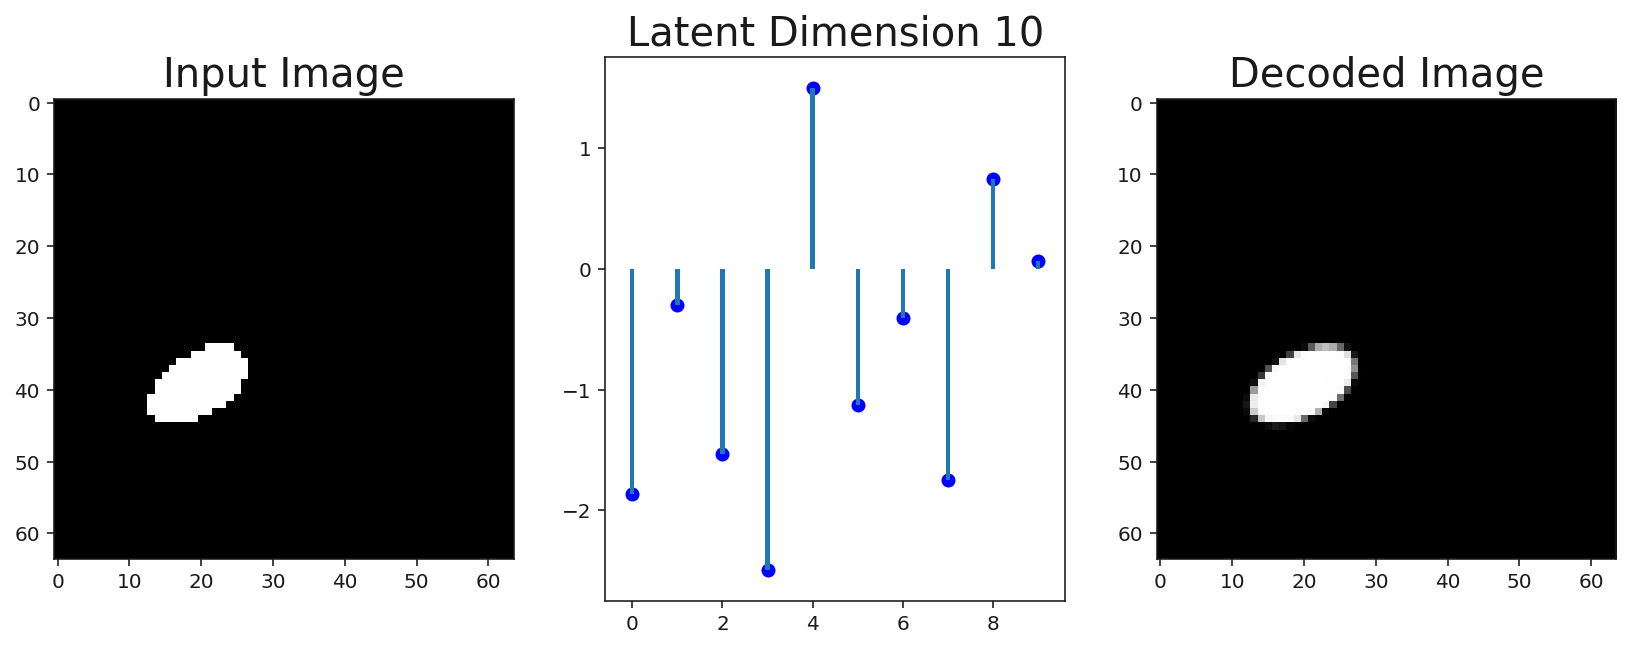

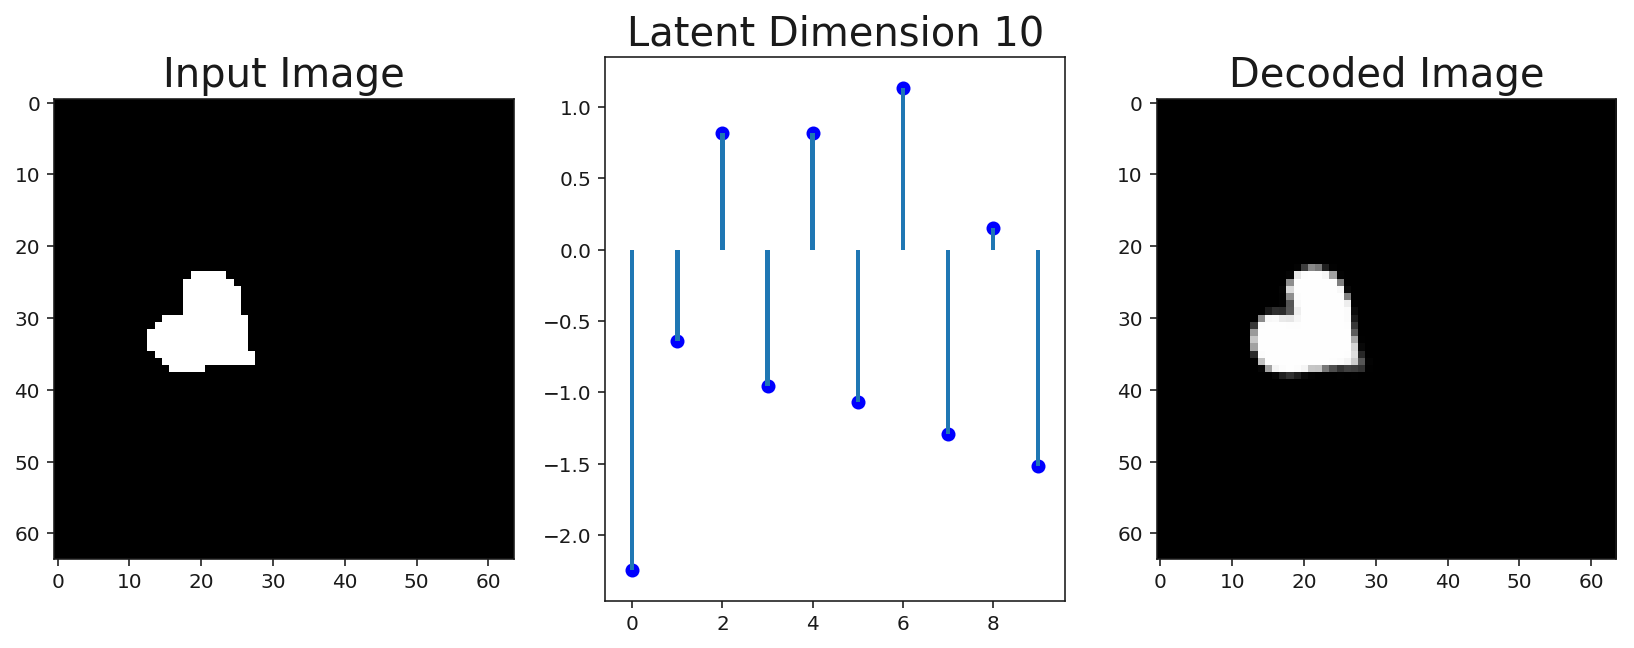

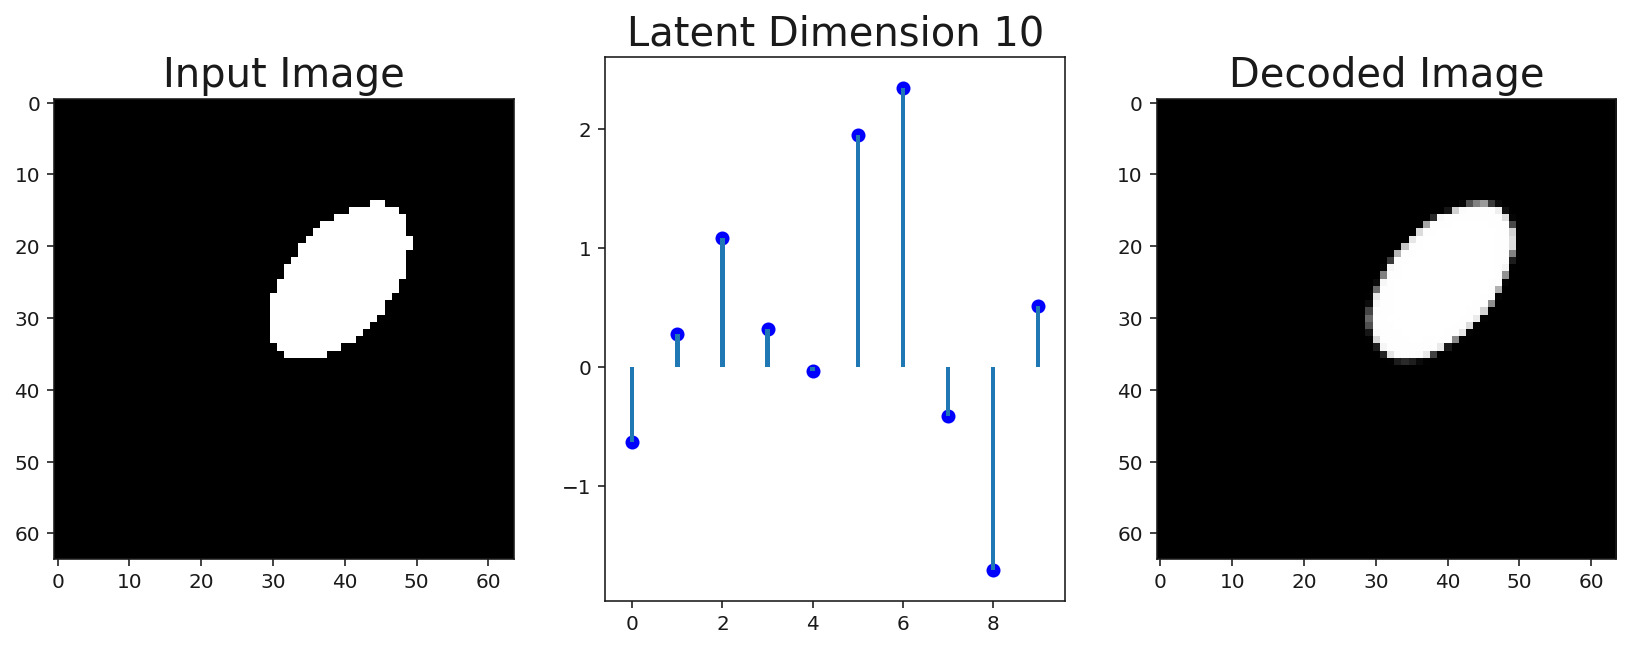

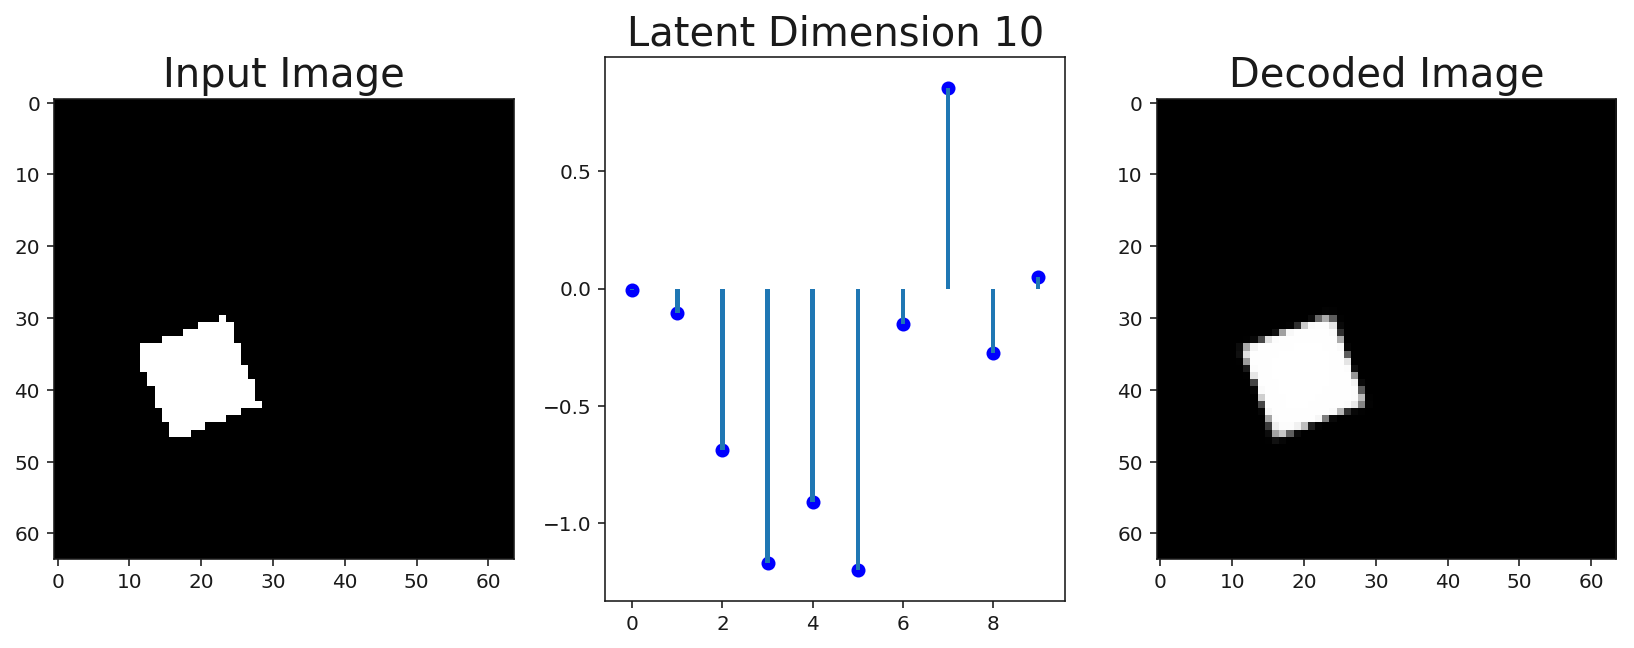

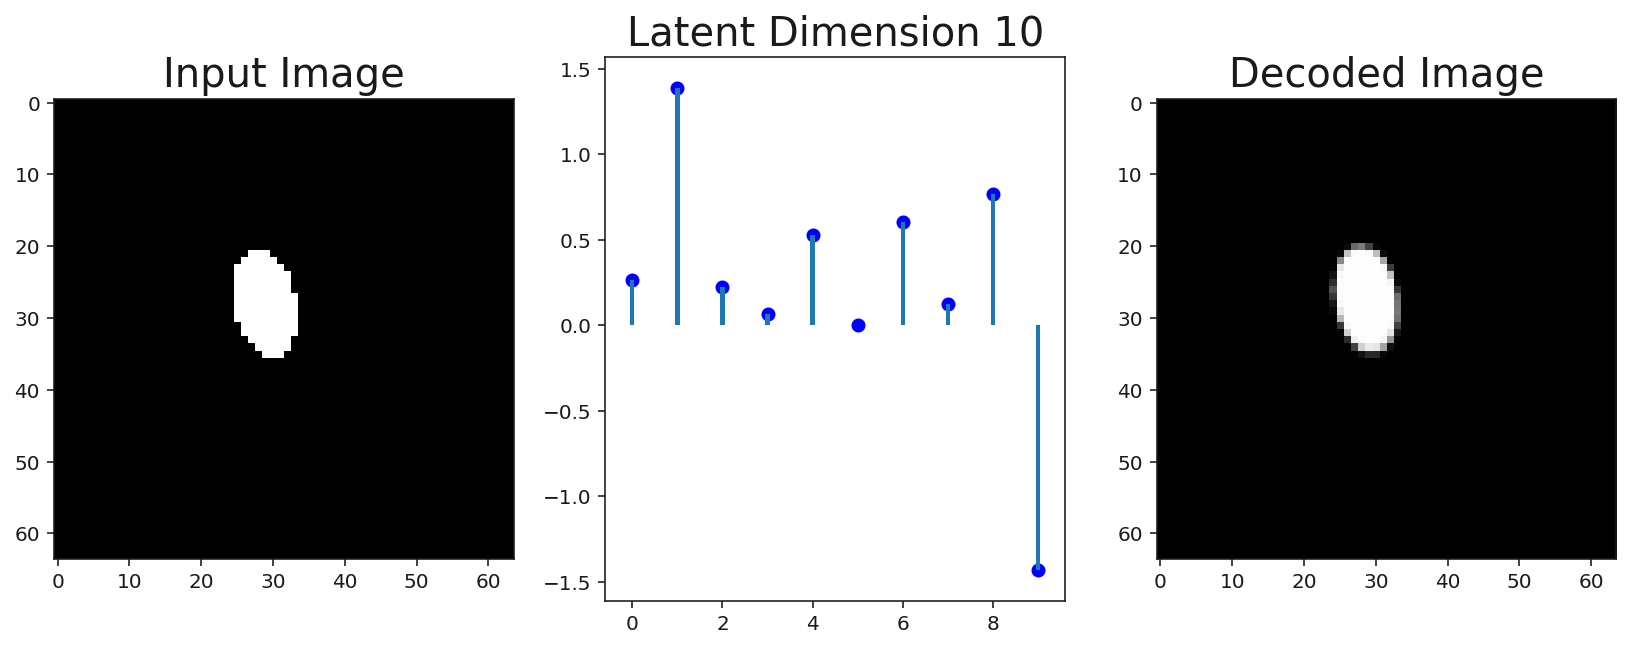

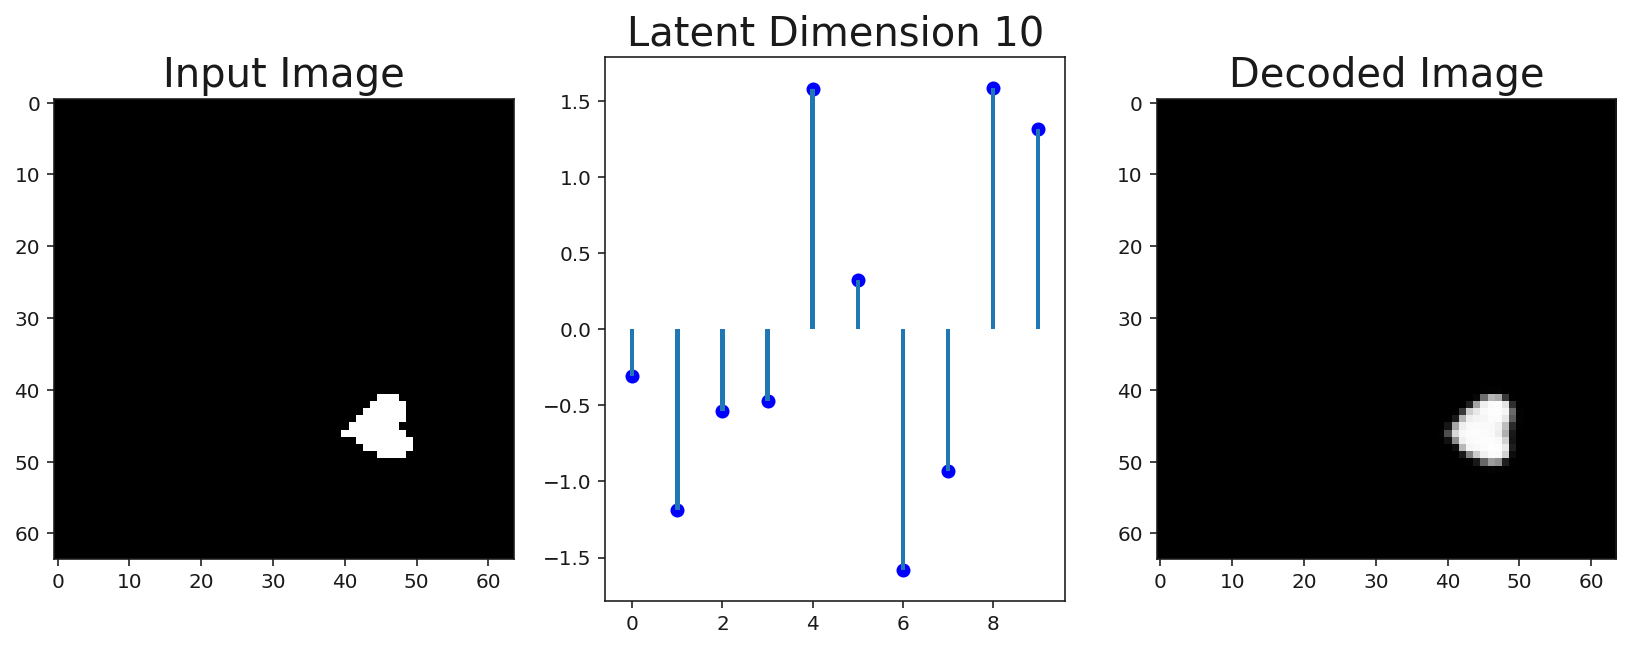

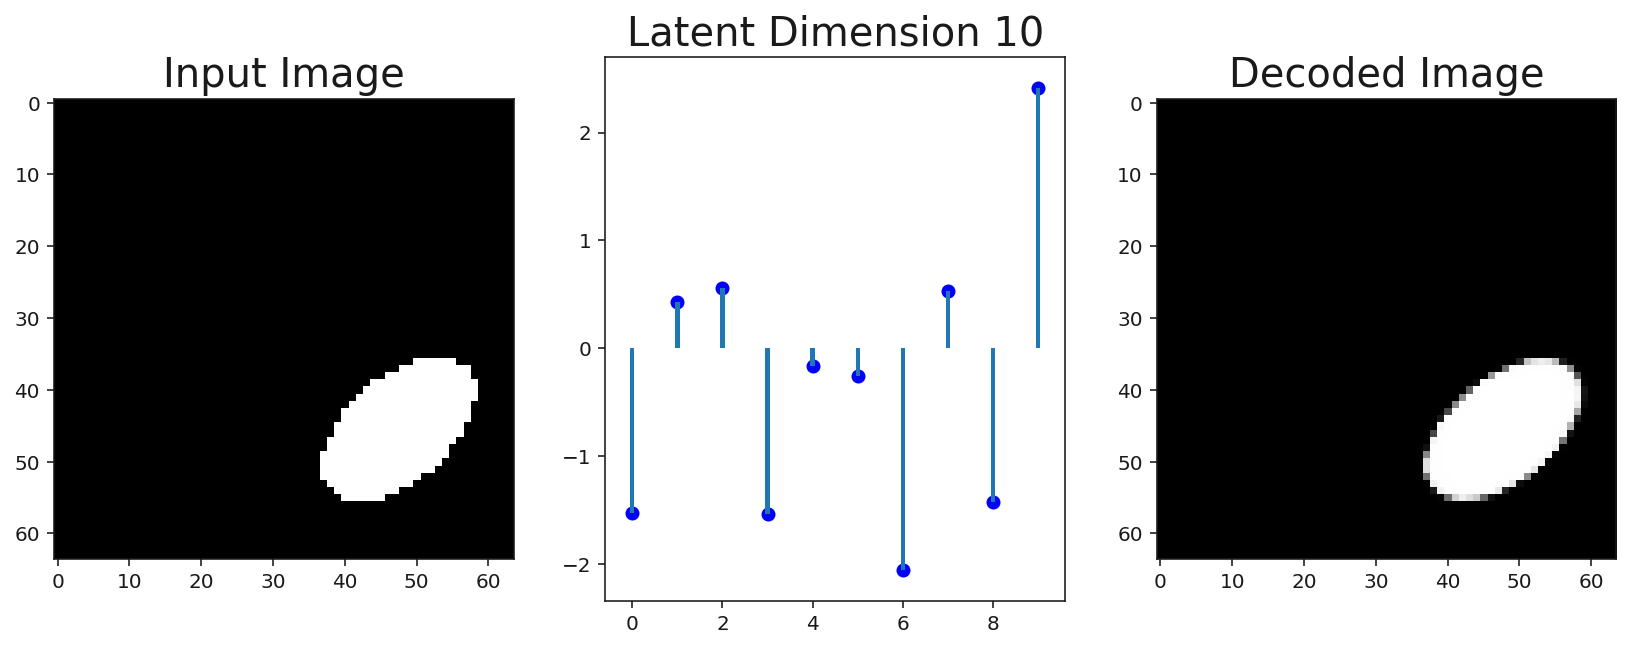

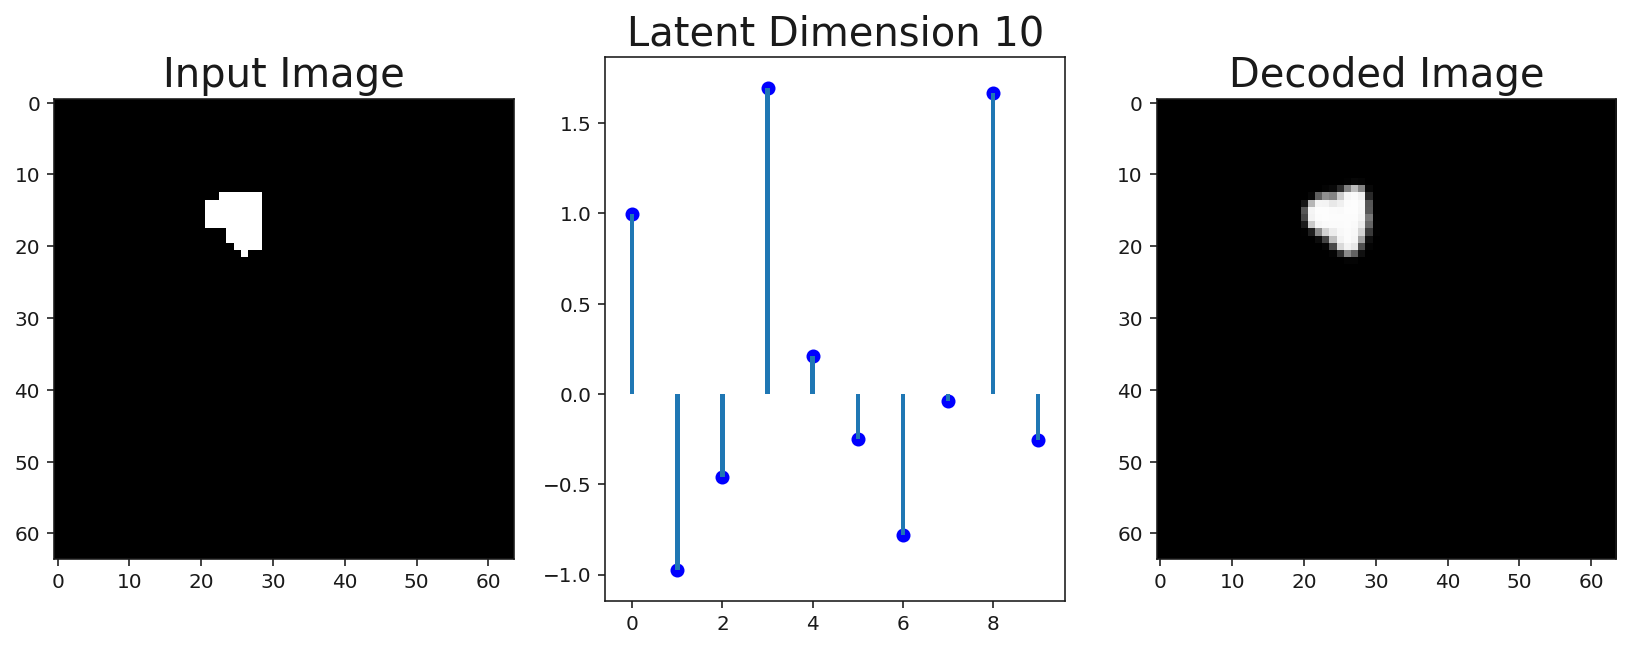

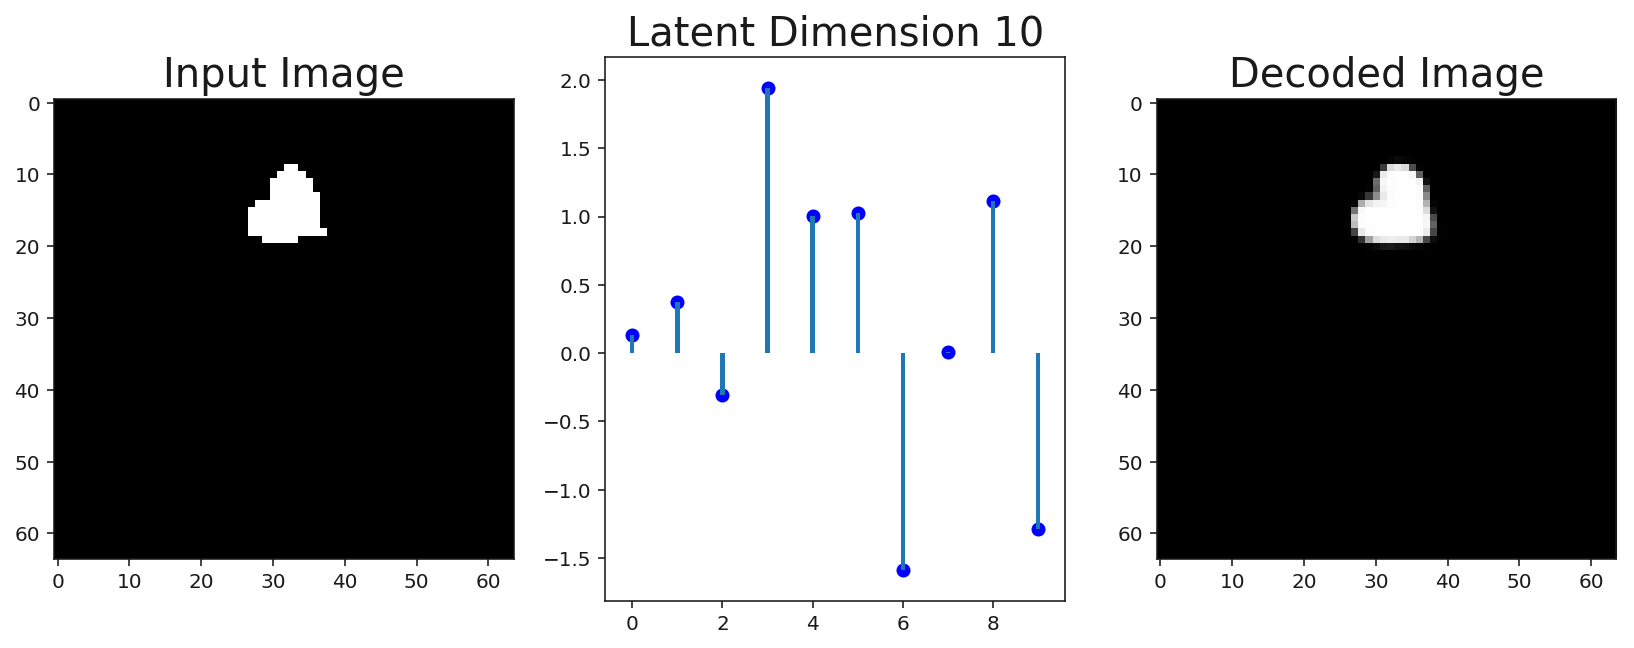

In [114]:
from src.plots import plot_encoding
for i in range(10):
    plot_encoding(images[i][None,:], convvae, 
                  model_params['latent_sz'], width=1/10)

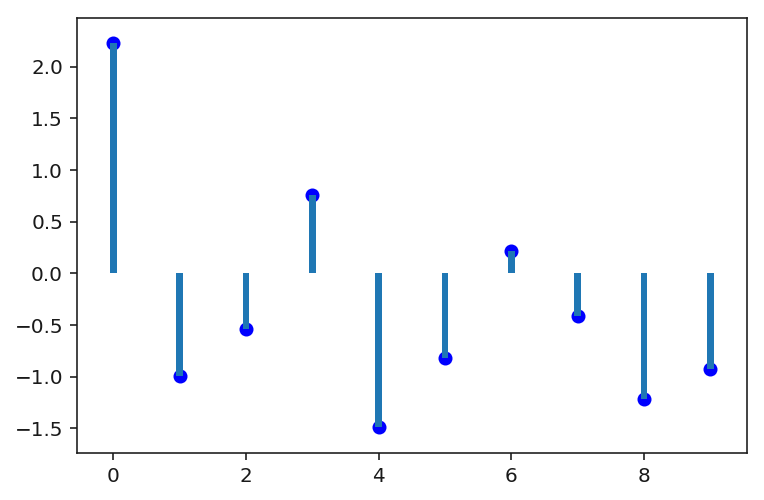

[7 4 7 7 4 5 8 7 1 1 7 4 4 3 0 8 1 1 3]
[8]


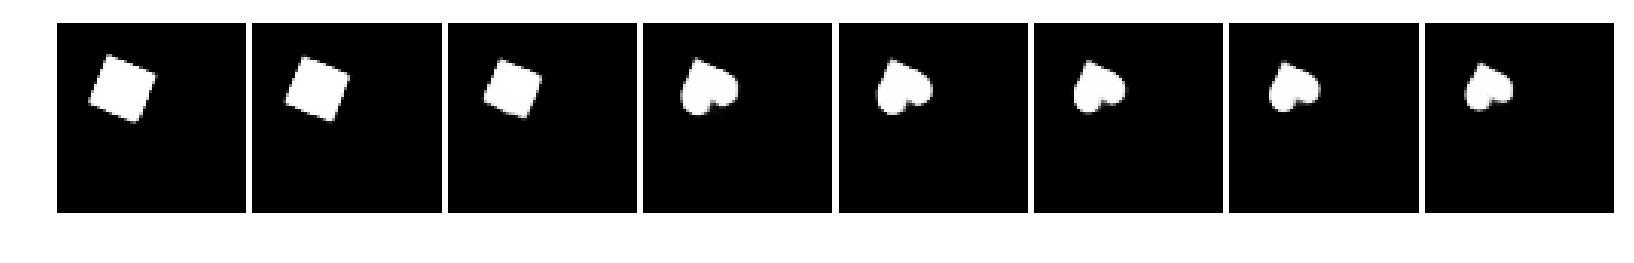

In [255]:
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[14][None,:], convvae, 
                          model_params['latent_sz'], length=8, 
                          delta=0.17, threshold=0.01,
                          plot_all=False, 
                          plot_list=[8],
                          n_indices=19, width=1/10);

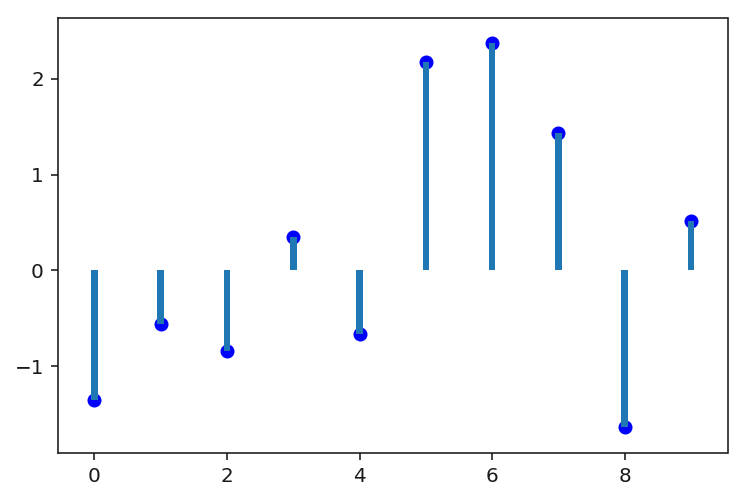

[9 1 4 1 4 1 4 6 8 9 0 8 8 1 5 2 5 1 1]
[5]


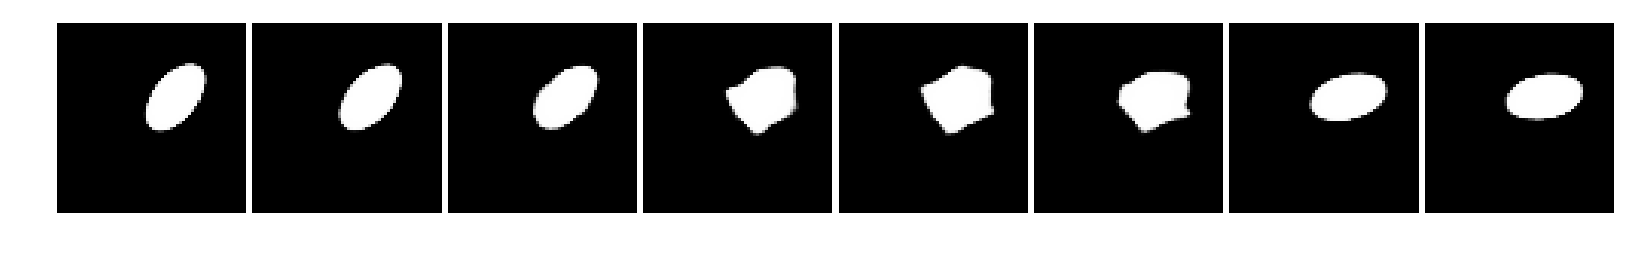

In [257]:
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[3][None,:], convvae, 
                          model_params['latent_sz'], length=8, 
                          delta=0.3, threshold=0.01,
                          plot_all=False, 
                          plot_list=[5],
                          n_indices=19, width=1/10);

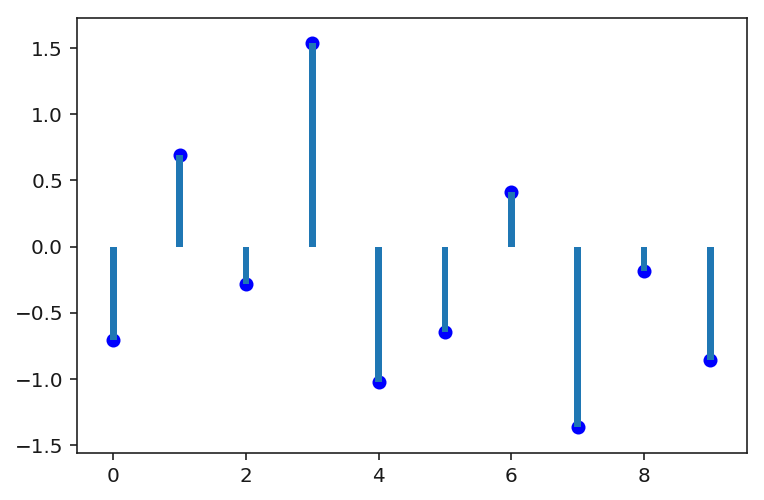

[0 4 5 3 5 9 8 8 8 9 4 2 6 1 4 8 5 3 6]
[9]


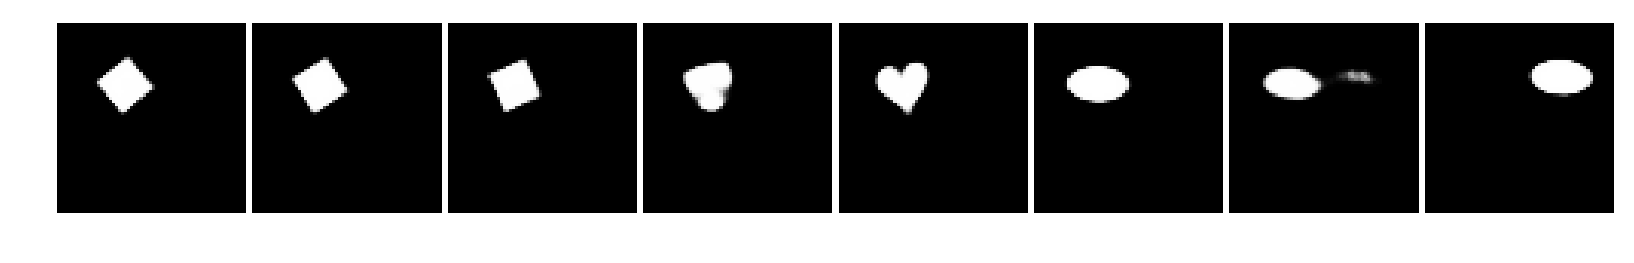

In [260]:
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[24][None,:], convvae, 
                          model_params['latent_sz'], length=8, 
                          delta=0.3, threshold=0.01,
                          plot_all=False, 
                          plot_list=[9],
                          n_indices=19, width=1/10);

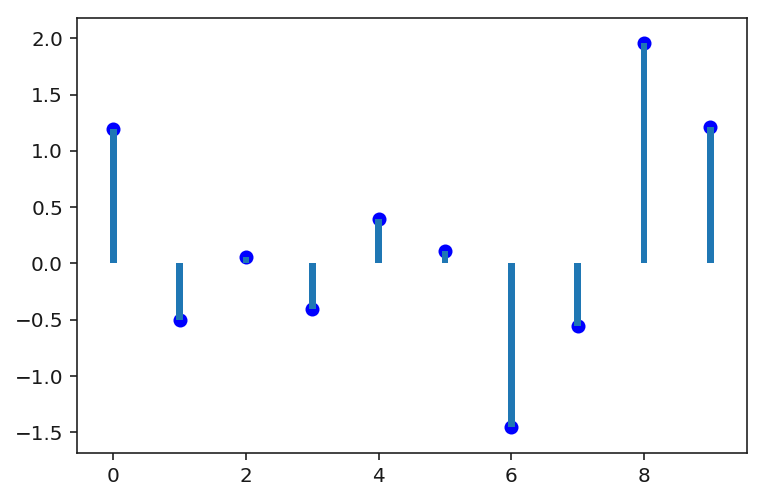

[7 4 3 5 3 4 9 9 4 9 2 7 0 4 1 0 8 9 7]
[3]


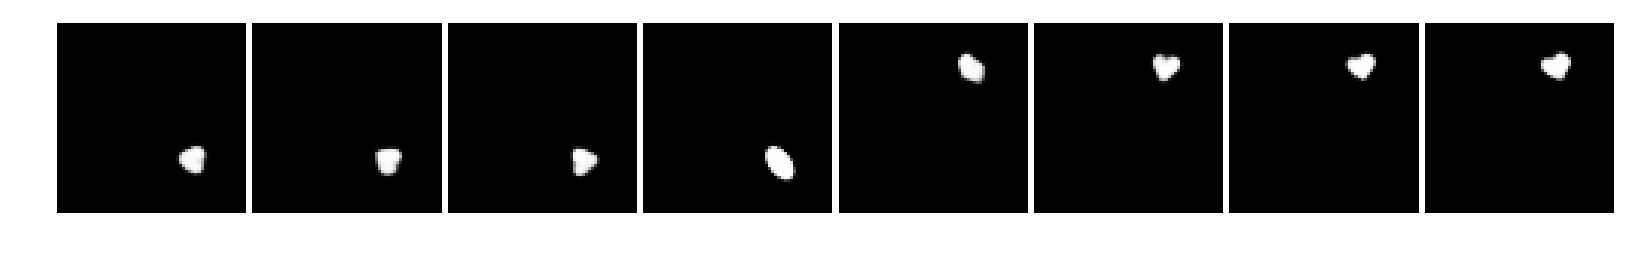

In [264]:
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[6][None,:], convvae, 
                          model_params['latent_sz'], length=8, 
                          delta=0.4, threshold=0.01,
                          plot_all=False, 
                          plot_list=[3],
                          n_indices=19, width=1/10);

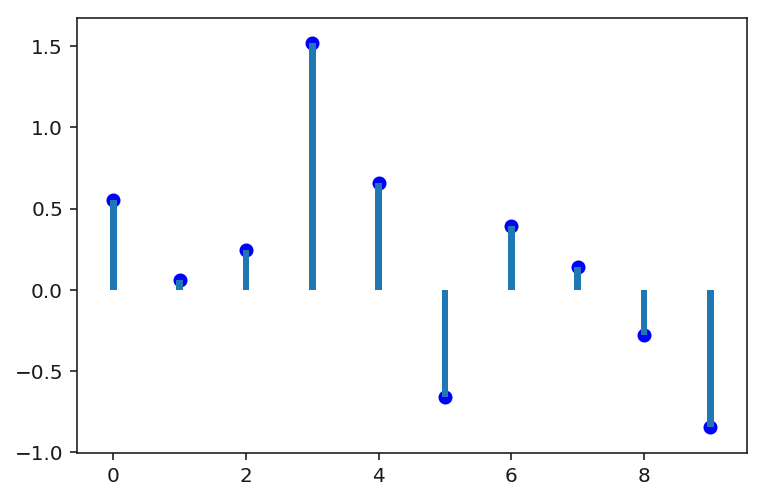

[1 5 7 2 2 7 7 0 2 2 3 1 5 8 4 7 6 9 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


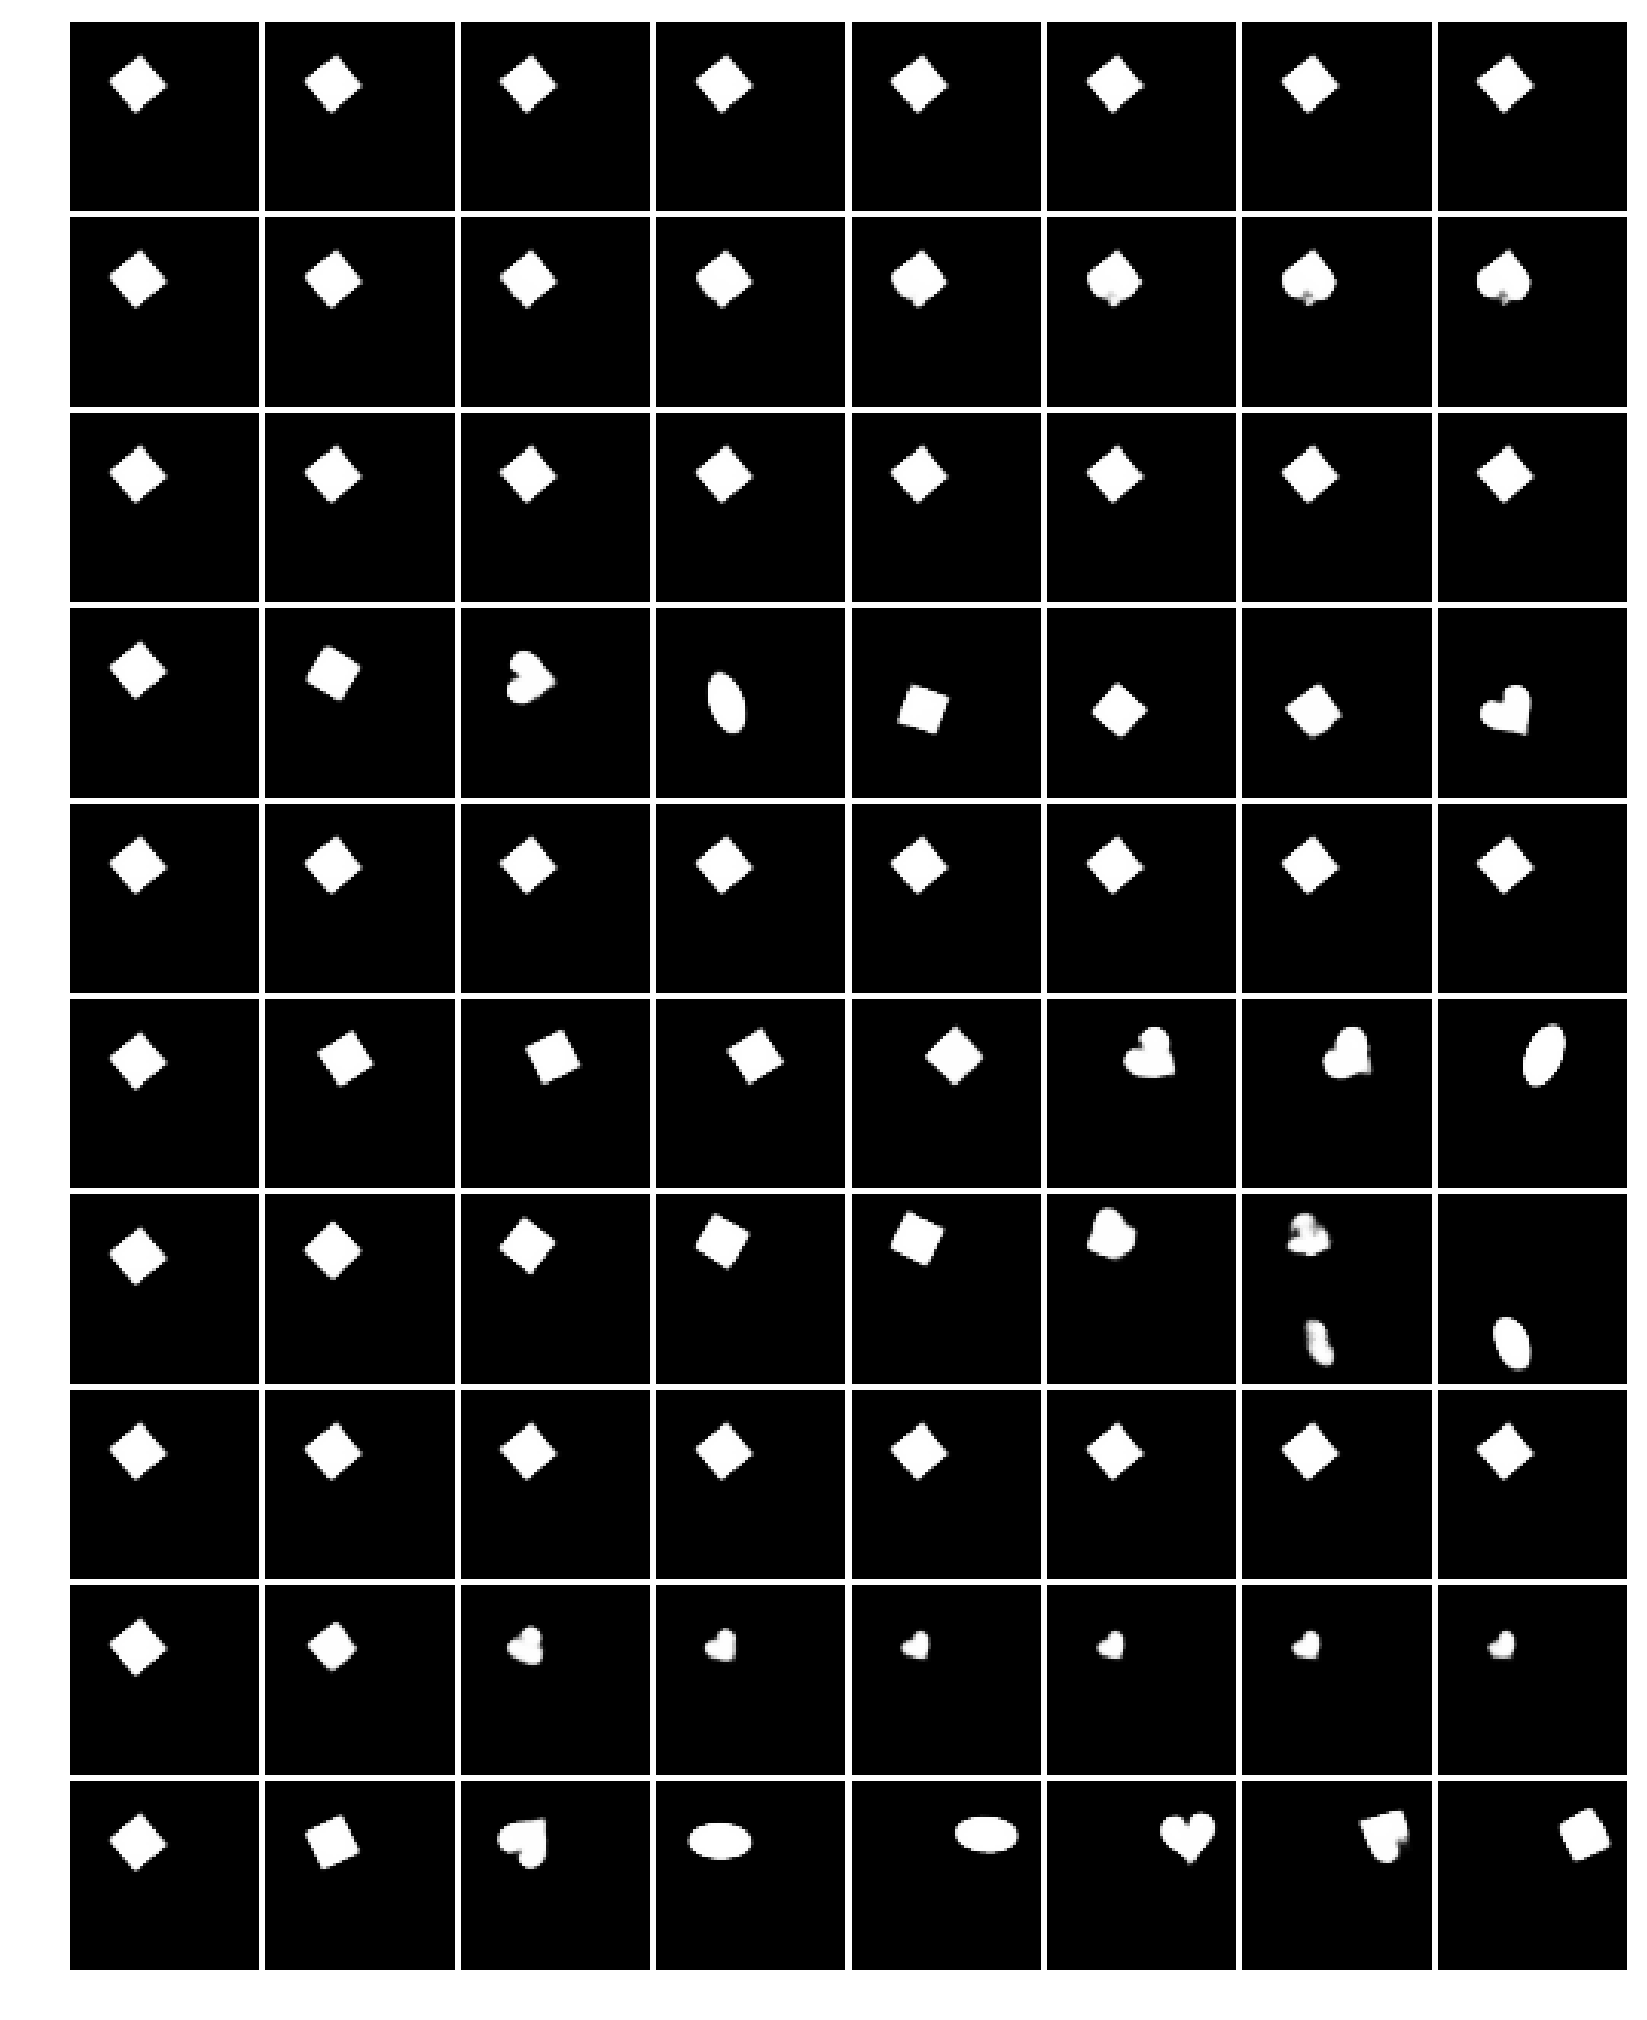

In [266]:
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[24][None,:], convvae, 
                          model_params['latent_sz'], length=8, 
                          delta=0.5, threshold=0.01,
                          plot_all=True, 
                          plot_list=None,
                          n_indices=19, width=1/10);

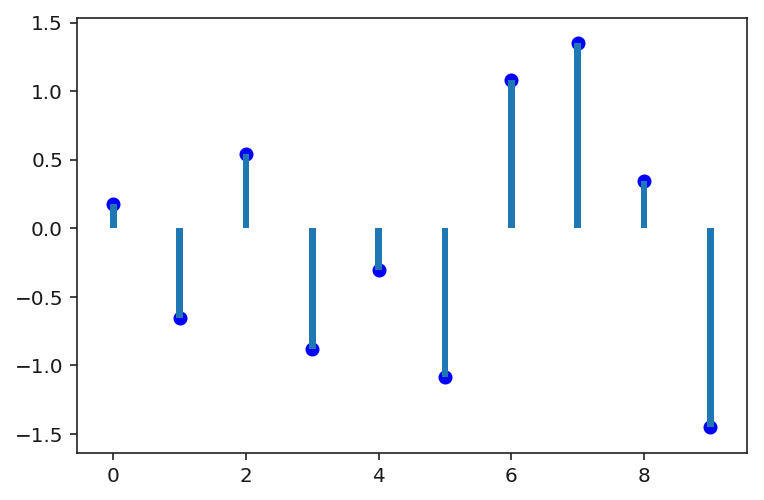

[3 5 5 3 8 8 9 9 7 8 2 8 1 5 0 1 3 9 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


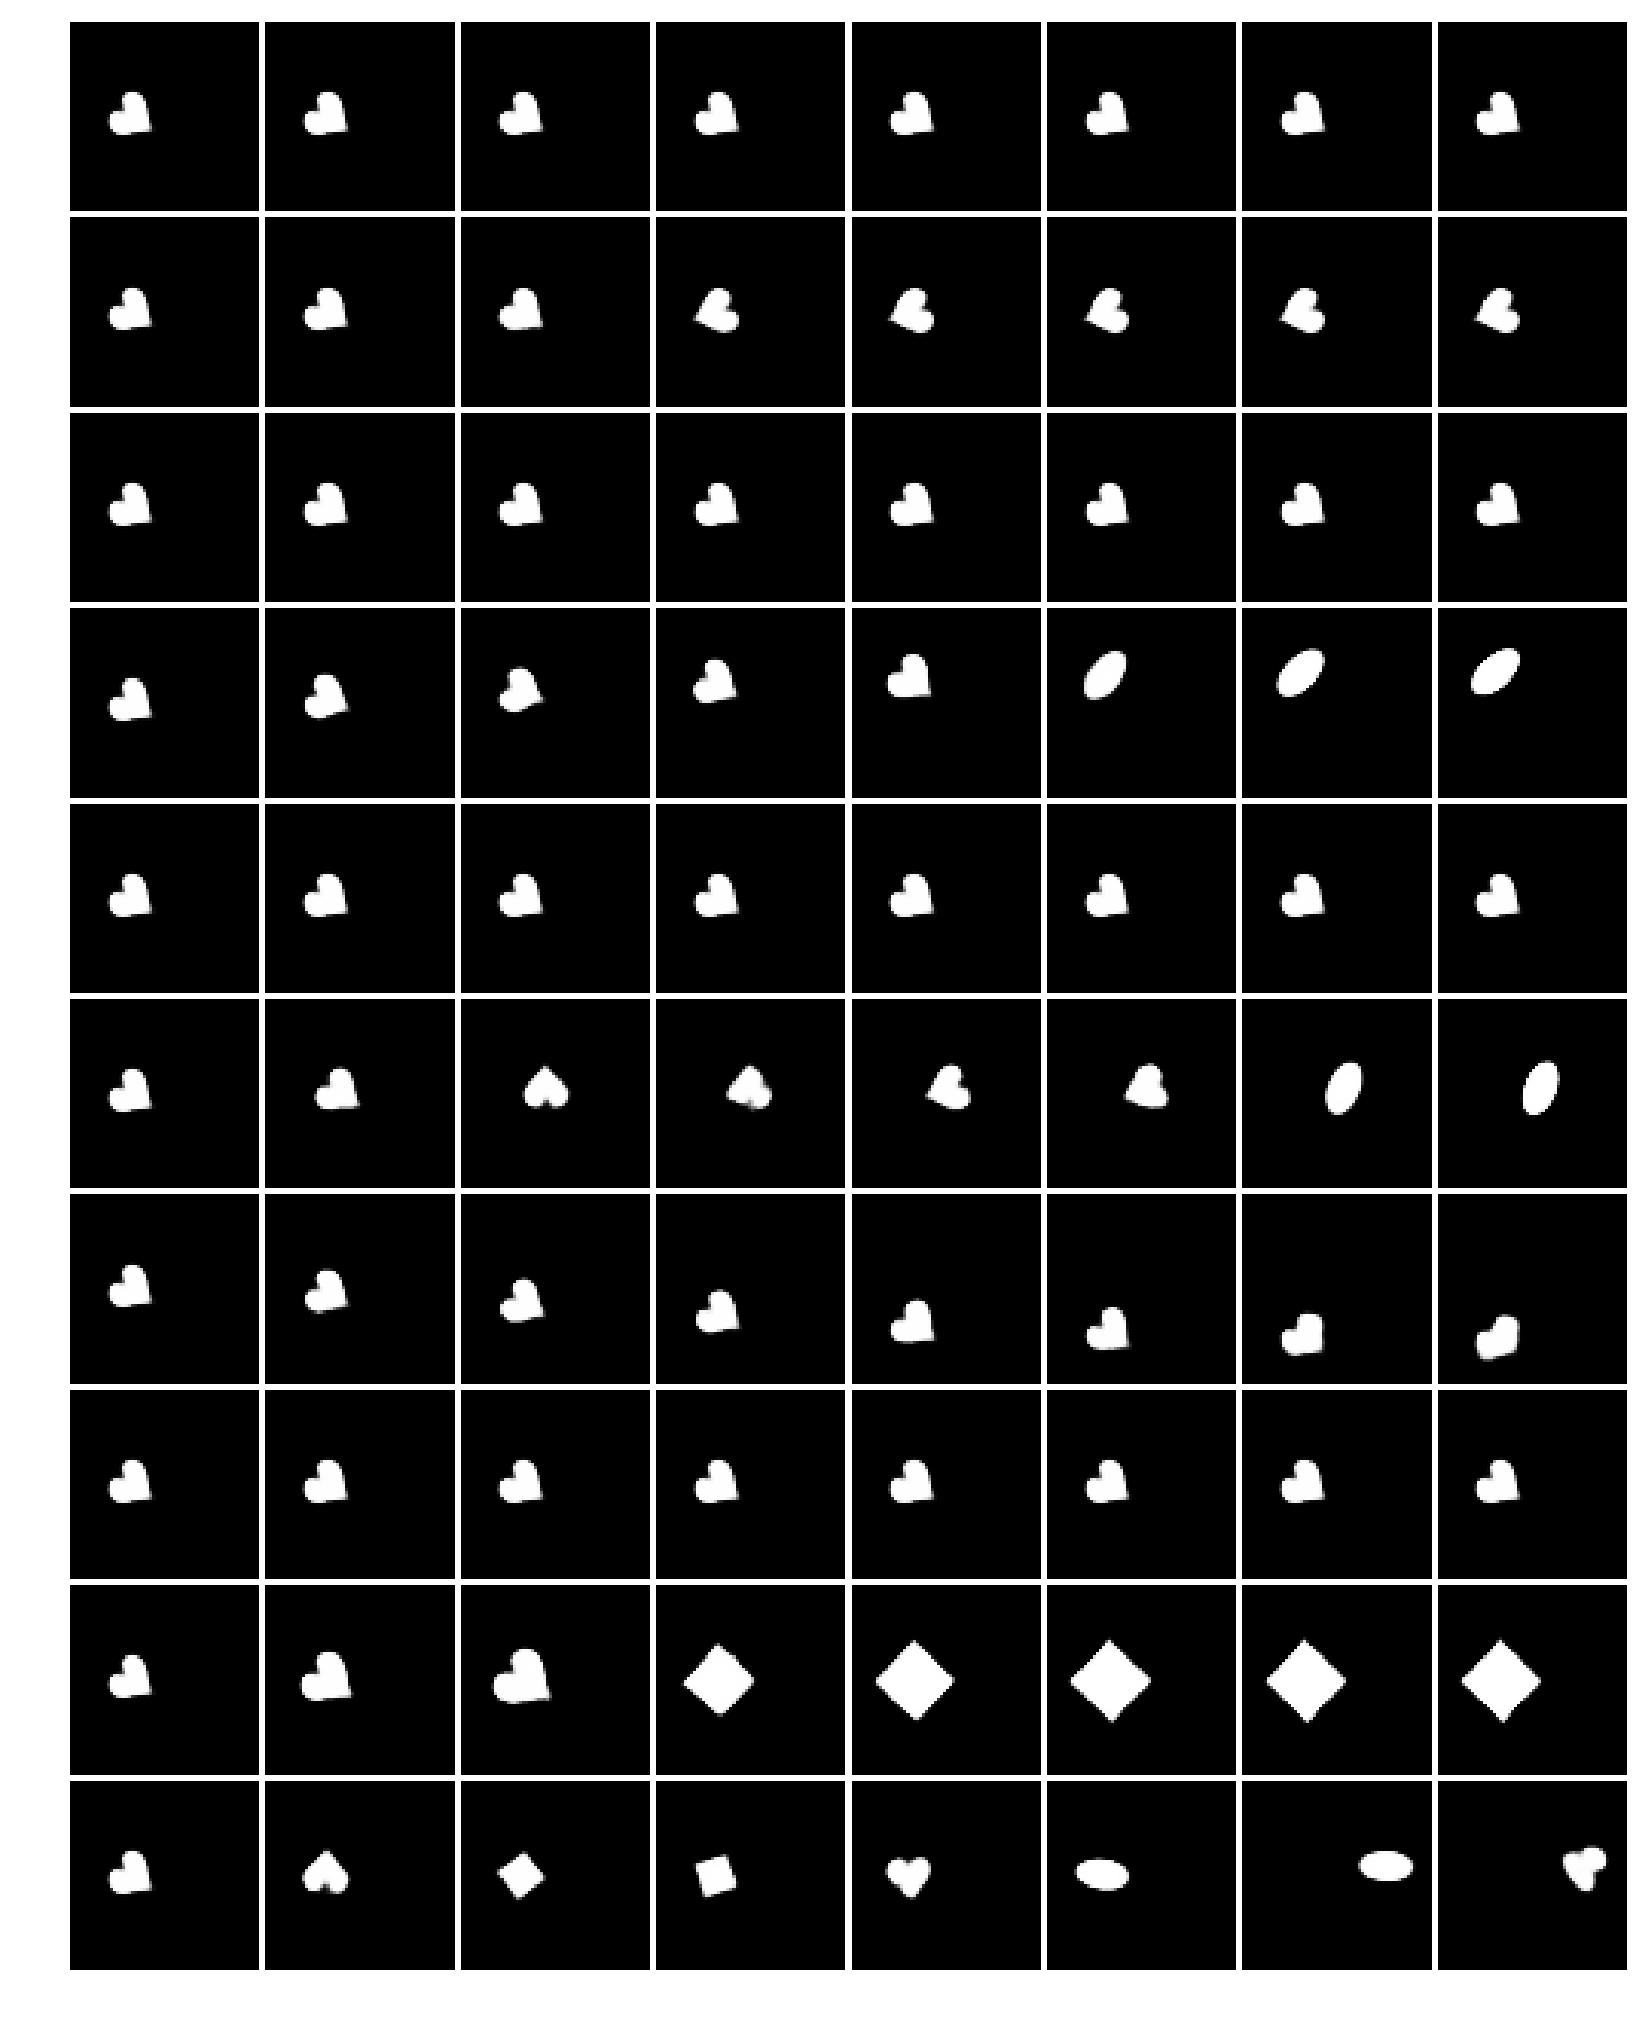

In [157]:
from src.plots import plot_horizontal_traversal
plot_horizontal_traversal(images[2][None,:], convvae, 
                          model_params['latent_sz'], length=8, 
                          delta=0.5, threshold=0.01,
                          plot_all=True, 
                          plot_list=None,
                          n_indices=19, width=1/10)

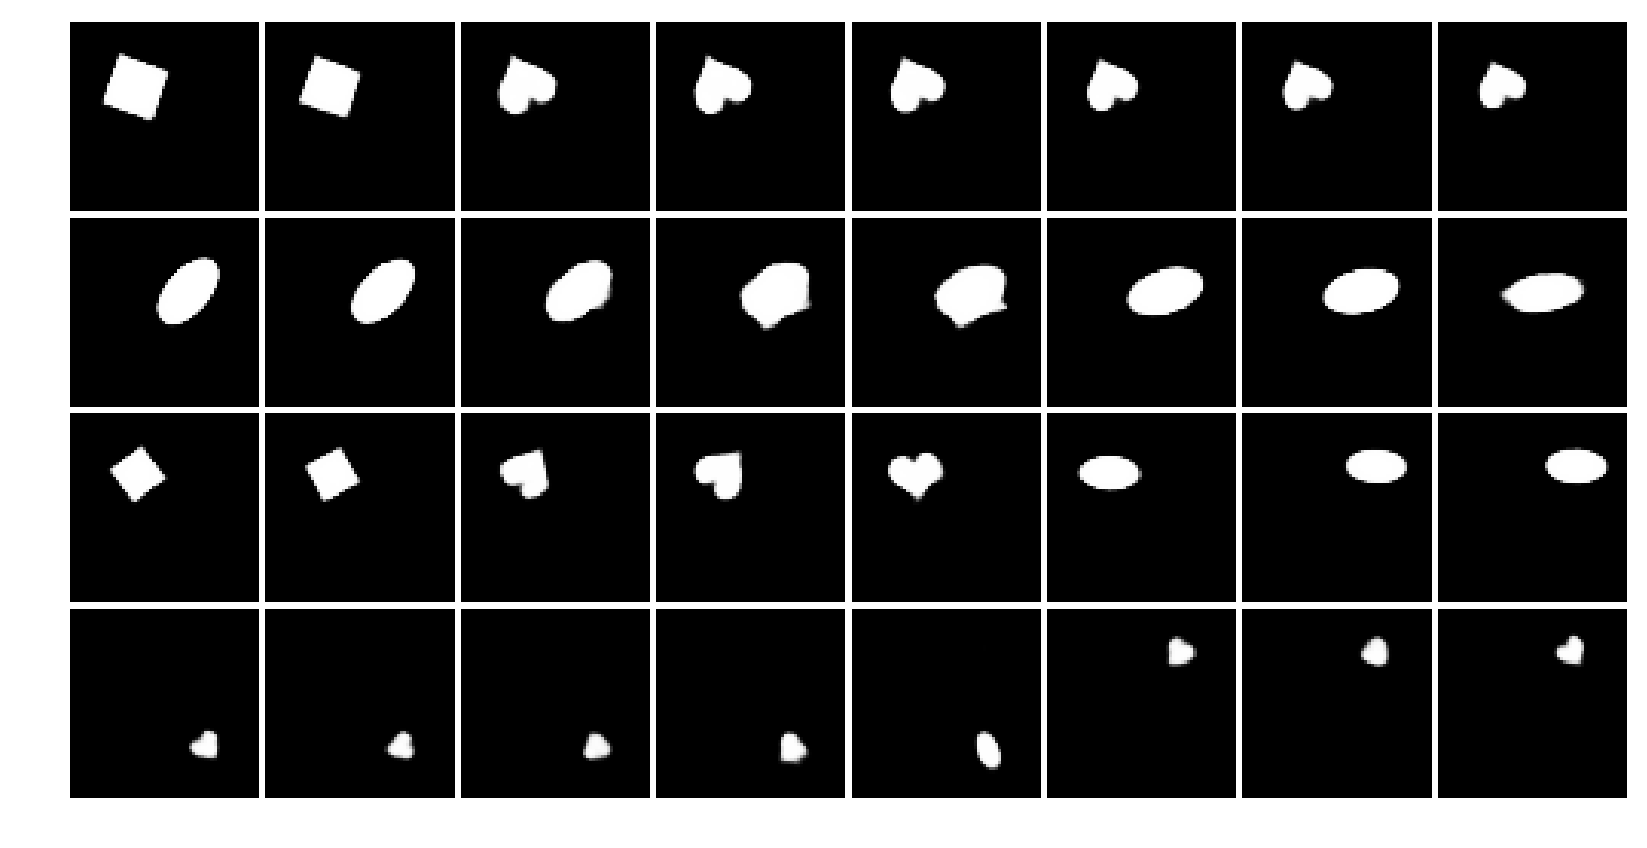

In [276]:
# 9 epochs
traversals = np.concatenate([
    plot_horizontal_traversal(images[img_idx][None,:], convvae, 
                          10, length=8, 
                          delta=delta, threshold=0.01,
                          plot_all=False, 
                          plot_list=[dim],
                          n_indices=19, plot=False)
    for img_idx, delta, dim in [
        (14, 0.17, 8),
        (3, 0.3, 5),
        (24, 0.3, 9),
        (6, 0.4, 3)
    ]
])

plt.figure(figsize=(14,24))
plt.axis('off')
plt.imshow(traversals)
plt.show()

In [53]:
from tcvae.metric_helpers.loader import load_model_and_dataset

In [105]:
# vae, dataset, cpargs = load_model_and_dataset(
#     'tcvae/test3/checkpt-0000.pth')
# vae.channels = 1
# vae.height = 64
# vae.width = 64

Loading model and dataset.


In [122]:
tcvae, dataset, cpargs = load_model_and_dataset(
    '../beta-tcvae/test4/checkpt-0000.pth')
tcvae.channels = 1
tcvae.height = 64
tcvae.width = 64

Loading model and dataset.


In [97]:
sns.reset_orig()

In [124]:
images.shape

torch.Size([32, 1, 64, 64])

In [150]:
xs, x_params, zs, z_params = tcvae.reconstruct_img(images.to('cuda'))

torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64])


In [151]:
imgs = xs.cpu()
zs = zs.cpu().detach().numpy()

In [155]:
from src.plots import to_numpy

def plot_codes(image, img, z, vae, latent_sz, width=1):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
    
    plot_image(to_numpy(image, vae), ax0, 'Input Image')
    
    ax1.bar(np.arange(latent_sz), height=z, width=width, align='center')
    ax1.scatter(np.arange(latent_sz), z, color='blue')
    ax1.set_title(r"Latent Dimension %d" % \
                  (latent_sz), fontsize=20)
    
    plot_image(to_numpy(img, vae), ax2, 'Decoded Image')
    plt.subplots_adjust(hspace=0.5)

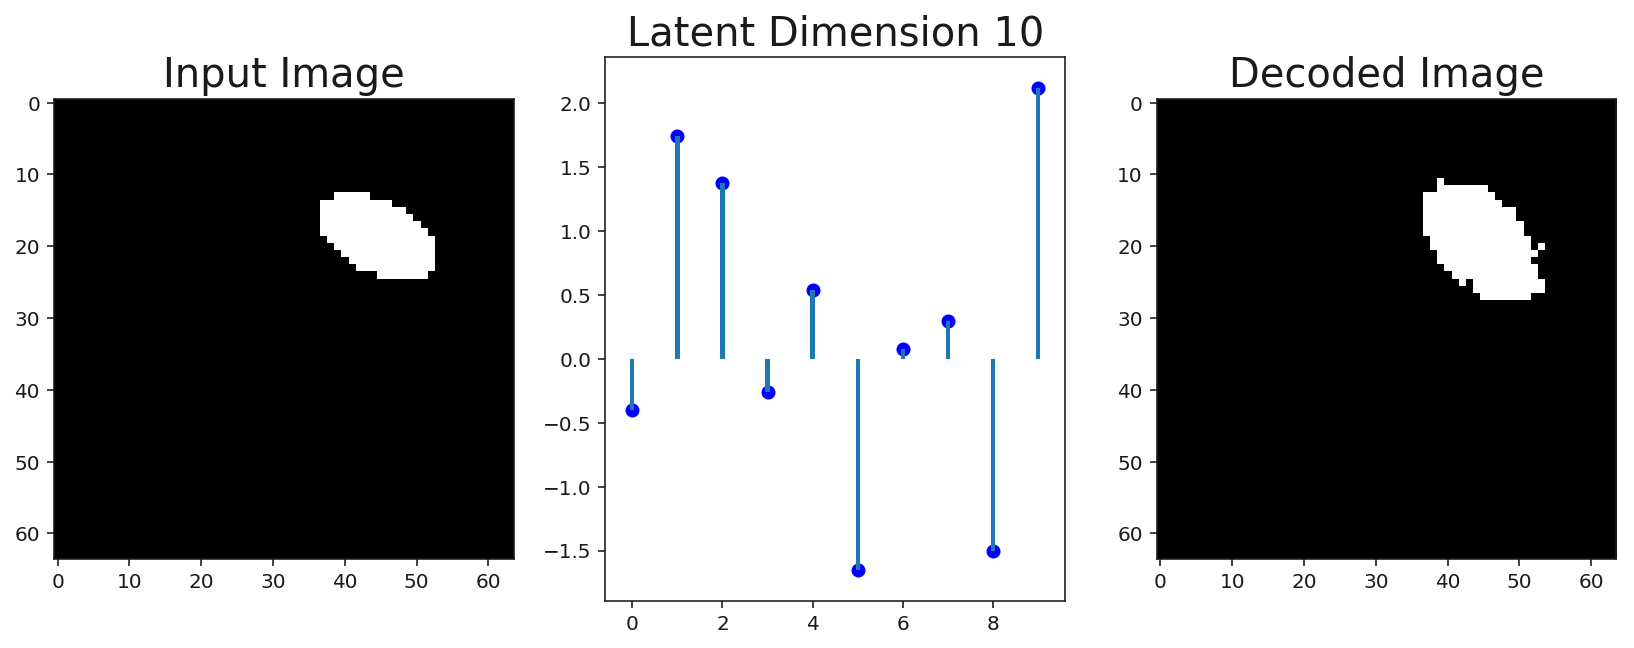

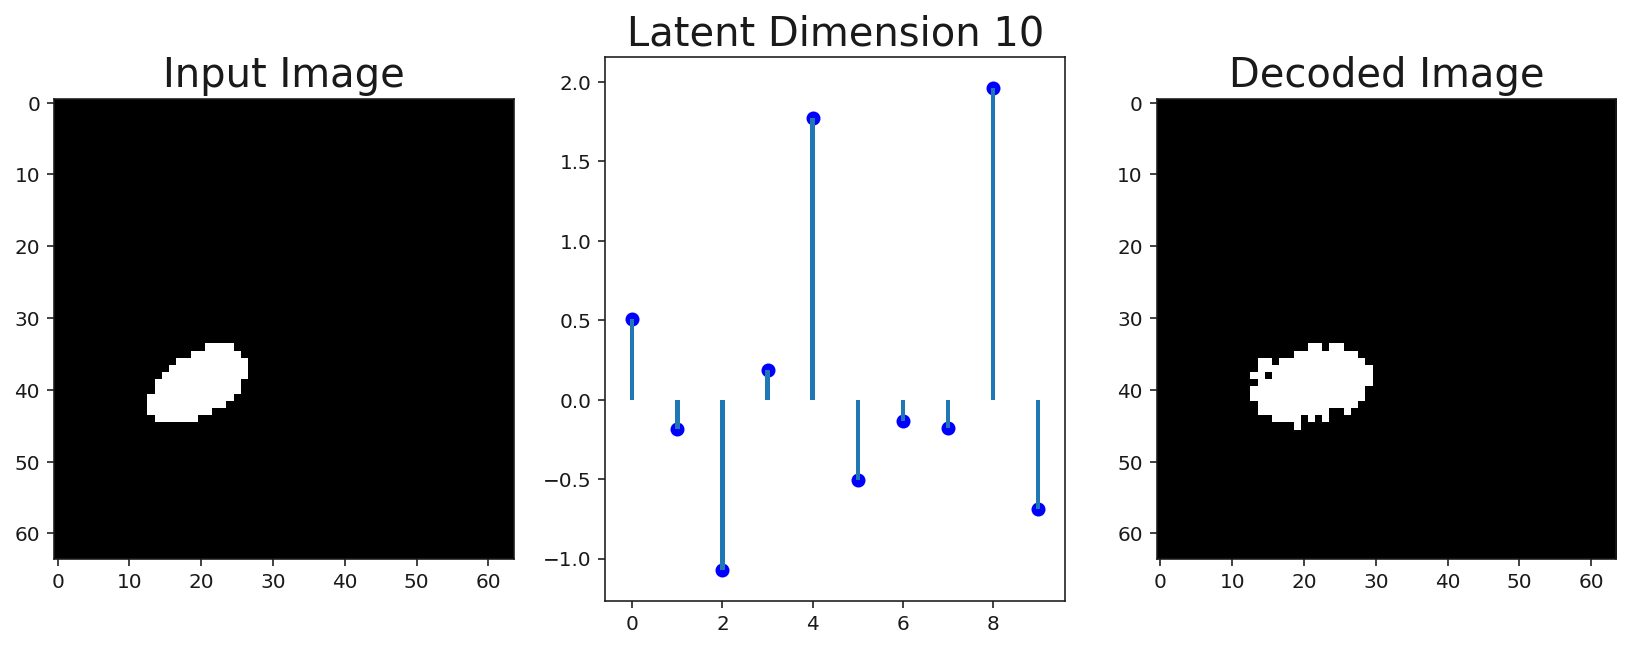

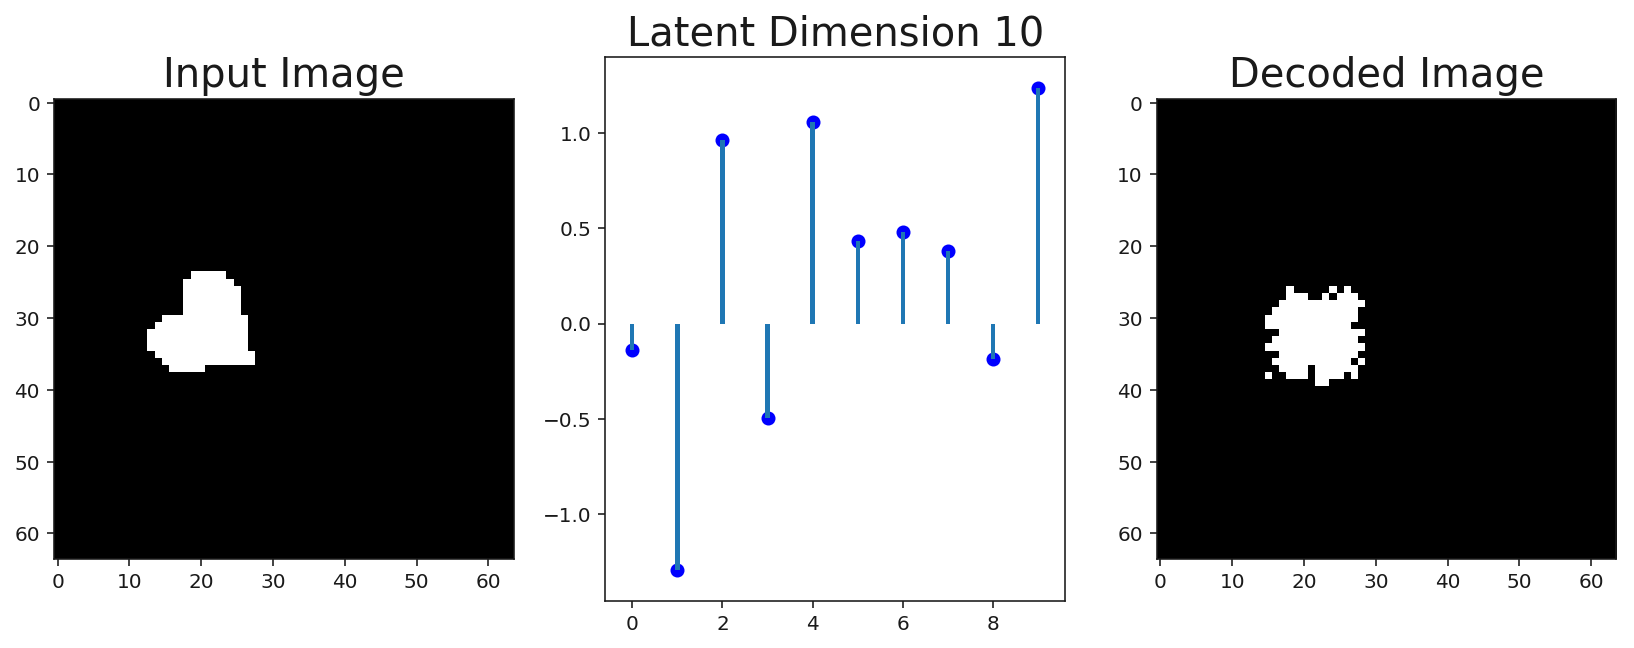

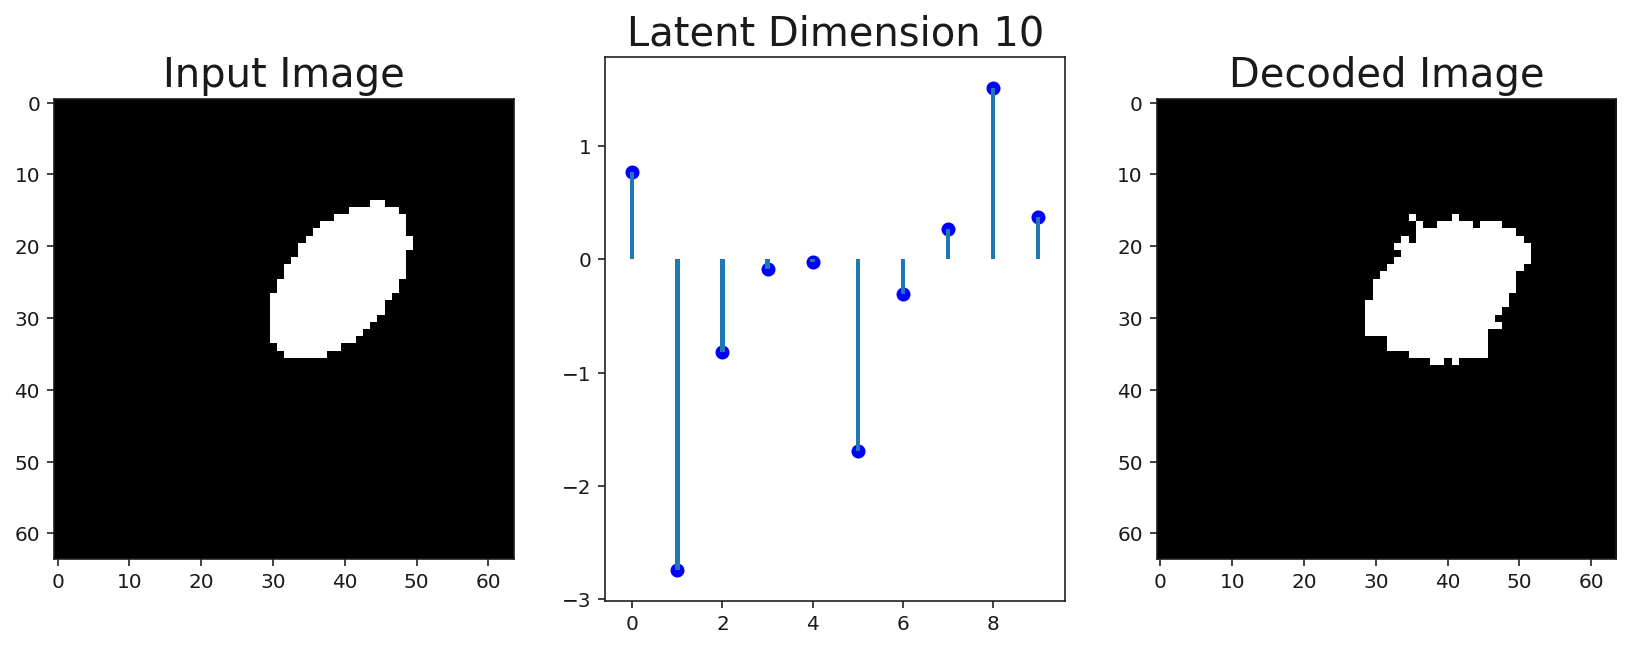

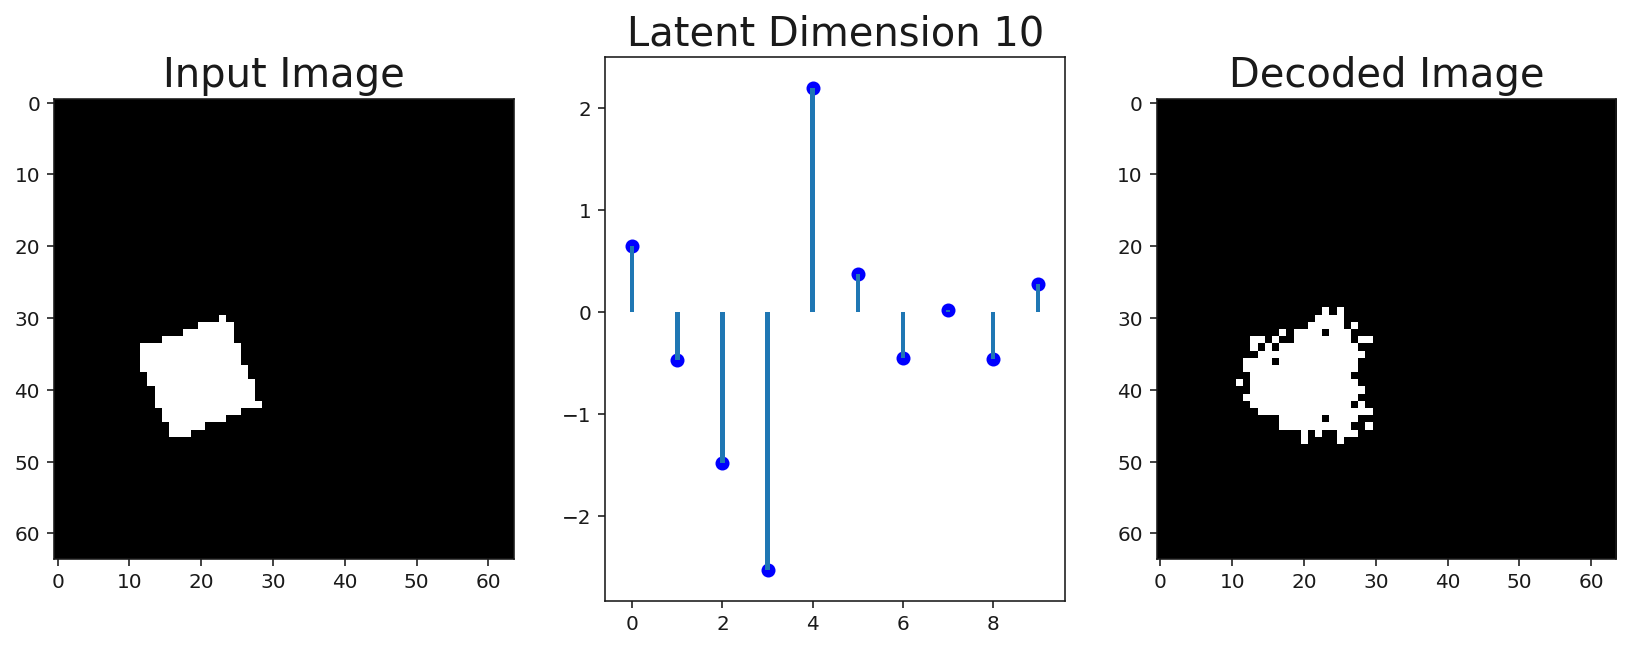

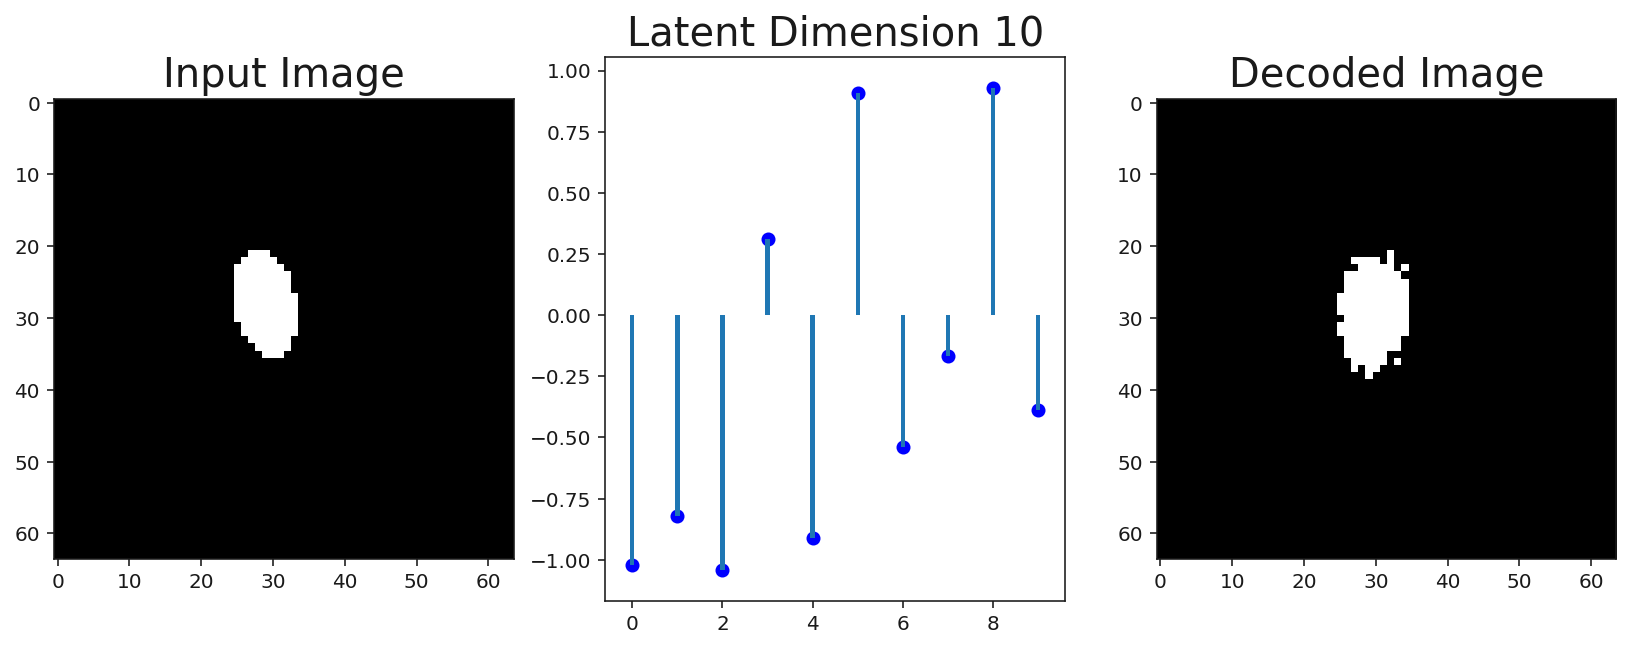

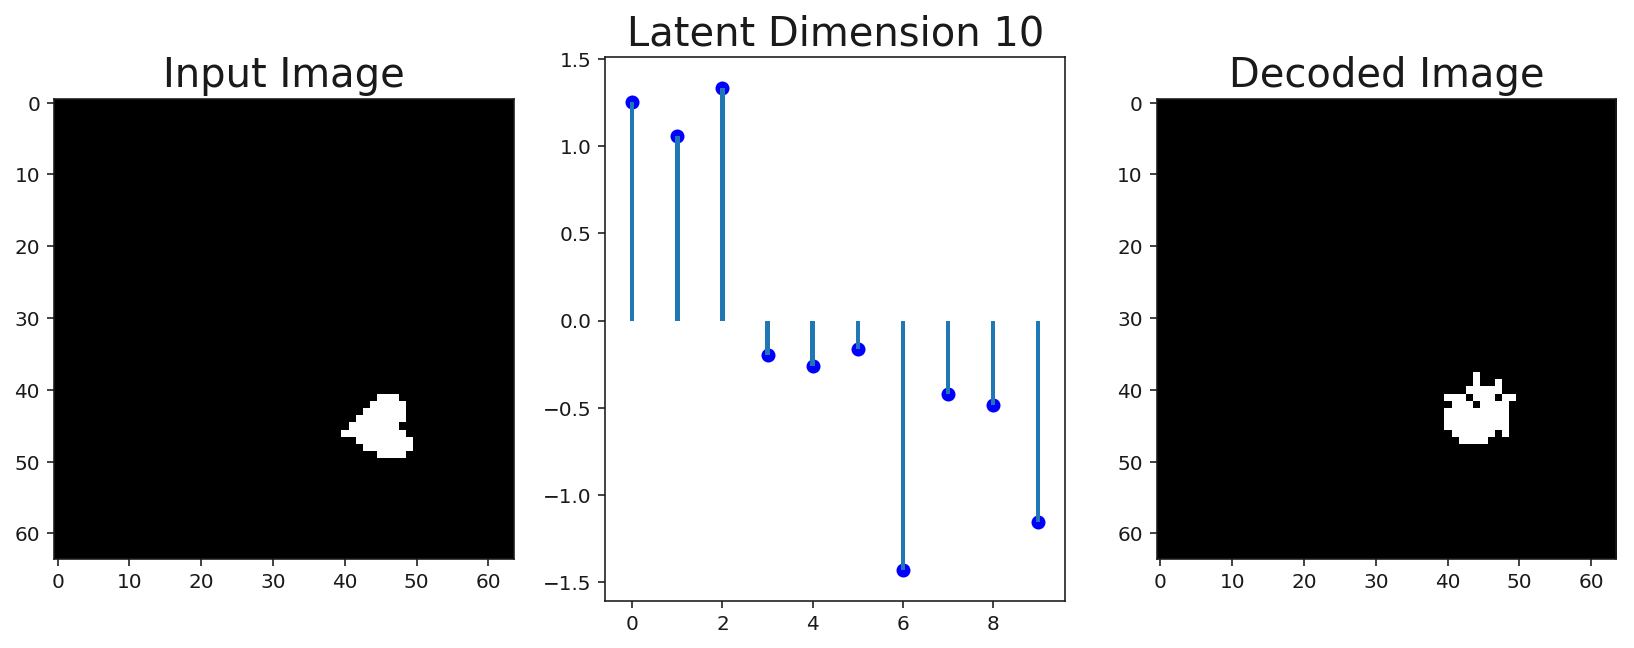

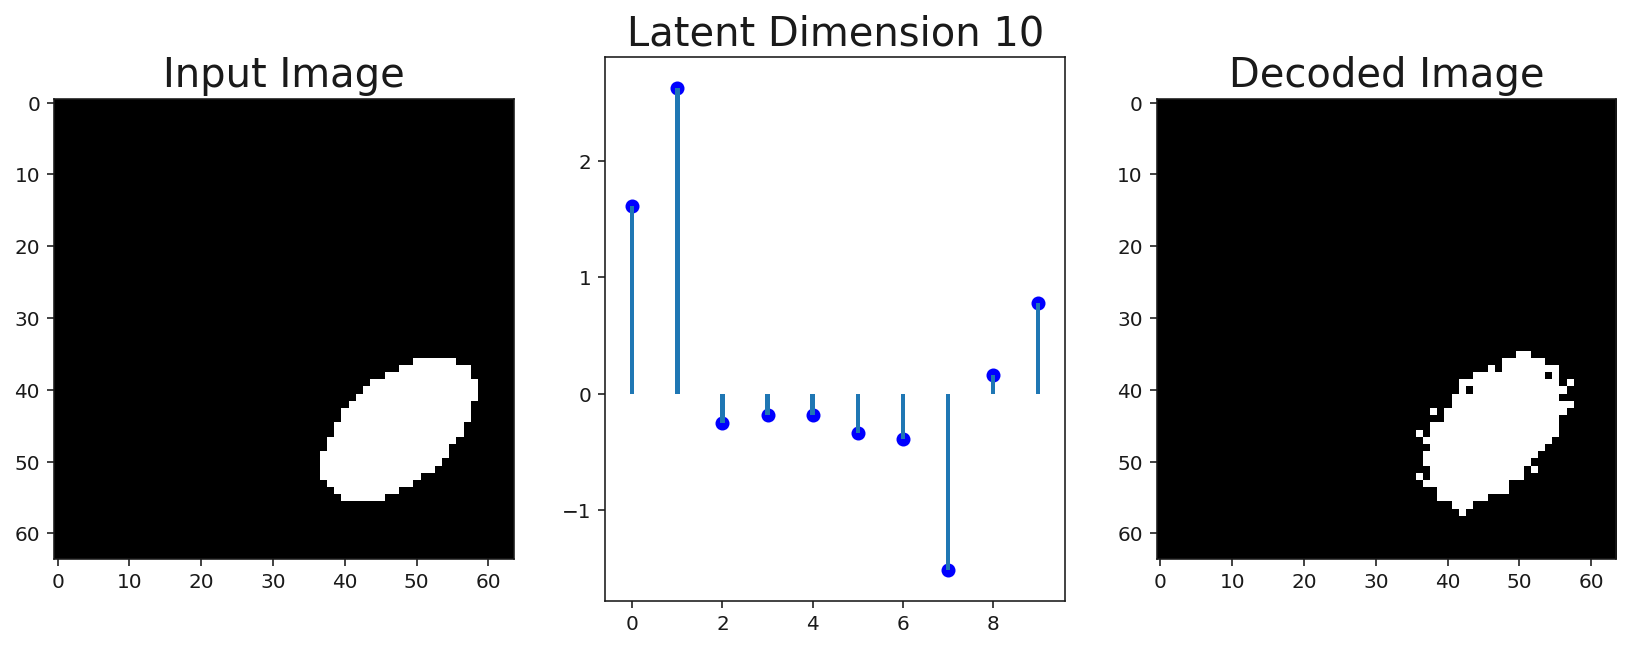

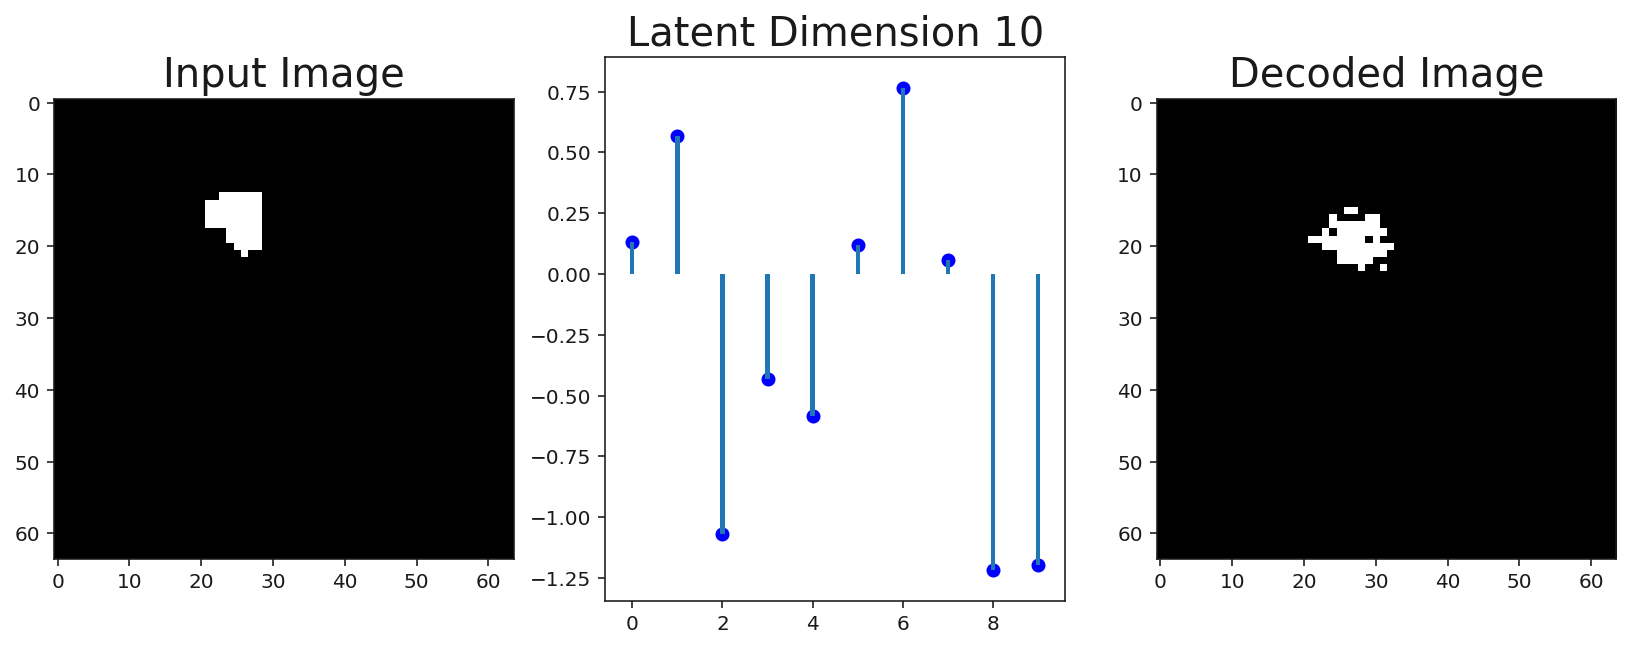

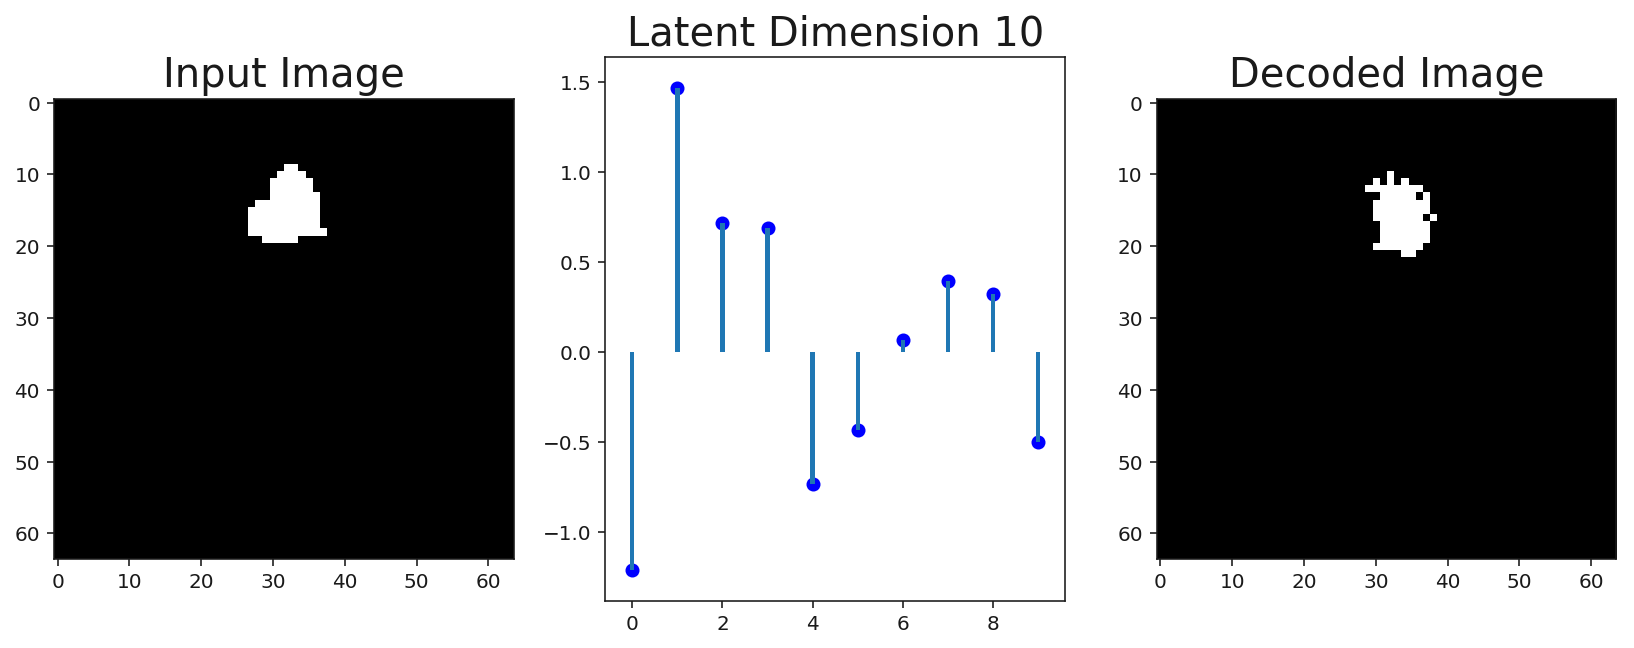

In [156]:
for i, (image, img, z) in enumerate(zip(images, imgs, zs)):
    if i == 10: break
    plot_codes(image, img, z, tcvae, latent_sz=10, width=1/10)

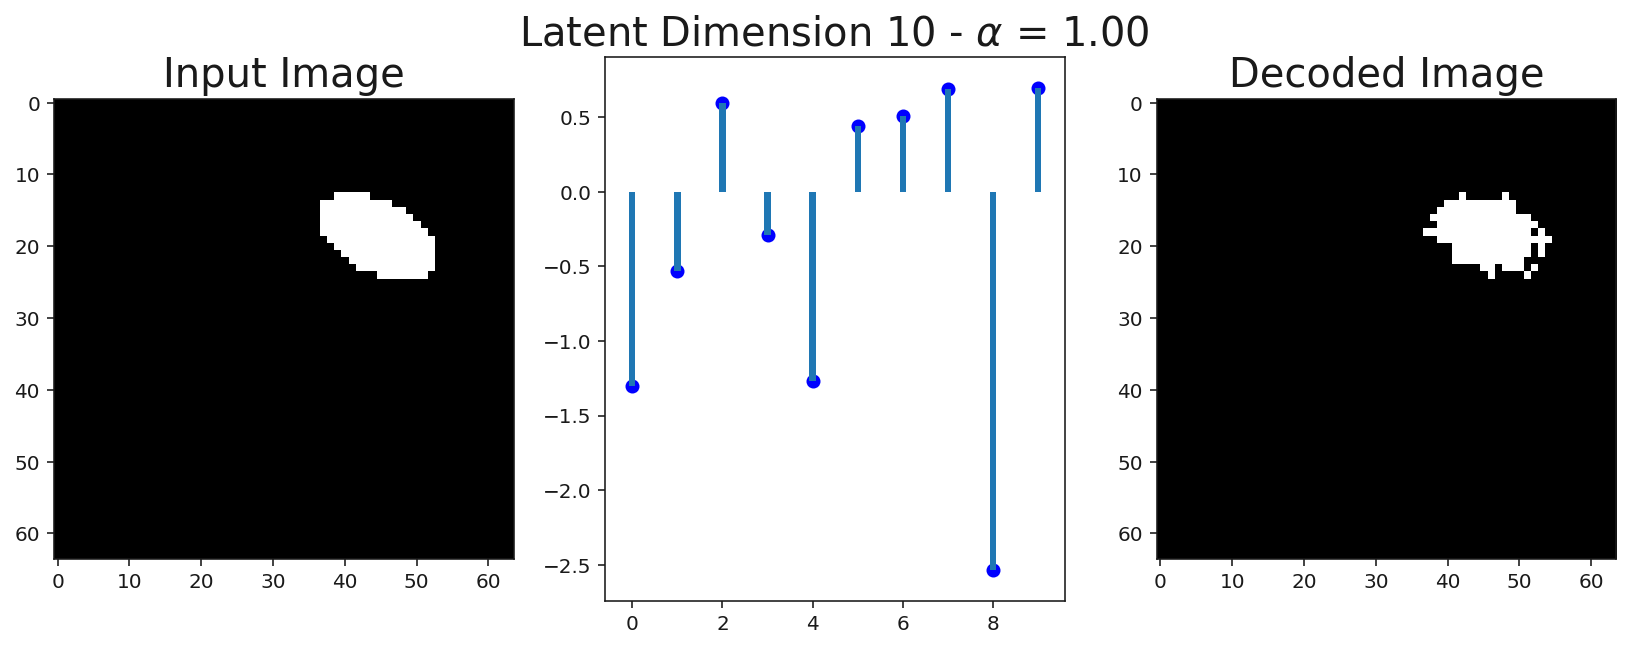

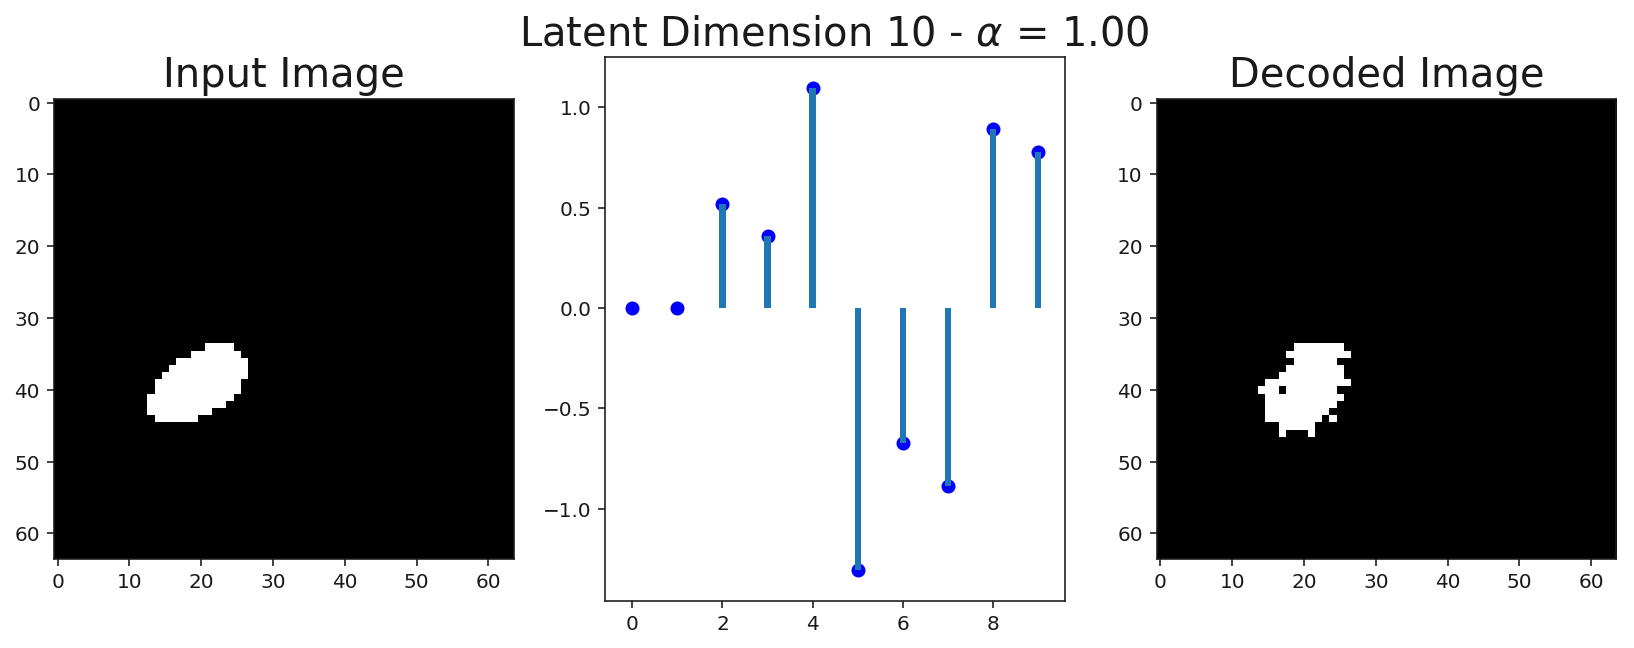

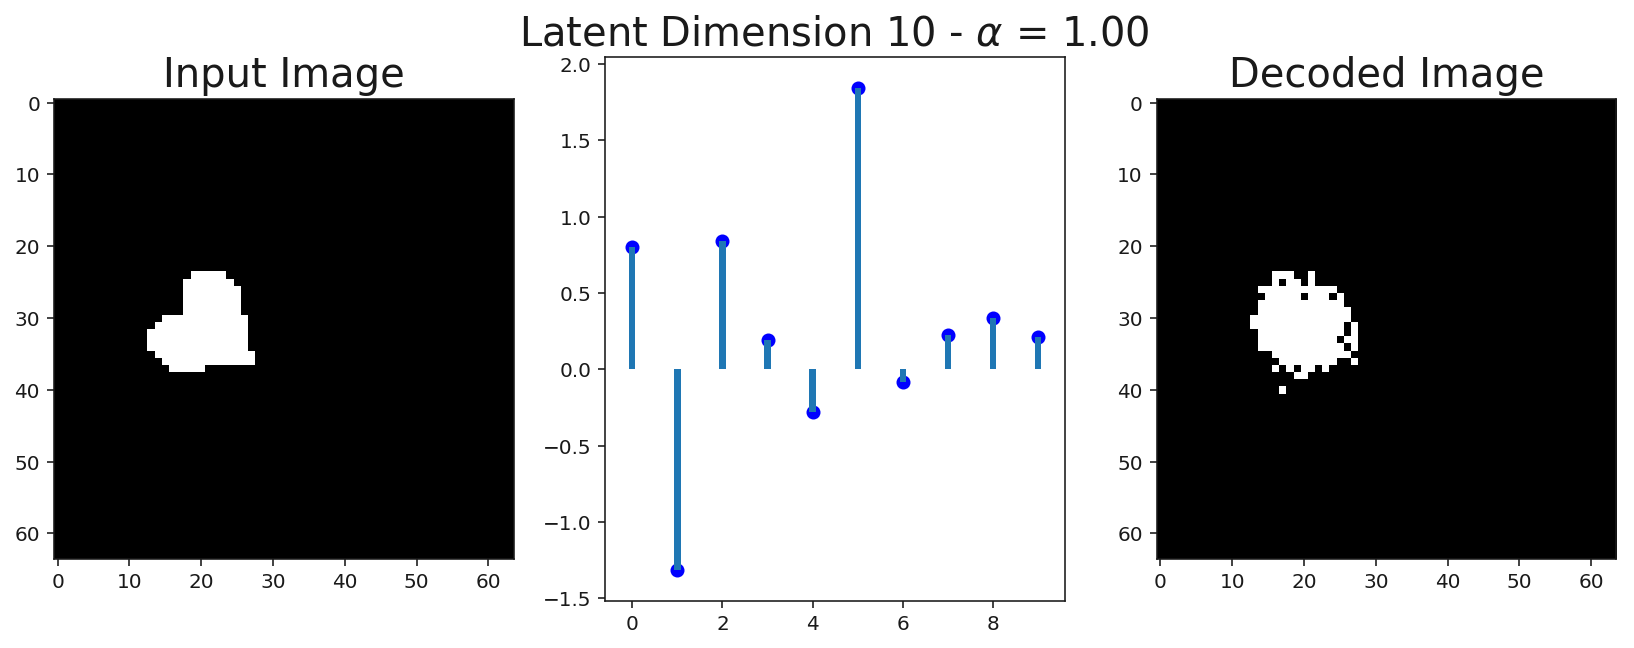

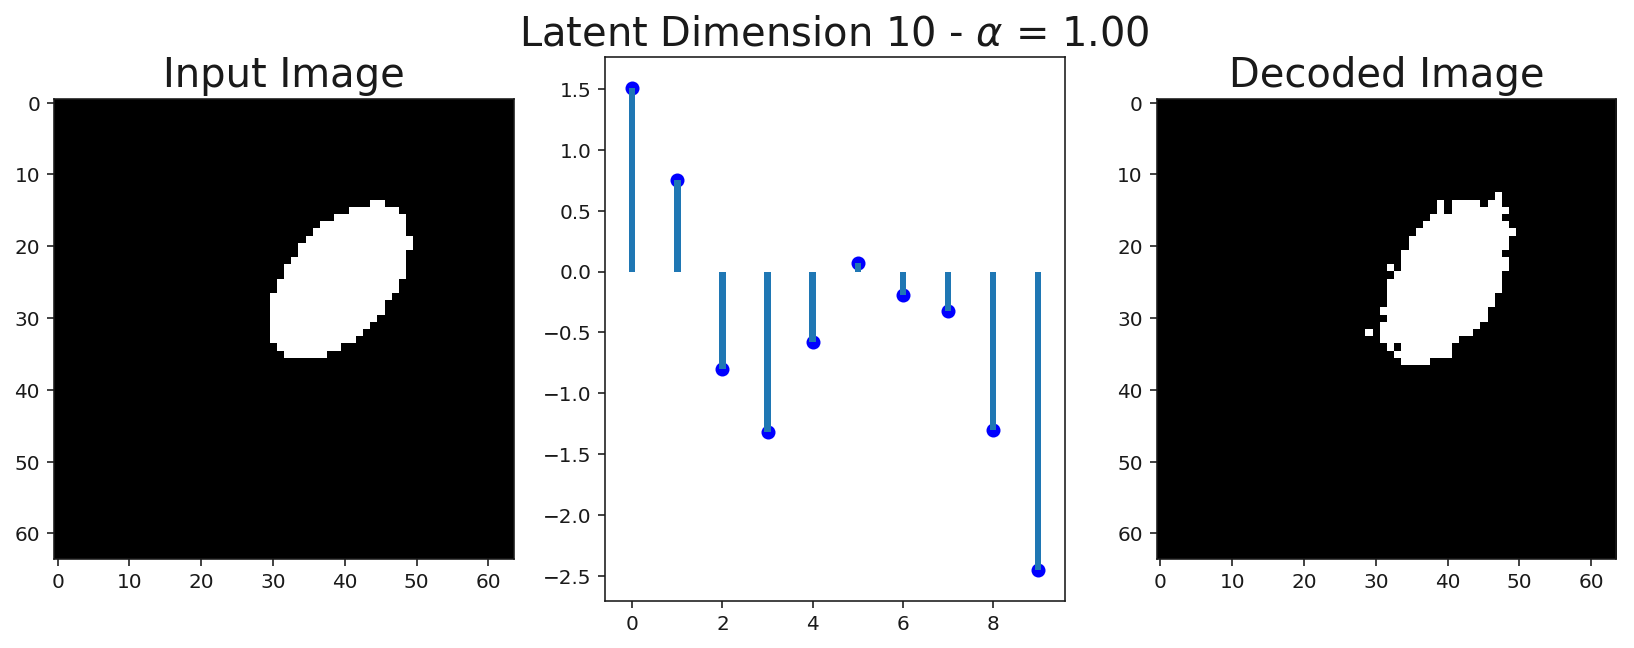

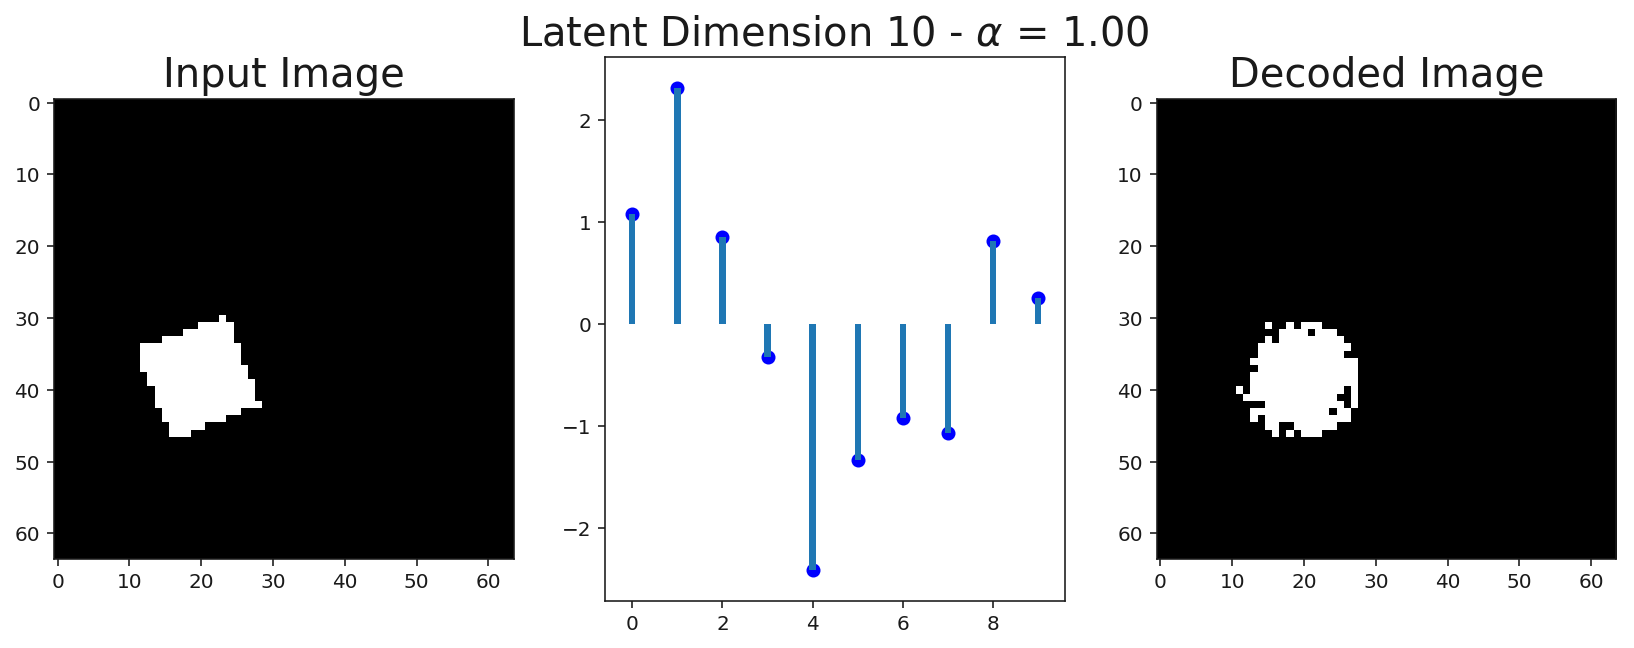

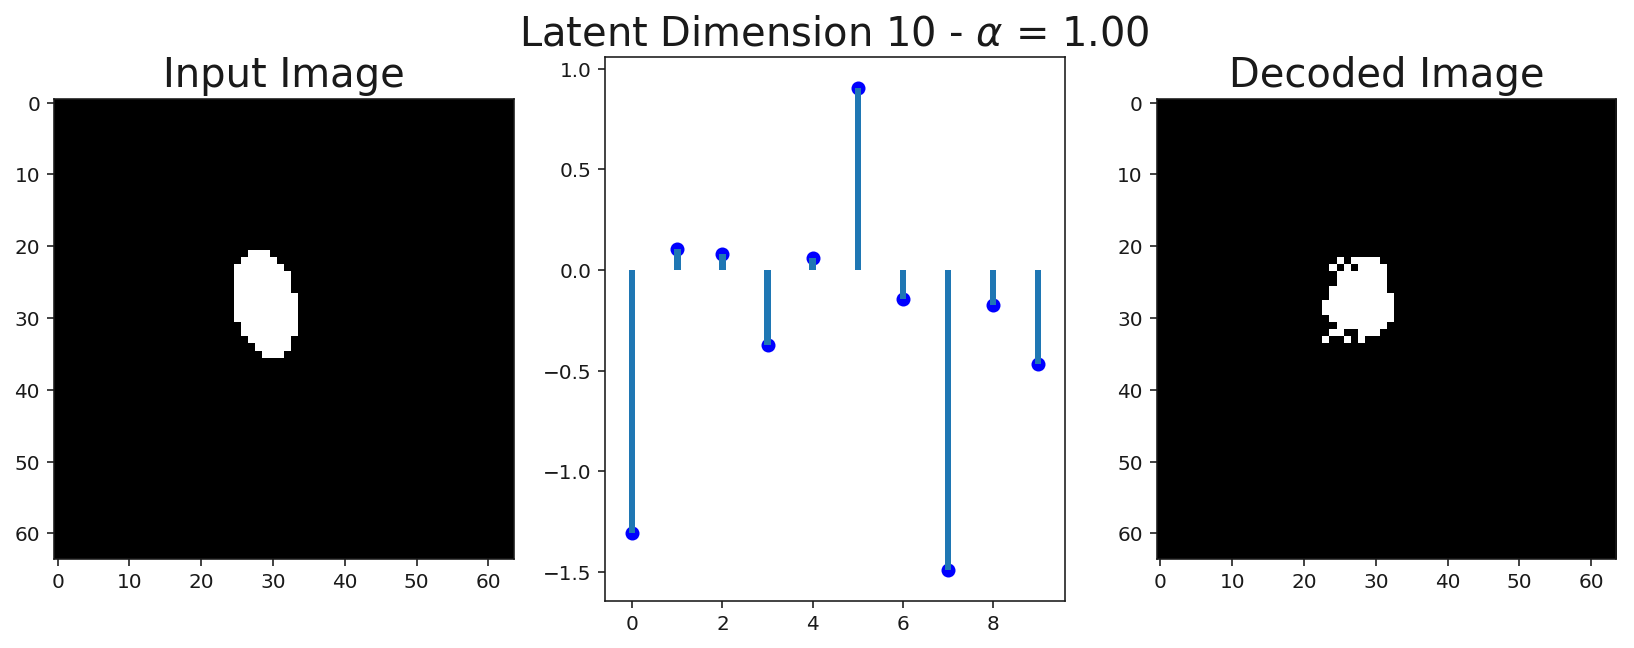

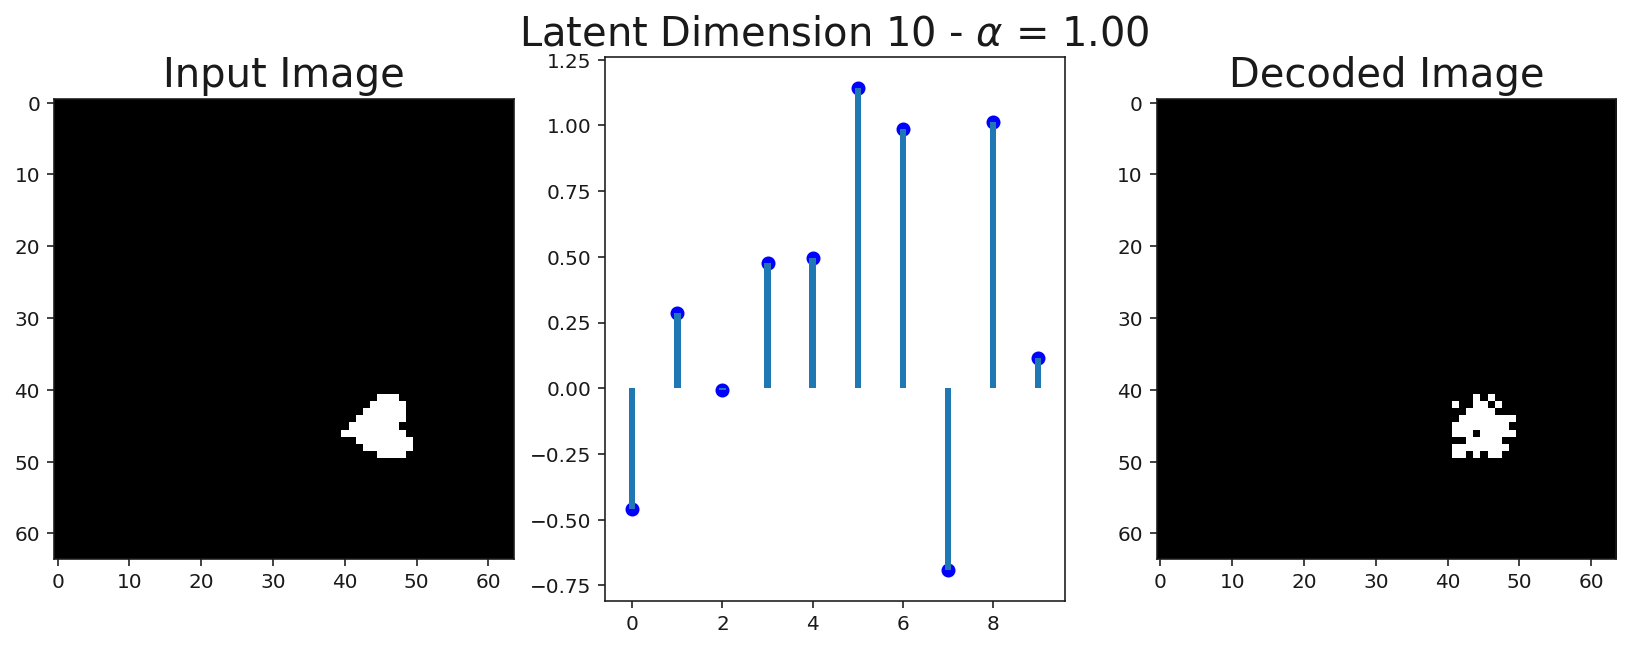

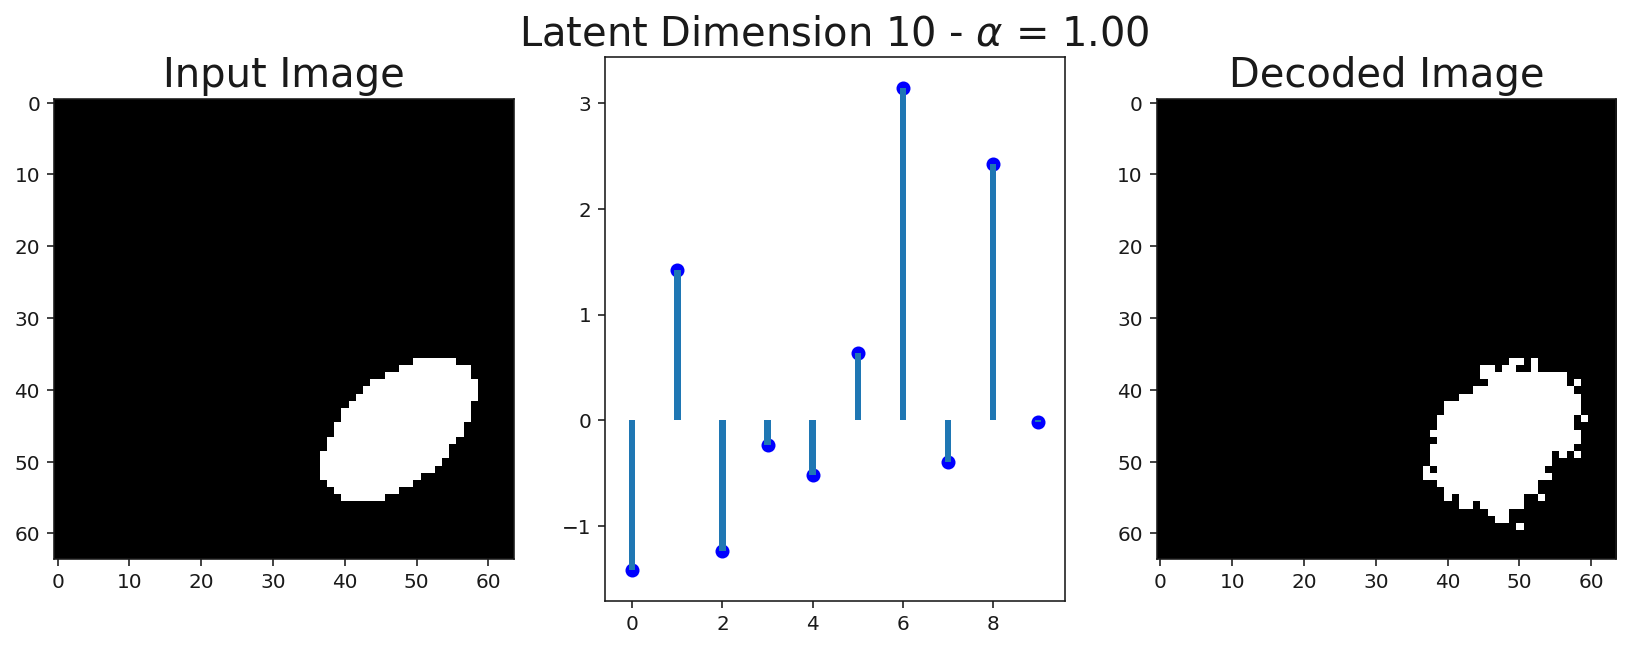

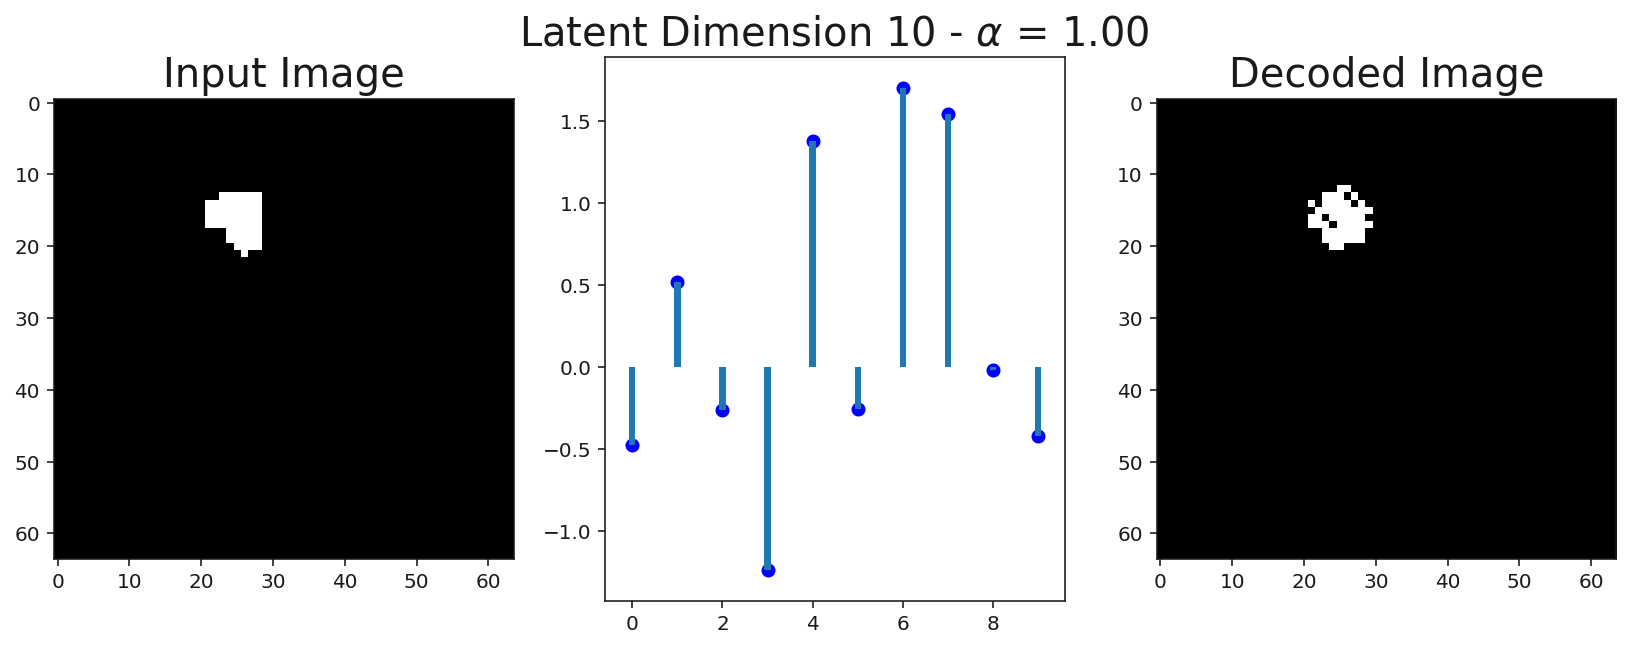

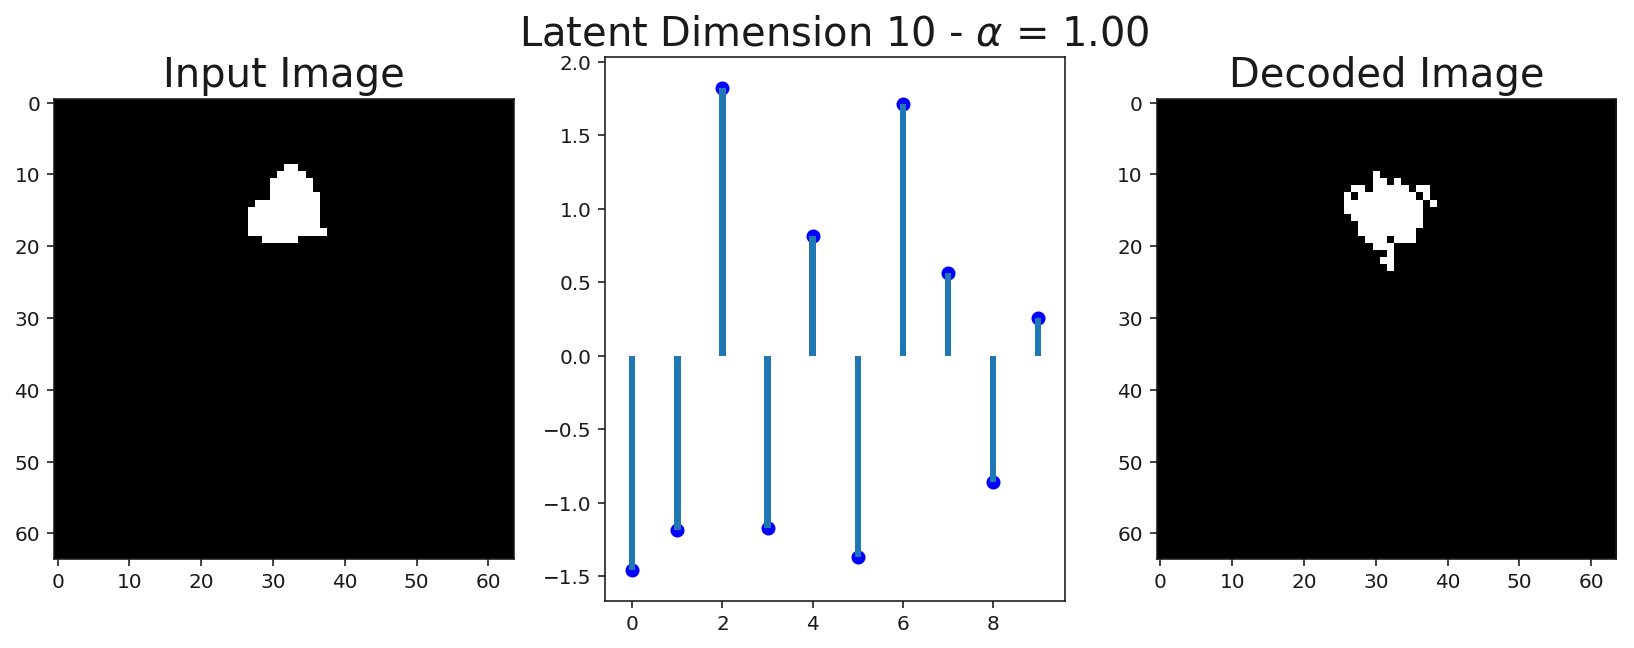

In [103]:
from src.plots import plot_encoding_tcvae
for i in range(10):
    plot_encoding_tcvae(images[i][None,:], tcvae, 
                        latent_sz=10, alpha=1)